In [1]:
%cd python-mwchatter

/home/elealin/projects/code-switching/wiki/python-mwchatter


In [2]:
!pwd

/home/elealin/projects/code-switching/wiki/python-mwchatter


In [3]:
import json
import jsonlines
import mwparserfromhell
import mwxml
import re
import wikichatter as wc

In [4]:
ZHWIKI = "/shared/0/projects/code-switching/zhwiki/zhwiki-20240401-pages-meta-history/"

# Explore Current Page Dump Format
These dumps only store the most current revision

In [5]:
NEWEST_ZHWIKI = "/shared/0/projects/code-switching/zhwiki/"

In [7]:
!bzip2 -dk {NEWEST_ZHWIKI}zhwiki-20241201-pages-meta-current1.xml-p1p187712.bz2

In [9]:
dump = mwxml.Dump.from_file(open("{}zhwiki-20241201-pages-meta-current1.xml-p1p187712".format(NEWEST_ZHWIKI)))

In [17]:
page = next(iter(dump))

print(page)

for revision in page:
    try:
        print(revision)
        break
    except:
        print('error printing revision')

Page(id=13, title='数学', namespace=0, redirect=None, restrictions=[])


MalformedXML: Unexpected tag found when processing a <revision>: 'origin'

# English Example

Compare the outputs of this section to English_Python_MWChatter_Demo.ipynb to make sure we didn't break anything:

In [5]:
ex = open("talk_samples/user/687428034.txt")

In [6]:
for line in ex:
    print(line)

This user is blocked...



== Welcome! ==

Hello, New User Person, and welcome to Wikipedia! Thank you for [[Special:Contributions/New User Person|your contributions]]. I hope you like the place and decide to stay. Here are a few links to pages you might find helpful:

* [[Wikipedia:Introduction|Introduction]] and [[Help:Getting started|Getting started]]

* [[Wikipedia:Contributing to Wikipedia|Contributing to Wikipedia]]

* [[Wikipedia:Five pillars|The five pillars of Wikipedia]]

* [[Help:Editing|How to edit a page]] and [[Wikipedia:Article development|How to develop articles]]

* [[Wikipedia:Your first article|How to create your first article]]

* [[Wikipedia:Simplified Manual of Style|Simplified Manual of Style]]



You may also want to take the [[Wikipedia:The Wikipedia Adventure|Wikipedia Adventure]], an interactive tour that will help you learn the basics of editing Wikipedia. You can visit [[WP:Teahouse|The Teahouse]] to ask questions or seek help.



Please remember to [[Wikip

In [7]:
ex = open("talk_samples/user/687428034.txt")
parsed_ex = wc.parse(ex)

wc.parse() produces a dictionary with a single key "sections" which is a list of sections:

In [8]:
for k in parsed_ex:
    print(k)

sections


In [9]:
type(parsed_ex["sections"])

list

In [10]:
print("Parsed {} sections".format(len(parsed_ex["sections"])))
print("Expected: Parsed 19 sections")

Parsed 19 sections
Expected: Parsed 19 sections


Each section is a dictionary consisting of subsections and comments (and heading, if it exists):

In [11]:
print("Parsed fields for first section:")
for k in parsed_ex["sections"][0]:
    print(k)
    
print()
print("Expected:\nsubsections\ncomments")

Parsed fields for first section:
subsections
comments

Expected:
subsections
comments


this first section has no subsections:

In [12]:
print("Parsed subsections:")
print(parsed_ex["sections"][0]["subsections"])

print()

print("Expected:\n", [])

Parsed subsections:
[]

Expected:
 []


The first section does have 1 comment. 

Comments have the following fields:
- "text_blocks": text of the comment
- "comments": comments on this comment
- "cosigners":

In [16]:
print("Parsed comment:")
print(parsed_ex["sections"][0]["comments"])

print()
print("Expected comment text: This user is blocked...")

Parsed comment:
[{'text_blocks': ['This user is blocked...\n', '\n'], 'comments': [], 'cosigners': []}]

Expected comment text: This user is blocked...


However, the second section has 2 comments parsed. 

But the second comment seems to be empty. 

*Important*: filter such empty comments when parsing.

An author and timestamp are also parsed for this comment.

In [17]:
for comment in parsed_ex["sections"][1]["comments"]:
    print(comment)

{'text_blocks': ['== Welcome! ==\n', 'Hello, New User Person, and welcome to Wikipedia! Thank you for [[Special:Contributions/New User Person|your contributions]]. I hope you like the place and decide to stay. Here are a few links to pages you might find helpful:\n', '* [[Wikipedia:Introduction|Introduction]] and [[Help:Getting started|Getting started]]\n', '* [[Wikipedia:Contributing to Wikipedia|Contributing to Wikipedia]]\n', '* [[Wikipedia:Five pillars|The five pillars of Wikipedia]]\n', '* [[Help:Editing|How to edit a page]] and [[Wikipedia:Article development|How to develop articles]]\n', '* [[Wikipedia:Your first article|How to create your first article]]\n', '* [[Wikipedia:Simplified Manual of Style|Simplified Manual of Style]]\n', '\n', 'You may also want to take the [[Wikipedia:The Wikipedia Adventure|Wikipedia Adventure]], an interactive tour that will help you learn the basics of editing Wikipedia. You can visit [[WP:Teahouse|The Teahouse]] to ask questions or seek help.\n'

There are 12 text blocks in the first and only comment of the second section.

Each text block correspond to a paragraph/list item/other carriage-return demarcated chunk of text:

In [18]:
len(parsed_ex["sections"][1]["comments"][0]["text_blocks"])

12

In [19]:
for tb in parsed_ex["sections"][1]["comments"][0]["text_blocks"]:
    print(tb)

== Welcome! ==

Hello, New User Person, and welcome to Wikipedia! Thank you for [[Special:Contributions/New User Person|your contributions]]. I hope you like the place and decide to stay. Here are a few links to pages you might find helpful:

* [[Wikipedia:Introduction|Introduction]] and [[Help:Getting started|Getting started]]

* [[Wikipedia:Contributing to Wikipedia|Contributing to Wikipedia]]

* [[Wikipedia:Five pillars|The five pillars of Wikipedia]]

* [[Help:Editing|How to edit a page]] and [[Wikipedia:Article development|How to develop articles]]

* [[Wikipedia:Your first article|How to create your first article]]

* [[Wikipedia:Simplified Manual of Style|Simplified Manual of Style]]



You may also want to take the [[Wikipedia:The Wikipedia Adventure|Wikipedia Adventure]], an interactive tour that will help you learn the basics of editing Wikipedia. You can visit [[WP:Teahouse|The Teahouse]] to ask questions or seek help.



Please remember to [[Wikipedia:Signatures|sign]] your

In [20]:
parsed_ex["sections"][1]["comments"][0]["comments"]

[]

The fourth section demonstrates hierarchical structure (comments can have comments on them):
https://github.com/emlinking/python-mwchatter/blob/master/talk_samples/user/687428034.txt

In [21]:
parsed_ex["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['== Wikipedia:Village pump (policy) ==\n',
    'The [[Wikipedia:Village pump (policy)]] page is to discuss policy related issues, and should not be used to revive long-resolved 9/11 issues. If there is a new issue, please raise it at [[WP:FTN]] with a succinct comment, not a wall of text. [[User:Johnuniq|Johnuniq]] ([[User talk:Johnuniq|talk]]) 23:00, 25 September 2015 (UTC)\n'],
   'comments': [{'text_blocks': [":I see you didn't even bother to read the title of the section I posted. Otherwise you would realize that the subject of my post was a policy issue. [[User:New User Person|New User Person]] ([[User talk:New User Person#top|talk]]) 23:10, 25 September 2015 (UTC)\n"],
     'comments': [{'text_blocks': ['\n',
        '::Dress it up however you like, you are clearly arguing for undue weight for a fringe theory. [[User talk:HighInBC|<b style="color:SaddleBrown">HighInBC</b>]] <small><small><sup>(was Chillum)</sup></small></small> 0

In [22]:
parsed_ex["sections"][3]["comments"][0]["text_blocks"]

['== Wikipedia:Village pump (policy) ==\n',
 'The [[Wikipedia:Village pump (policy)]] page is to discuss policy related issues, and should not be used to revive long-resolved 9/11 issues. If there is a new issue, please raise it at [[WP:FTN]] with a succinct comment, not a wall of text. [[User:Johnuniq|Johnuniq]] ([[User talk:Johnuniq|talk]]) 23:00, 25 September 2015 (UTC)\n']

In [23]:
parsed_ex["sections"][3]["comments"][0]["author"]

'Johnuniq'

In [24]:
parsed_ex["sections"][3]["comments"][0]["time_stamp"]

'23:00, 25 September 2015 (UTC)'

In [25]:
for k in parsed_ex["sections"][3]:
    print(k)

subsections
comments
heading


# Chinese Example

https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber

In [18]:
dump = mwxml.Dump.from_file(open("{}zhwiki-20240401-pages-meta-history1.xml-p1p2289".format(ZHWIKI)))

FileNotFoundError: [Errno 2] No such file or directory: '/shared/0/projects/code-switching/zhwiki/zhwiki-20240401-pages-meta-history/zhwiki-20240401-pages-meta-history1.xml-p1p2289'

In [19]:
ch_ex = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex = page
        break

In [28]:
page

Page(id=10, title='Brooke Vibber', namespace=3, redirect=None, restrictions=[])

In [29]:
# grab last revision
revision = None
for revision in page:
    pass

In [30]:
revision

Revision(id=80845354, timestamp=Timestamp('2024-02-08T23:46:55Z'), user=User(id=3200198, text='Ingenuity'), page=Page(id=10, title='Brooke Vibber', namespace=3, redirect=None, restrictions=[]), minor=True, comment='Ingenuity移动页面[[User talk:Brion VIBBER]]至[[User talk:Brooke Vibber]]：\u200b当重命名用户“[[Special:CentralAuth/Brion VIBBER|Brion VIBBER]]”至“[[Special:CentralAuth/Brooke Vibber|Brooke Vibber]]”时自动移动页面', text='<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，Brion VIBBER！[[Wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>\n感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了\'\'\'[[Wikipedia:欢迎，新来者|歡迎辭]]\'\'\'外，也請您了解以下重要文章：\n{| style="background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;" \n|- style="vertical-align: top;"\n| style="background: #f4f4f4; padding: .8em .2em;" | [[Image:Nuvola apps korganizer.png|35px|left|政策]]\n<div style="margin-left: 45px;">\'\'\'[[Wi

In [31]:
parsed_ch_ex = wc.parse(revision.text)

In [32]:
parsed_ch_ex 

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，Brion VIBBER！[[Wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>\n',
      "感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了'''[[Wikipedia:欢迎，新来者|歡迎辭]]'''外，也請您了解以下重要文章：\n",
      '{| style="background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;" \n|- style="vertical-align: top;"\n| style="background: #f4f4f4; padding: .8em .2em;" | [[Image:Nuvola apps korganizer.png|35px|left|政策]]\n<div style="margin-left: 45px;">\'\'\'[[Wikipedia:五大支柱|五大支柱]]\'\'\'<br /><small>[[Wikipedia:不适合维基百科的文章|百科]]、[[Wikipedia:中性的观点|中立]]、[[Wikipedia:简明版权信息|开放]]、[[Wikipedia:文明|互重]]、[[Wikipedia:忽略所有规则|勇於改善]]</small></div>\n| style="background: #faf1df; padding: .8em .2em;" | [[Image:Nuvola apps emacs.png|45px|left|GNU]]\n<div style="margin-left: 55px;">\'\'\'[[Wikipedia:版权常见问题解答|版

In [33]:
print("{} sections parsed by python-mwchatter".format(len(parsed_ch_ex["sections"])))

26 sections parsed by python-mwchatter


In [34]:
gold_parse = mwparserfromhell.parse(revision.text)
print("{} sections parsed by mwparserfromhell".format(len(gold_parse.get_sections())))

26 sections parsed by mwparserfromhell


The second section, which is very cleanly structured (indentation, every comment signed): https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber#Subpages

In [35]:
parsed_ch_ex["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['=== Subpages ===\n',
    '\n',
    'I remember reading somewhere in the EN WP that subpages will interfere with the yet-to-come system. Did I remember this wrongly?\n',
    '\n',
    'I ask this, because the [[Wikipedia 对话:繁简体问题/档案1 | current convention]] established in March in distinguishing between the traditional and simplified versions by the same title is using a slash before the identifier of the style (繁 or 简). Methods that have been tried and failed, include:\n',
    '# Attaching the identifier directly: [[WikiWiki]] -> [[WikiWiki繁]]\n',
    '#: It is unreadable if the title is Chinese\n',
    '# Parenthesis: [[Wikipedia]] -> [[Wikipedia(繁)]]\n',
    '#: It interferes with ambiguitation\n',
    '#  \n',
    '# A dot: [[Kristen Nygaard]] -> [[Kristen Nygaard·繁]]\n',
    "#: The dot in Chinese is used as a name division mark, so it'd imply that Nygaard's surname, or at least a part of it, is 繁. (See [[en:punctuation]])\n",
    

The first section is trickier to parse because there are some unsigned comments, people didn't indent, no headings: https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber#Subpages

In [36]:
parsed_ch_ex["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，Brion VIBBER！[[Wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>\n',
    "感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了'''[[Wikipedia:欢迎，新来者|歡迎辭]]'''外，也請您了解以下重要文章：\n",
    '{| style="background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;" \n|- style="vertical-align: top;"\n| style="background: #f4f4f4; padding: .8em .2em;" | [[Image:Nuvola apps korganizer.png|35px|left|政策]]\n<div style="margin-left: 45px;">\'\'\'[[Wikipedia:五大支柱|五大支柱]]\'\'\'<br /><small>[[Wikipedia:不适合维基百科的文章|百科]]、[[Wikipedia:中性的观点|中立]]、[[Wikipedia:简明版权信息|开放]]、[[Wikipedia:文明|互重]]、[[Wikipedia:忽略所有规则|勇於改善]]</small></div>\n| style="background: #faf1df; padding: .8em .2em;" | [[Image:Nuvola apps emacs.png|45px|left|GNU]]\n<div style="margin-left: 55px;">\'\'\'[[Wikipedia:版权常见问题解答|版權問題解答]]\'\'\'<br /><

https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber#Total_Search_Malfunction

In [37]:
parsed_ch_ex["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['=== Total Search Malfunction ===\n',
    '\n',
    'Several of the Wikipedians have expressed concerns about the malfunction of search. Every single word leads to a warning message. --[[用户:Menchi|Menchi]] 2003年5月28日 03:40 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ': Thanks for the quick fix. --[[用户:Menchi|Menchi]] 2003年5月30日 08:24 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Menchi',
     'time_stamp': '2003年5月30日 08:24 (UTC)'}],
   'cosigners': [],
   'author': 'Menchi',
   'time_stamp': '2003年5月28日 03:40 (UTC)'},
  {'text_blocks': ['\n', '----\n', '\n', 'test\n', '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' Total Search Malfunction '}

https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber#'Defunct'_my_admin_privilege

In [38]:
parsed_ch_ex["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ["== 'Defunct' my admin privilege ==\n",
    '\n',
    'ah.. now I know you are the developer(Chinese translation anyway.) Anywho, I\'m following the description of "Apply to cancel Admin privilege" in zh page, that I need to talk to you directly to remove my admin status([[User:Djyang]]). Thanks for your help in advance. :) ---[[User:Djyang|Djyang]] 14:52 2004年8月10日 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':Djyang, you need to request this at [[m:requests for permissions]] since Brion no longer deals with administrator access. [[User:Angela|Angela]] 00:05 2004年8月11日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Angela',
     'time_stamp': '00:05 2004年8月11日 (UTC)'}],
   'cosigners': [],
   'author': 'Djyang',
   'time_stamp': '14:52 2004年8月10日 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': " 'Defunct' my admin privilege "}

In [39]:
parsed_ch_ex["sections"][4]

{'subsections': [],
 'comments': [{'text_blocks': ['== Welcome ==\n',
    '\n',
    '<div style="width:100%;margin:0.2em 0;padding:0.3em 0;border-top:1px solid #ddd;border-bottom:1px solid #ddd;font-size:120%;">\'\'\'您好，Brion VIBBER！欢迎加入维基百科！\'\'\'</div>\n',
    "感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了[[WP:WELCOME|'''歡迎辭''']]以外，也請您了解以下重要文章：\n",
    '{|style="background:transparent;border-top:1px solid #ddd;border-bottom:1px solid #ddd;border-collpase:collapse;"\n|-style="vertical-align:top;"\n|style="background:#f4f4f4;padding:.8em .2em;"|[[File:Nuvola apps korganizer.svg|35px|left|政策|link=]]<div style="margin-left:45px;">[[WP:5P|\'\'\'五大支柱\'\'\']]<br /><small>[[WP:NOT|百科]]、[[WP:NPOV|中立]]、[[WP:CRFAQ|开放]]、[[WP:CIV|互重]]、[[WP:IAR|勇於创新]]</small></div>\n|style="background:#faf1df;padding:.8em .2em;"|[[File:Nuvola apps emacs.png|45px|left|GNU|link=]]<div style="margin-left:55px;">[[WP:CRFAQ|\'\'\'版權問題解答\'\'\']]<br /><small>貢獻內容必须是\'\'\'您所著或獲得授權\'\'\'、<br />并同意在[[WP:C|CC-by-sa-3.0和GFDL]]條款下發布</small></div

This section has a lot of fancy formatting: https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber#%E7%B5%A6%E6%82%A8%E4%B8%80%E4%BA%9B%E6%9E%9C%E4%BB%81%E8%9C%9C%E9%A4%85%EF%BC%81

In [40]:
parsed_ch_ex["sections"][5]

{'subsections': [],
 'comments': [{'text_blocks': ['== 給您一些果仁蜜餅！ ==\n',
    '\n',
    '{| style="background-color: #fdffe7; border: 1px solid #fceb92;"\n|style="vertical-align: middle; padding: 5px;" | [[File:Baklava - Turkish special, 80-ply.JPEG|135px]]\n|style="vertical-align: middle; padding: 3px;" |  --<span style="color:Navy;">[[User:Wangxuan8331800|铁铁的火大了]]<small>（[[User talk:Wangxuan8331800|20.00000000000 words]]）</small></span> 2011年8月22日 (一) 14:08 (UTC)\n|}\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Wangxuan8331800',
   'time_stamp': '2011年8月22日 (一) 14:08 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 給您一些果仁蜜餅！ '}

https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber#Salute!

In [41]:
parsed_ch_ex["sections"][-1]

{'subsections': [],
 'comments': [{'text_blocks': ['== Salute! ==\n',
    '\n',
    '向您致意！--[[User:KiraRettosei|KiraRettosei]]（[[User talk:KiraRettosei|留言]]） 2023年2月21日 (二) 06:19 (UTC)'],
   'comments': [],
   'cosigners': [],
   'author': 'KiraRettosei',
   'time_stamp': '2023年2月21日 (二) 06:19 (UTC)'}],
 'heading': ' Salute! '}

Example of a user page which has only a few labeled sections (highly unstructured): https://zh.wikipedia.org/wiki/User_talk:Formulax/Archive1

In [42]:
ch_ex2 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex2 = page
        break

In [43]:
ch_ex2

Page(id=109, title='Formulax/Archive1', namespace=3, redirect=None, restrictions=[])

In [44]:
# grab last revision
revision2 = None
for revision2 in ch_ex2:
    pass

In [45]:
parsed_ch_ex2 = wc.parse(revision2.text)

In [46]:
parsed_ch_ex2["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['----\n',
    '你好，很高兴认识你。我想加入Wikipedia管理团队，加入了Wiki-L Mailing list,不知道是不是已经完成了？\n',
    '还想与你取得联系，可否取得你的email address?--[[用户：alan1986228]]\n',
    '----\n',
    'hi, 你对中国历史（例如说清朝）感不感兴趣？清回答。 --[[用户:Colipon]]\n',
    '::我对人文方面都十分有兴趣。--[[用户:Formulax|Formulax]] 2003年7月7日 02:14 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Formulax',
   'time_stamp': '2003年7月7日 02:14 (UTC)'},
  {'text_blocks': ['----\n',
    'hi, Formulax. 我最近一直没有过来。那张照片我确实没有确认版权问题。邓丽君是名人，我忽略了这一点, sorry. --[[用户:Dlloader]]\n',
    '----\n',
    '最近在升级系统,所以没怎么上网,现在好了.--[[用户:Formulax|Formulax]]\n',
    '----\n',
    '嗨，Formulax 。我最近要忙功课了，不能多来了。我已经开始向同学和朋友介绍这个网站了，\n',
    '但是他们多数不会特别热心来这里的。:(看了你写的关于 Linux 的条目，看来你还是真正的黑客了？:)我还会继续关心这里的进展 。--[[用户:ghyll]]\n',
    '----\n',
    '我有点不清楚，我加入的有关gimp的东西有版权问题吗？那是我自己译的。还有我的英文不太好，不是十分清楚那本英文书的版权，不过我请教过旁人的，他们说那本说的版权可以让我再发表，(只要提及原作者就行)我照做了，还有你说那些内容与百科全书无关，我就不知道什么才有关了。因为我到现在为止，还没读过百科全书，请指点一下。谢谢 wide288\n',
    '----\n',
    'F

In [47]:
parsed_ch_ex2["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==Bureaucrats提名==\n',
    '\n',
    '您被提名为Bureaucrat，请参看[[Wikipedia:申请成为管理员]]--[[User:Shizhao|Shizhao]] ([[User talk:Shizhao|Talk]])[[WikiWiki| ]] 09:10 2004年2月26日 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Shizhao',
   'time_stamp': '09:10 2004年2月26日 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': 'Bureaucrats提名'}

In [48]:
parsed_ch_ex2["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 大學 ==\n',
    '\n',
    '您上傳到Wikisources的[http://sources.wikipedia.org/wiki/%E5%A4%A7%E5%AD%A6 大學]有亂碼，可以在上傳一下嗎？ --[[User:Samuel|Samuel]] ([[User talk:Samuel|对话页]])[[WikiWiki| ]] 11:17 2004年2月26日 (UTC)~\n'],
   'comments': [{'text_blocks': ['\n',
      ":好像不是乱码。'''□'''在中文古籍中经常会看到，表示这个字由于年代久远或其他原因在最早的版本中已经没有了或无法辨认了，也就是表示缺字，其后往往会标上一个字，表示从其他书中获猜测出来的一个字。还有一些看似乱码的东西，是一种汉字在计算机中的写法。有些生僻的汉字在电脑上的字库中没有，只好用这种办法代替。比如“女+子”就是“好”字。--[[User:Shizhao|Shizhao]] ([[User talk:Shizhao|Talk]])[[WikiWiki| ]] 12:19 2004年2月26日 (UTC)\n"],
     'comments': [],
     'cosigners': [],
     'author': 'Shizhao',
     'time_stamp': '12:19 2004年2月26日 (UTC)'}],
   'cosigners': [],
   'author': 'Samuel',
   'time_stamp': '11:17 2004年2月26日 (UTC)'},
  {'text_blocks': ['\n',
    '----\n',
    '我已经将你设置为了bureaucrat--[[User:Shizhao|Shizhao]] ([[User talk:Shizhao|Talk]])[[WikiWiki| ]] 02:30 2004年3月6日 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':谢谢。--[[User:Formul

In [49]:
parsed_ch_ex2["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['== 你好，我提交的网站有什么问题吗？ ==\n',
    '\n',
    '在下两个小站*[http://www.8ug.com/index.htm 网上购物导航]\n',
    '*[http://www.028cd.com 成都商务秘书网]\n',
    '内容健康，已链接了维基百科。提交到这里，冒犯了谁啊？\n',
    '\n',
    '我又再去了一次，还把畫面擷取了。你來給我指出：放了到哪裡去？\n',
    '[[File:NetPurchaseSingo_html_m52e73c26.jpg]][[File:NetPurchaseSingo_html_m48608fcc.jpg]]\n',
    '--[[User:Tomchiukc|石添小草]] 18:08 2004年3月7日 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Tomchiukc',
   'time_stamp': '18:08 2004年3月7日 (UTC)'},
  {'text_blocks': ['\n',
    '让你费心了，你的态度很让人敬佩！\n',
    '不过，维基百科的链接确实在“友情链接”里面，就是画面的右下角。请查。\n',
    '是不怎么显眼，那倒不是对维基百科的不恭，下次更新一定换个位置。'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 你好，我提交的网站有什么问题吗？ '}

https://zh.wikipedia.org/wiki/User_talk:Ghyll

In [50]:
ch_ex3 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex3 = page
        break

In [51]:
ch_ex3

Page(id=123, title='Ghyll', namespace=3, redirect=None, restrictions=[])

In [52]:
# grab last revision
revision3 = None
for revision3 in ch_ex3:
    pass

In [53]:
parsed_ch_ex3 = wc.parse(revision3.text)

In [54]:
parsed_ch_ex3["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['欢迎。\n',
    '----\n',
    '有空常来呵！--[[用户:Formulax|Formulax]]\n',
    '\n',
    '\n',
    '\n'],
   'comments': [],
   'cosigners': []}]}

In [55]:
parsed_ch_ex3["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==[[:中文地名索引/A]]页面存废讨论通知==\n',
    "[[File:Ambox warning pn.svg|left|48px|]]您好，您先前创建或编辑的页面[[:中文地名索引/A]]已被列入[[WP:页面存废讨论|页面存废讨论列表]]中，'''正在投票表决'''是否应该删除。有编者认为条目可能不符合维基百科的收录方针，并已经解释了原因。（参见[[WP:NOT|维基百科不是什么]]）<br>\n",
    '\n',
    '我们欢迎您参与讨论并留下关于条目是否符合方针、应当如何处理的意见；请在[[WP:页面存废讨论#中文地名索引/A]]中留下您的意见，记得使用<nowiki>~~~~</nowiki>[[WP:SIG|签名]]。您也可以在讨论期间改写您原先的条目，但请不要移除条目顶端的[[WP:AFD|条目删除模板]]。谢谢合作，祝编辑愉快！<!-- Template:AFDNote -->[[User:今古庸龍|今古庸龍 (ten7728)]] ([[User talk:今古庸龍|留言]]) 2011年3月17日 (四) 12:13 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': '今古庸龍',
   'time_stamp': '2011年3月17日 (四) 12:13 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '[[:中文地名索引/A]]页面存废讨论通知'}

https://zh.wikipedia.org/wiki/Talk:%E6%A4%8D%E7%89%A9%E5%AD%A6

In [56]:
ch_ex4 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex4 = page
        break

In [57]:
ch_ex4

Page(id=160, title='植物学', namespace=1, redirect=None, restrictions=[])

In [58]:
# grab last revision
revision4 = None
for revision4 in ch_ex4:
    pass

In [59]:
parsed_ch_ex4 = wc.parse(revision4.text)

In [60]:
parsed_ch_ex4["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{DYKtalk|date=2023-02-23}}\n',
    '{{WikiProject banner shell| topic =自然科學 | level = 3 | class =C|\n{{WikiProject Biology |importance=high}}\n{{植物專題 |importance=Top |Navy=yes}}\n{{WikiProject Tree of Life|importance=high}}\n}}\n',
    '\n'],
   'comments': [],
   'cosigners': []}]}

In [61]:
parsed_ch_ex4["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['== 定义 ==\n',
    '植物学（botany biology）是一门研究植物形态解剖、生长发育、生理生态、系统进化以及分类的综合性科学，为一级学科。倾向于高等植物的研究。<small>—以上[[Wikipedia:在對話頁上簽名|未簽名]]的留言由[[User:Ziqi|Ziqi]]（[[User talk:Ziqi|對話]]｜[[Special:Contributions/Ziqi|貢獻]]）加入。</small>\n',
    '\n',
    '[[User:Arthursilva|arthur]] ([[User talk:Arthursilva|留言]]) 2011年1月6日 (四) 03:02 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Arthursilva',
   'time_stamp': '2011年1月6日 (四) 03:02 (UTC)'},
  {'text_blocks': ['\n',
    '上述的定義應是現在某些植物學家強調的plant science，或譯「植物科學」的定義，主要的原因是：屬於這個領域的科學家們，多是從事高等植物的研究，或者其研究的材料為高等植物，且其關注的，經常不屬於《傳統植物學》的學門，故喜用plant science以區別botany。關於「進化」一詞，似用演化較妥，其優劣(進化退化)不應以人的觀點為之。\n',
    '\n',
    '維基英文的定義：\n',
    '\n',
    'Botany, plant science(s), phytology, or plant biology is a branch of biology that involves the scientific study of plant life.\n',
    "'''生物學的一支，以科學方法研究植物(生命)的學科。'''\n",
    '\n',
    '由於各個學門分化極細且其範圍難以介定，逕說「研究植物形态解剖、生长发育、生理生态、系统进化以及分类的综合性科学」似乎較不妥當。何況，植物學由於分

In [62]:
parsed_ch_ex4["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 中国第一 ==\n',
    '\n',
    '[[User:Arthursilva|arthur]] ([[User talk:Arthursilva|留言]]) 2011年1月6日 (四) 02:47 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Arthursilva',
   'time_stamp': '2011年1月6日 (四) 02:47 (UTC)'},
  {'text_blocks': ['條目內文：「中国近代植物植物分类学的奠基人是胡先骕，编写了中国第一部中文《高等植物学》，发现了中国的“活化石”水杉，并将其命名。」\n',
    '\n',
    '對「第一」可能不同的人有不同的解讀：\n',
    '下列幾本書應受到重視：\n',
    '李時珍《本草綱目》、李善蘭《植物學》(翻譯了第一部中文植物學教科書，且可能是植物學一詞的由來，並且為許多植物學專有名詞的濫觴)。\n',
    '\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 中国第一 '}

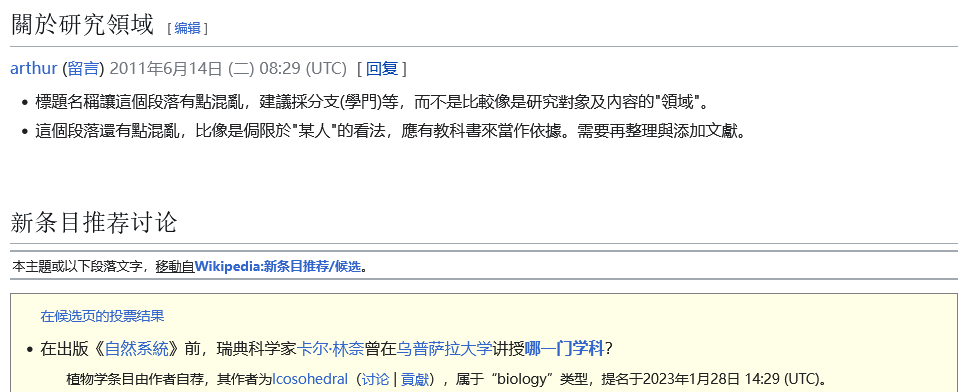

In [63]:
parsed_ch_ex4["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['==關於研究領域==\n',
    '[[User:Arthursilva|arthur]] ([[User talk:Arthursilva|留言]]) 2011年6月14日 (二) 08:29 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Arthursilva',
   'time_stamp': '2011年6月14日 (二) 08:29 (UTC)'},
  {'text_blocks': ['* 標題名稱讓這個段落有點混亂，建議採分支(學門)等，而不是比較像是研究對象及內容的"領域"。\n',
    '* 這個段落還有點混亂，比像是侷限於"某人"的看法，應有教科書來當作依據。需要再整理與添加文獻。\n',
    '\n',
    '\n',
    "{{DYKEntry/archive\n | closeframe = 1\n | revid = 76085438\n | hash = 3e47a384d68dd2e2ce6bac448181fe490c6f99e8\n | result = +|a3e0958549e98523e8d74b58dfc5a3df10ebc01f|1677121446\n | article = 植物学\n | question = 在出版《[[自然系統]]》前，瑞典科学家[[卡尔·林奈]]曾在[[乌普萨拉大学]]讲授'''[[植物学|哪一门学科]]'''？\n | image = \n | type = biology\n | author = Icosohedral\n | nominator = \n | timestamp = 1674916162\n}}\n",
    '**{{支持}}--[[User:金色黎明|金色黎明]]（[[User talk:金色黎明|留言]]） 2023年1月28日 (六) 14:43 (UTC)\n'],
   'comments': [{'text_blocks': ['**{{支持}}--[[User:藍莓味綠茶|藍莓味綠茶]]（[[User talk:藍莓味綠茶|留言]]） 2023年

https://zh.wikipedia.org/wiki/Talk:%E7%94%9F%E7%89%A9%E5%AD%A6

In [64]:
ch_ex5 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex5 = page
        break

In [65]:
ch_ex5

Page(id=163, title='生物学', namespace=1, redirect=None, restrictions=[])

In [66]:
# grab last revision
revision5 = None
for revision5 in ch_ex5:
    pass

In [74]:
revision5.timestamp

Timestamp('2024-02-08T11:28:22Z')

In [67]:
parsed_ch_ex5 = wc.parse(revision5.text)

In [68]:
parsed_ch_ex5["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{WikiProject banner shell|class=C|vital=yes|\n{{WikiProject Biology|importance=top}}\n{{WikiProject FAOL|西班牙语|es:Biología|lang2=希伯來語|link2=he:ביולוגיה|lang3=越南语|link3=vi:Sinh học}}\n}}\n',
    '----\n',
    '將原本進化論和分類學討論擺到相關條目裡  用戶[[hibaby]] 2005/01/22 <small>—以上[[Wikipedia:在對話頁上簽名|未簽名]]的留言由[[User:Hibaby|Hibaby]]（[[User talk:Hibaby|對話]]｜[[Special:Contributions/Hibaby|貢獻]]）於2005年1月21日 (五) 17:29加入。</small>\n',
    '\n',
    '\n',
    '提点个人的意见，这个页面似乎※多了一些，视觉的效果不太好。:)\n',
    '--[[用户:ghyll|ghyll]] 2002 年 11 月 28 日 19:30（北京时间）\n',
    '\n',
    '的确觉得※不是很好看哦，呵呵。\n',
    '[[用户:Samuel|Samuel]] 2003年5月23日 13:14 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':换掉了。好点没有？ --[[用户:Lorenzarius|Lorenzarius]] 2003年5月23日 16:18 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Lorenzarius',
     'time_stamp': '2003年5月23日 16:18 (UTC)'}],
   'cosigners': [],
   'author': 'Samuel',
   'time_stamp': '2003年5月23日 13:14 (UTC)'},
 

Somehow the links in the box at the bottom of the page got into the parse of the first section in the page:
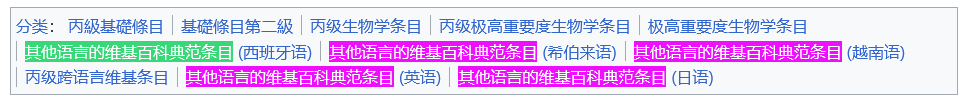

In [69]:
parsed_ch_ex5["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==图徐改之==\n',
    '[[用户:Chenghui|Chenghui]] 2003年7月21日 15:34 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':我在這裡翻譯了一些内容，不過我的生物和英語水平有限，可能有很多錯誤的地方，那就麻煩您修改一下了，呵呵。--[[用户:Samuel|Samuel]] 2003年7月22日 05:39 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Samuel',
     'time_stamp': '2003年7月22日 05:39 (UTC)'}],
   'cosigners': [],
   'author': 'Chenghui',
   'time_stamp': '2003年7月21日 15:34 (UTC)'},
  {'text_blocks': ['\n',
    '[[Category:其他语言的维基百科典范条目 (英语)|生]]\n',
    '[[Category:其他语言的维基百科典范条目 (西班牙语)|生]]\n',
    '[[Category:其他语言的维基百科典范条目 (日语)|生]]\n',
    '[[Category:其他语言的维基百科典范条目 (越南语)|生]]\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': '图徐改之'}

In [70]:
parsed_ch_ex5["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 生命科學=生物學？ ==\n',
    '\n',
    '大家好！\n',
    '我發現生命科學條目被重定向為生物學，但是我覺得兩者不一定完全相同？英文版的wiki也不是把[[:en:Life Science|Life Science]] (生命科學)重定向為[[:en:Biology|Biology]] (生物學)，而是詳列出很多有關生命科學的學科，如[[生物化學]],[[生物學]]只是其中的一列而已。因此我覺得中文版的wiki也應該仿效。你們怎麼看呢？\n',
    '\n',
    '--[[用户:DualDoomsdays|DualDoomsdays]] 2011年12月9日 23:20 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'DualDoomsdays',
   'time_stamp': '2011年12月9日 23:20 (UTC)'},
  {'text_blocks': ['\n',
    '    生物學之拉丁文原意本身就是指「研究生命之科學」，本質上生物學與生命科學是相同的，而且僅就「生物學」一詞而言也非特指Biology下之一門學科。故私心以為無需如此仿效。\n',
    '\n',
    '--[[User:愚人的搏鬥|愚人的搏鬥]]（[[User talk:愚人的搏鬥|留言]]） 2012年12月26日 (三) 14:07 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': '愚人的搏鬥',
   'time_stamp': '2012年12月26日 (三) 14:07 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 生命科學=生物學？ '}

In [71]:
parsed_ch_ex5["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['== 外部链接已修改 ==\n',
    '\n',
    '各位维基人：\n',
    '\n',
    '我刚刚修改了[[生物学]]中的2个外部链接，请大家仔细检查[https://zh.wikipedia.org/w/index.php?diff=prev&oldid=44736020 我的编辑]。如果您有疑问，或者需要让机器人忽略某个链接甚至整个页面，请访问[[:m:InternetArchiveBot/FAQ|这个简单的FAQ]]获取更多信息。我进行了以下修改：\n',
    '*向 http://community.weber.edu/sciencemuseum/pages/life_main.asp 中加入存档链接 https://web.archive.org/web/20130727182113/http://community.weber.edu/sciencemuseum/pages/life_main.asp\n',
    '*向 http://ibot.sav.sk/icbn/main.htm 中加入存档链接 https://web.archive.org/web/20121006231936/http://ibot.sav.sk/icbn/main.htm\n',
    '\n',
    '有关机器人修正错误的详情请参阅FAQ。\n',
    '\n',
    '祝编安。—[[User:InternetArchiveBot|\'\'\'<span style="color:darkgrey;font-family:monospace">InternetArchiveBot</span>\'\'\']] <span style="color:green;font-family:Rockwell">([[:en:User talk:InternetArchiveBot|報告軟件缺陷]])</span> 2017年6月12日 (一) 13:12 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'InternetArchiveBot',
   't

In [72]:
parsed_ch_ex5["sections"][4]

{'subsections': [],
 'comments': [{'text_blocks': ['== 外部链接已修改 ==\n',
    '\n',
    '各位维基人：\n',
    '\n',
    '我刚刚修改了[[生物学]]中的1个外部链接，请大家仔细检查[https://zh.wikipedia.org/w/index.php?diff=prev&oldid=49917299 我的编辑]。如果您有疑问，或者需要让机器人忽略某个链接甚至整个页面，请访问[[:m:InternetArchiveBot/FAQ|这个简单的FAQ]]获取更多信息。我进行了以下修改：\n',
    '*向 http://www.ultranet.com/~jkimball/BiologyPages/ 中加入存档链接 https://web.archive.org/web/20020604021647/http://www.ultranet.com/~jkimball/BiologyPages/\n',
    '\n',
    '有关机器人修正错误的详情请参阅FAQ。\n',
    '\n',
    '祝编安。—[[User:InternetArchiveBot|\'\'\'<span style="color:darkgrey;font-family:monospace">InternetArchiveBot</span>\'\'\']] <span style="color:green;font-family:Rockwell">([[:en:User talk:InternetArchiveBot|報告軟件缺陷]])</span> 2018年6月10日 (日) 04:46 (UTC)'],
   'comments': [],
   'cosigners': [],
   'author': 'InternetArchiveBot',
   'time_stamp': '2018年6月10日 (日) 04:46 (UTC)'}],
 'heading': ' 外部链接已修改 '}

https://zh.wikipedia.org/wiki/User_talk:Ktsquare#%E8%AA%A0%E6%91%AF%E9%82%80%E8%AB%8B%E5%8F%83%E8%88%87%E9%9F%B3%E6%A8%82%E8%88%87%E8%88%9E%E8%B9%88%E6%8F%90%E5%8D%87%E8%A8%88%E7%95%AB

In [75]:
ch_ex6 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex6 = page
        break
        
# grab last revision
revision6 = None
for revision6 in ch_ex6:
    pass

parsed_ch_ex6 = wc.parse(revision6.text)

In [76]:
print(ch_ex6)

Page(id=174, title='Ktsquare', namespace=3, redirect=None, restrictions=[])


In [77]:
parsed_ch_ex6["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ["{{Personal announcement||content=歡迎您來到本用戶討論頁，泡個茶，[[WP:囉嗦|不用囉嗦]]留個言。如果您的留言沒有得到及時回應，請見諒。建議留言人士請勿在此討論頁中張貼與'''動員令'''相關活動的'''廣告宣傳'''，謝謝大家合作！|backcolor=purple|fontcolor=white}}\n",
    '\n',
    '<center>[[Image:Barn star free zone.png|200px]]</center>\n',
    '{{Personal announcement||content=出於上面表達對於星章的我見，可以以書面、文字表達閣下送本人星章的原因；謝謝大家合作！|backcolor=purple|fontcolor=white}}\n',
    "<!---遺址數據===见字留意===\n:可疑：[[user:Ws227]][https://zh.wikipedia.org/w/index.php?title=User:Ktsquare&diff=8280690&oldid=8280560&diffmode=source]、[[User:Shoichi]]、[[user:Theodoranian]]\n:其他help+可疑：[[user:Cloudcolors]]、[[user:Yuyu]]、[[user:KaurJmeb]]、[[user:Cobrachen]]、[[user:PhiLiP]]、[[user:Trudylan]]、[[user:Kandance]]\n:其他talk：[[user:Lecter]]、[[user:阿佳]]、[[User:Smartneddy]]、[[user:Snowyowls]]、[[user:Wdshu]]、[[user:Peterpan]]\n:existence on other site(s)'''?'''：[[User:玄史生]]\n'''跟据经历，不欢迎'''以下用户就非维基百科事务在此留言：[[user:R.O.C]]、[[User:用心阁]]、[[user:Wing]]、[[user:Mountain]]、[[user

In [78]:
parsed_ch_ex6["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['== 誠摯邀請參與音樂與舞蹈提升計畫 ==\n',
    "會發此邀請帖是因閣下為[[Wikipedia:音乐兴趣小组维基人列表|音乐兴趣小组]]成員之一，故通知您'''[[維基百科:條目質量提升計劃/樂舞主題提升計畫|音樂與舞蹈條目提升]]'''已開始了！您現在可在該計畫提出協作請求或者幫忙協作，這比您在一兩個同好對話頁或條目討論頁互動性更佳。為了提升中文維基百科各領域的條目數量及品質，亦歡迎您邀請您認識的同好一起參與該計畫或 [[Wikipedia:條目質量提升計劃/子計畫|其他子計畫]]（也可參與籌備），或參閱[[WP:條目質量提升計畫]]（若純支持請至正式報到處[[Wikipedia: 條目質量提升計劃/報到處|簽到]]）。--''[[吟遊詩人]]''~'''[[User:wasami007|安可 ]]''' <sup>[[User talk:Wasami007|-{留言請按此}-]]</sup>[[File:Smiley.svg|16px|alt=☺|link=]]  2010年12月8日 (三) 08:09 (UTC)\n"],
   'comments': [{'text_blocks': [':留言已閱。-- [[user:Ktsquare|Ktsquare]] [[user talk:Ktsquare|留言]] 2011年7月22日 (五) 18:43 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Ktsquare',
     'time_stamp': '2011年7月22日 (五) 18:43 (UTC)'}],
   'cosigners': [],
   'author': 'Wasami007',
   'time_stamp': '2010年12月8日 (三) 08:09 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 誠摯邀請參與音樂與舞蹈提升計畫 '}

In [79]:
parsed_ch_ex6["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 歷史提升計畫邀請函 ==\n',
    '<div style="border: 10px solid Chocolate; background: #F5DEB3; padding: 1em;">\n',
    '[[File:World Map 1689.JPG|right|200px]]\n',
    '<font style="font-size: 170%; " ><center><font color=red> \'\'\'[[Wikipedia:條目質量提升計劃/歷史提升計畫|歷史提升計畫]]\'\'\'邀請函</center></font></font>\n',
    "'''{{PAGENAME}}，您好'''：\n",
    "誠摯邀請您參加'''[[Wikipedia:條目質量提升計劃/歷史提升計畫|歷史條目質量提升計畫]]'''，本計畫旨在提升[[歷史]]相關條目的質量，藉由募求開放'''協作'''方式將更多的[[歷史]]條目達到一定水準，內容包含'''歷史朝代、國家、文明、文化、專門史、歷史事件、制度、戰役'''等等與歷史相關的條目都可以提報於此。期盼您能加入我們提升質量的行列，來改善或創建更高品質的[[中文維基百科|百科]]條目。\n",
    "為了提升中文維基百科各領域的條目數量及品質，歡迎您參與'''[[Wikipedia:條目質量提升計劃/子計畫|其他子計畫]]'''，請參閱[[WP:條目質量提升計畫|主計畫]]說明。謹祝編安。\n",
    '<span style="font-size:smaller;">收到此邀請函的維基人，可使用\'\'\'{{Tls|歷史提升計畫/邀請}}\'\'\'語法張貼至您認識的維基人[[WP:對話頁|對話頁]]，將此消息廣為推介來共襄盛舉，謝謝。</span>\n',
    '<!-- <small>[[Wikipedia:條目質量提升計畫|計畫說明]] | [[Wikipedia:條目質量提升計劃/子計畫|計畫總覽]]</small> -->\n',
    '<span style="display:none">\n',
    '<span style="displ

In [80]:
parsed_ch_ex6["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['== 邀請您參與法律條文提升 ==\n',
    '因有人提案[[Wikipedia:互助客栈/條目探討#歡迎大家參與“美國憲法第一修正案”詞條的翻譯工作|歡迎大家參與“美國憲法第一修正案”詞條的翻譯工作]]，因此敝人開闢了\'\'\'[[Wikipedia:條目質量提升計劃/人文提升計畫#政治與法律|政治與法律提升計畫]]\'\'\'，因見您對法律方面似乎頗有興趣，因此並誠摯邀請您能協助參與相關提升作業，拜託您撥些冗空幫忙一下，感激不盡。--[[User:wasami007|<span style="font-family:Cooper Black;font-size:large;color:red;">安可</span>]]（[[User_talk:wasami007|來酒館談談]] ） 2011年7月11日 (一) 12:22 (UTC)\n'],
   'comments': [{'text_blocks': [':留言已閱。-- [[user:Ktsquare|Ktsquare]] [[user talk:Ktsquare|留言]] 2011年7月22日 (五) 18:43 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Ktsquare',
     'time_stamp': '2011年7月22日 (五) 18:43 (UTC)'}],
   'cosigners': [],
   'author': 'wasami007',
   'time_stamp': '2011年7月11日 (一) 12:22 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 邀請您參與法律條文提升 '}

In [81]:
parsed_ch_ex6["sections"][4]

{'subsections': [],
 'comments': [{'text_blocks': ['==參考資料==\n',
    '如你所加的連結這樣，不需帳號就可完整閱讀的話，當然留網上連結也很好，也比較方便讀者看到，我指的主要還是那些一般人可能連不上的電子書或資料庫。[[user:ffaarr|ffaarr]] [[User talk:Ffaarr|(talk)]] 2013年4月19日 (五) 01:31 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Ffaarr',
   'time_stamp': '2013年4月19日 (五) 01:31 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '參考資料'}

In [82]:
parsed_ch_ex6["sections"][5]

{'subsections': [],
 'comments': [{'text_blocks': ['== 訂閱 ==\n',
    '您好，您可以將名字加到下面的頁面以訂閱通訊。--[[User:Gakmo|Gakmo]]（[[User talk:Gakmo|留言]]） 2013年6月7日 (五) 04:12 (UTC)\n'],
   'comments': [{'text_blocks': ['*http://meta.wikimedia.org/wiki/Global_message_delivery/Targets/Tech_ambassadors\n',
      '*http://meta.wikimedia.org/wiki/Global_message_delivery/Targets/Wikidata\n',
      '\n'],
     'comments': [],
     'cosigners': []}],
   'cosigners': [],
   'author': 'Gakmo',
   'time_stamp': '2013年6月7日 (五) 04:12 (UTC)'}],
 'heading': ' 訂閱 '}

In [83]:
parsed_ch_ex6["sections"][6]

{'subsections': [],
 'comments': [{'text_blocks': ['== re ==\n',
    '我盡量避免公開點名其他維基的人，不過你有興趣的話，參見[http://en.wikipedia.org/wiki/Wikipedia:Featured_articles/2012_RfC_on_FA_leadership 這個RFC]。[[User:Lecter|Lecter]] [[User_talk:Lecter|咖啡館♨]] 2013年7月15日 (一) 21:40 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Lecter',
   'time_stamp': '2013年7月15日 (一) 21:40 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' re '}

In [84]:
parsed_ch_ex6["sections"][7]

{'subsections': [],
 'comments': [{'text_blocks': ['==求问一下==\n',
    '《唐代墓志铭汇编附考》这本书您是如何得到的？谢谢回复。——[[User:星光下的人|星光下的人]]（[[User talk:星光下的人|留言]]） 2014年4月19日 (六) 00:19 (UTC)\n'],
   'comments': [{'text_blocks': [':[https://zh.wikipedia.org/w/index.php?title=User_talk:%E6%98%9F%E5%85%89%E4%B8%8B%E7%9A%84%E4%BA%BA&diff=32058966&oldid=32045199 已回覆]。-- [[user:Ktsquare|Ktsquare]] [[user talk:Ktsquare|留言]] 2014年7月29日 (二) 10:12 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Ktsquare',
     'time_stamp': '2014年7月29日 (二) 10:12 (UTC)'}],
   'cosigners': [],
   'author': '星光下的人',
   'time_stamp': '2014年4月19日 (六) 00:19 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '求问一下'}

In [85]:
parsed_ch_ex6["sections"][8]

{'subsections': [],
 'comments': [{'text_blocks': ['==覆：WM2013技術人員的線上工作坊之我見==\n',
    '近日事忙，遲覆為歉。我是在WM2013當天遇到Sharihareswara（是在女性維基人午餐聚之類的場合），她說出了有這個構思，並托我向中文維基社群傳達此訊息。之後事情的發展，我也不太清楚了。--[[User:Charlotte1125|Charlotte1125]]（[[User talk:Charlotte1125|留言]]） 2014年6月16日 (一) 06:49 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Charlotte1125',
   'time_stamp': '2014年6月16日 (一) 06:49 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '覆：WM2013技術人員的線上工作坊之我見'}

In [86]:
parsed_ch_ex6["sections"][9]

{'subsections': [],
 'comments': [{'text_blocks': ['==[[:File:Yearpage01.xls]]-{zh-hans:文件;zh-hant:檔案;}-存廢討論通知==\n',
    "[[File:Icono_aviso_borrar.svg|left|40px|link=]]您好，您先前上传的-{zh-hans:文件;zh-hant:檔案;}-「[[:File:Yearpage01.xls]]」已被提出[[Wikipedia:檔案存廢討論|存廢討論]]，'''正在討論-{zh-hans:文件;zh-hant:檔案;}-的存廢'''。<br/>維基百科非常歡迎您上传-{zh-hans:文件;zh-hant:檔案;}-，但請先看看[[Wikipedia:合理使用準則|合理使用準則]]和[[Wikipedia:图像使用守则#版权|图像使用守则]]。<br/>\n",
    '大多問題圖片可以通過添加[[Wikipedia:图像版权标志|图像版权标志]]等重要資訊解決。{{#ifexist:Wikipedia:檔案存廢討論/記錄/2017/01/07#File:Yearpage01.xls|請参与[[Wikipedia:檔案存廢討論/記錄/2017/01/07#File:Yearpage01.xls|檔案存廢討論]]，您亦可以與提刪的維基人進行溝通。|您亦可以與提刪的維基人進行溝通}}，多謝合作!<br/><small>幫助：[[維基百科:互助客棧|互助客棧]]、[[Wikipedia:版權FAQ|著作權]]、[[維基百科:IRC聊天頻道|IRC聊天頻道]]。</small>--[[User:Taiwania Justo|<span style="background:#228B22;color:Snow;padding: 2px 5px 2px 5px">臺灣杉</span>]] 在此發言 <small>\'\'\'([[User Talk:Taiwania Justo|會客室]])\'\'\'</small> 2017年1月7日 (六) 07:42 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Taiwania Justo',

In [87]:
parsed_ch_ex6["sections"][10]

{'subsections': [],
 'comments': [{'text_blocks': ['== 新事證 ==\n',
    '您好。在今天繼續擴大搜尋在各維基語言是否有類似的檔案存留，已發現一例來自羅馬尼亞語維基百科：\n',
    '[[:ro:Fișier:Listă localități din județul Cluj.xls]]\n',
    '此外，在日語維基百科曾經討論過類似xls檔案的刪除案，討論結果是因為該檔案不再被使用而刪除：\n',
    '[[:ja:Wikipedia:削除依頼/画像:新規Microsoft_Excel_ﾜｰｸｼｰﾄ.xls]]\n',
    '因為羅馬尼亞語的維基百科仍有XLS檔案，因此有可能不是中文維基百科的個案，因此先予以撤回，並會繼續向國際社群詢問。對於造成您的困擾，僅此致歉，請原諒。\n',
    '[[User:Taiwania Justo|<span style="background:#228B22;color:Snow;padding: 2px 5px 2px 5px">臺灣杉</span>]] 在此發言 <small>\'\'\'([[User Talk:Taiwania Justo|會客室]])\'\'\'</small> 2017年1月11日 (三) 06:43 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':無需請見諒,請提供1)如何找出羅馬尼亞語與日語的案例.2)你在哪裡會繼續向國際社群詢問?我不一定需要你全程幫忙.--[[user:Ktsquare|Ktsquare]] [[user talk:Ktsquare|留言]] 2017年1月11日 (三) 07:22 (UTC)\n'],
     'comments': [{'text_blocks': ['\n',
        '::我提報的頁面為維基共享資源的互助客棧Village pump，與一般維基百科的互助客棧同機制。[[User:Taiwania Justo|<span style="background:#228B22;color:Snow;padding: 2px 5px 2px 5px">臺灣杉</span>]] 在此發言 <smal

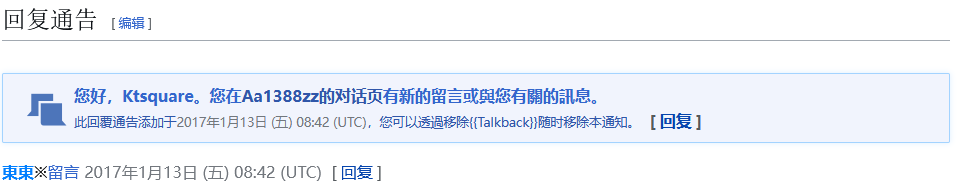

In [88]:
parsed_ch_ex6["sections"][11]

{'subsections': [],
 'comments': [{'text_blocks': ['==回复通告==\n',
    '{{talkback|Aa1388zz|歷史顯示你大量提刪除年分條目|ts=2017年1月13日 (五) 08:42 (UTC)}}\n',
    '[[User:aa1388zz|<span style="color: #007FFF;">\'\'\'東東\'\'\'</span>]]※[[User talk:aa1388zz|留言]] 2017年1月13日 (五) 08:42 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'aa1388zz',
   'time_stamp': '2017年1月13日 (五) 08:42 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '回复通告'}

In [89]:
parsed_ch_ex6["sections"][17]

{'subsections': [],
 'comments': [{'text_blocks': ['== 編輯小技巧提示 ==\n',
    '加入來源後，請幫手移走「來源請求」標纖（<nowiki>{{fact|}}</nowiki>），例如你在[[香港秦朝至元朝歷史]]中的編輯，謝謝！——[[User:Silvermetals|Silvermetals]]（[[User talk:Silvermetals|留言]]） 2017年7月29日 (六) 14:23 (UTC)\n'],
   'comments': [{'text_blocks': [':Silvermetals你好，当中的一些内容可以在一时间找到可靠来源？例如城市論壇二〇一四年五月十八日的讲者们的意见。--[[user:Ktsquare|Ktsquare]] [[user talk:Ktsquare|留言]] 2017年7月30日 (日) 23:20 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Ktsquare',
     'time_stamp': '2017年7月30日 (日) 23:20 (UTC)'}],
   'cosigners': [],
   'author': 'Silvermetals',
   'time_stamp': '2017年7月29日 (六) 14:23 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 編輯小技巧提示 '}

In [90]:
parsed_ch_ex6["sections"][19]

{'subsections': [],
 'comments': [{'text_blocks': ['== RE:香港秦朝至元朝歷史：最早來源是哪？ ==\n',
    '當年是取自香港各區的風物志書籍，以及白德:《香港文物志》、劉蜀永：《簡明香港史》等，以及從其他[[香港]]相關的條目分拆出文字，但具體哪一句取自何方，基於已是12年前的事，恕小弟已無法逐句尋回了。[[User:Stewart|Stewart]]~[[User_talk:Stewart|惡龍]] 2018年6月6日 (三) 16:07 (UTC)\n'],
   'comments': [{'text_blocks': [':[https://zh.wikipedia.org/w/index.php?title=%E9%A6%99%E6%B8%AF%E6%AD%B7%E5%8F%B2&type=revision&diff=212826&oldid=118255 我對我自己寫過的內容還是有印象的]、[https://zh.wikipedia.org/w/index.php?title=%E9%A6%99%E6%B8%AF%E6%AD%B7%E5%8F%B2&type=revision&diff=1982246&oldid=210370 其后合众人之力]。有人的洞見[https://zh.wikipedia.org/w/index.php?title=%E9%A6%99%E6%B8%AF%E6%AD%B7%E5%8F%B2&type=revision&diff=2008015&oldid=210370 再次在我面前又一次重現]啦。-- [[user:Ktsquare|Ktsquare]] [[user talk:Ktsquare|留言]] 2018年6月7日 (四) 02:50 (UTC)\n'],
     'comments': [{'text_blocks': ['::重新編寫還是怎樣？[[User:Stewart|Stewart]]~[[User_talk:Stewart|惡龍]] 2018年6月12日 (二) 03:44 (UTC)\n'],
       'comments': [{'text_blocks': [':::资料存档。--- [[user:Ktsquare|Ktsquare

This section can test whether quoted material is parsed correctly: https://zh.wikipedia.org/wiki/User_talk:Ktsquare#Re:_%E6%BE%B3%E9%96%80%E7%B8%BD%E7%9D%A3%E5%90%8D%E7%A7%B0%E7%BF%BB%E8%AF%91

In [91]:
parsed_ch_ex6["sections"][30]

{'subsections': [],
 'comments': [{'text_blocks': ['== Re: 澳門總督名称翻译  ==\n',
    '按[https://app04.fmac.org.mo/macaubook/book090/html/0434001.htm 澳門政府基金會提供的人名對照]，“Martim Afonso de Melo Coutinho”衹譯為「馬爾丁·阿豐索」，如果全部字都要譯的話，可能是「馬爾丁·阿豐索·[[澳門總督|美路·高(丁/甸/定)玉]]」吧。--[[User:Cdip150|-{街燈電箱150號}-]] <small>[[User talk:Cdip150|開箱維修]] [[Special:Contributions/Cdip150|抄錶]] [[WP:AH/ARC/2011/1-3|檢驗證明]]</small> 2020年3月2日 (一) 03:27 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':按[http://www.icm.gov.mo/rc/viewer/10040/701 澳門文化局的資料]，「別都盧」是指Pedro Homen Coutinho（Martim Afonso de Melo Coutinho的胞弟），所以「別都盧」並不是“Coutinho”的音譯，而“Pedro”才是對應「別都盧」。--[[User:Cdip150|-{街燈電箱150號}-]] <small>[[User talk:Cdip150|開箱維修]] [[Special:Contributions/Cdip150|抄錶]] [[WP:AH/ARC/2011/1-3|檢驗證明]]</small> 2020年3月3日 (二) 09:06 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Cdip150',
     'time_stamp': '2020年3月3日 (二) 09:06 (UTC)'}],
   'cosigners': [],
   'author': 'Cdip150',
   'time_stamp': '2020年3月2日 (一) 03:27 (

In [92]:
parsed_ch_ex6["sections"][30]["comments"][0]["author"]

'Cdip150'

https://zh.wikipedia.org/wiki/Talk:%E7%A8%8B%E5%BA%8F%E8%AE%BE%E8%AE%A1

In [94]:
ch_ex7 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex7 = page
        break
        
# grab last revision
revision7 = None
for revision7 in ch_ex7:
    pass

parsed_ch_ex7 = wc.parse(revision7.text)

In [95]:
ch_ex7

Page(id=185, title='程序设计', namespace=1, redirect=None, restrictions=[])

In [96]:
parsed_ch_ex7

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['{{WikiProject banner shell|vital=yes|\n{{WikiProject Computer science|importance=top}}\n}}\n',
      '，讨论讨论。:)\n',
      '\n',
      'Can anyone who can edit this page ?\n',
      '\n',
      '「QF-Zhang」'],
     'comments': [],
     'cosigners': []}]}]}

https://zh.wikipedia.org/wiki/User_talk:Mountain/%E5%AD%98%E6%A1%A3_1

In [97]:
ch_ex8 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex8 = page
        break
        
# grab last revision
revision8 = None
for revision8 in ch_ex8:
    pass

parsed_ch_ex8 = wc.parse(revision8.text)

In [99]:
ch_ex8

Page(id=234, title='Mountain/存档 1', namespace=3, redirect=None, restrictions=[])

In [100]:
parsed_ch_ex8["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['== 申請罷免管理員[[User:Shizhao]]投票==\n',
    '\n',
    '我注意到你在[[Wikipedia:申請罷免管理員/Shizhao/第4次]]投票時未加上理由。[[WP:RFDA|申請罷免管理員方針]]（解任過程：→投票）有「無論支持票還是反對票，投票人需給出理由」的規定。如果日後嚴格地復核投票結果，你的一票就有被註為無效的可能。請你考慮前去補上一個簡短的理由吧。—[[User:Computor|Computor]] ([[User talk:Computor|留言]]) 2010年4月12日 (一) 13:57 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Computor',
   'time_stamp': '2010年4月12日 (一) 13:57 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 申請罷免管理員[[User:Shizhao]]投票'}

In [101]:
parsed_ch_ex8["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 有兴趣加入条目拯救队吗？==\n',
    '\n',
    '如题—[[User:Edouardlicn|Edouardlicn]] ([[User talk:Edouardlicn|留言]]) 2010年4月27日 (二) 05:36 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':非常抱歉，因为平日工作比较忙，只能参加有限的几个维基上的活动，还请谅解。--[[User:Mountain|Mountain]] ([[User talk:Mountain#top|留言]]) 2010年4月27日 (二) 09:45 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Mountain',
     'time_stamp': '2010年4月27日 (二) 09:45 (UTC)'}],
   'cosigners': [],
   'author': 'Edouardlicn',
   'time_stamp': '2010年4月27日 (二) 05:36 (UTC)'}],
 'heading': ' 有兴趣加入条目拯救队吗？'}

In [102]:
parsed_ch_ex8["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['== 打個招呼==\n',
    '\n',
    '你好啊\n',
    '\n',
    '這一陣子才開始真正摸索怎麼編輯,先來打個招呼.(之前試過一兩次,但總是半途而廢...)\n',
    '\n',
    '(預覽時發現"發言須與本百科之寫作或改進有關",我這麼算是違規了嗎?)\n',
    '\n',
    '在維基上最擔心的就是不小心犯規了...\n',
    '\n',
    '[[User:Feima|Feima]] ([[User talk:Feima|留言]]) 2010年5月14日 (五) 02:18 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Feima',
   'time_stamp': '2010年5月14日 (五) 02:18 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 打個招呼'}

Fancy formatting: But further experimentation reveals that the user signature extraction issue is not actually the fancy formatting--it's due to the code for parsing signatures being dependent on first finding the timestamp.
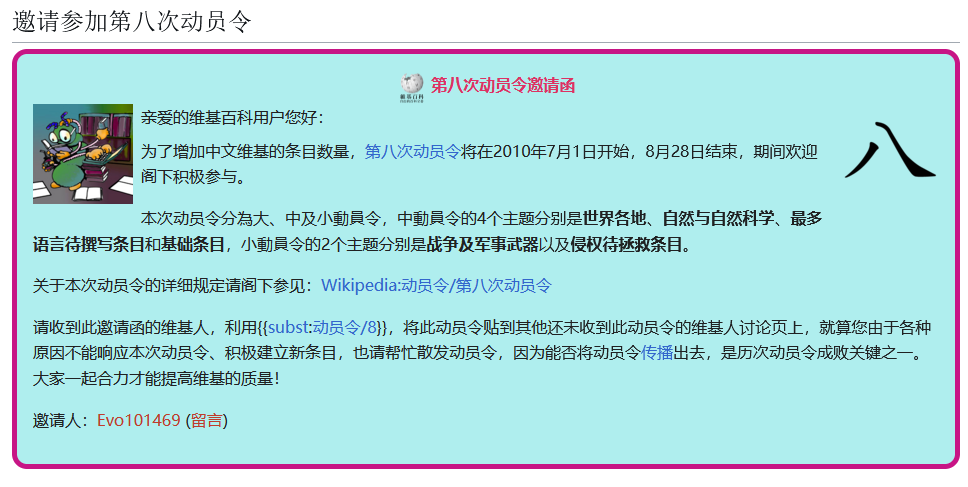

In [103]:
parsed_ch_ex8["sections"][4]

{'subsections': [],
 'comments': [{'text_blocks': ['== 邀请参加第八次动员令==\n',
    '<div style="border: 5px solid #C71585; background: #AFEEEE; padding: 1em; -moz-border-radius: 15px; -webkit-border-radius: 15px;">\n\n<font style="font-size: 170%; "></font><center><font color="#DE3163">[[File:Wikipedia-logo-v2-zh.svg|30px|中文维基百科]]  \'\'\'第八次动员令邀请函\'\'\'</font></center>\n\n[[文件:Wikipedesketch1.png|100px|left|查查资料，完善条目！]][[File:八.png|100px|right|第八次动员令|link=File:%E5%85%AB.png]]亲爱的维基百科用户您好：\n\n为了增加中文维基的条目数量，[[wikipedia:动员令/第八次动员令|第八次动员令]]将在2010年7月1日开始，8月28日结束，期间欢迎阁下积极参与。\n\n本次动员令分為大、中及小動員令，中動員令的4个主题分别是\'\'\'世界各地\'\'\'、\'\'\'自然与自然科学\'\'\'、\'\'\'最多语言待撰写条目\'\'\'和\'\'\'基础条目\'\'\'，小動員令的2个主题分别是\'\'\'战争及军事武器\'\'\'以及\'\'\'侵权待拯救条目\'\'\'。\n\n关于本次动员令的详细规定请阁下参见：[[Wikipedia:动员令/第八次动员令]]\n\n请收到此邀请函的维基人，利用{{tls|动员令/8}}，将此动员令贴到其他还未收到此动员令的维基人讨论页上，就算您由于各种原因不能响应本次动员令、积极建立新条目，也请帮忙散发动员令，因为能否将动员令[[wikipedia:动员令/散发动员令|传播]]出去，是历次动员令成败关键之一。大家一起合力才能提高维基的质量！\n\n<span style="display:none"></span>邀请人：[[User:Evo101469|Evo101

In [104]:
parsed_ch_ex8["sections"][7]

{'subsections': [],
 'comments': [{'text_blocks': ['== 編輯星章==\n',
    '\n',
    '{| style="border: 1px solid gray; background-color: #fdffe7;"\n\n| rowspan="2" valign="middle" |[[File:Editors Barnstar Hires.png|100px]]\n\n| rowspan="2" |\n| style="font-size: x-large; padding: 0; vertical-align: middle; height: 1.1em;" |\'\'\'編輯星章\'\'\'\n\n|-\n| style="vertical-align: middle; border-top: 1px solid gray;" |作為維基人的先驅，此星章一定要頒給你。 [[User:Flamelai|Flame]] [[User talk:Flamelai|歡迎泡茶]] 2010年7月21日 (三) 02:10 (UTC)\n\n|}\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Flamelai',
   'time_stamp': '2010年7月21日 (三) 02:10 (UTC)'}],
 'heading': ' 編輯星章'}

In [105]:
parsed_ch_ex8["sections"][8]

{'subsections': [],
 'comments': [{'text_blocks': ['== 請問您正在做什麼測試==\n',
    '默默注意您在多個條目討論頁上的編輯測試很久了，但一直看不懂您在做什麼？[[User:燈火闌珊處|<span style="color: #191970;">\'\'\'燈火闌珊處\'\'\'</span>]]－[[User talk:燈火闌珊處|<span style="color: #FFB366;">點燈</span>]][[Special:用户贡献/燈火闌珊處|<sup><span style="font-family:Monotype Corsiva;font-size:medium;color:#007FFF">Wahrheit wird man frei machen.</span></sup>]] 2010年10月3日 (日) 09:14 (UTC)\n'],
   'comments': [{'text_blocks': [':原來如此，期待閣下的工具開發成功。順祝編安。[[User:燈火闌珊處|<span style="color: #191970;">\'\'\'燈火闌珊處\'\'\'</span>]]－[[User talk:燈火闌珊處|<span style="color: #FFB366;">點燈</span>]][[Special:用户贡献/燈火闌珊處|<sup><span style="font-family:Monotype Corsiva;font-size:medium;color:#007FFF">Wahrheit wird man frei machen.</span></sup>]] 2010年10月3日 (日) 09:30 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': '燈火闌珊處',
     'time_stamp': '2010年10月3日 (日) 09:30 (UTC)'}],
   'cosigners': [],
   'author': '燈火闌珊處',
   'time_stamp': '2010年10月3日 (日) 09:14 (UTC)'}],
 'headin

In [106]:
parsed_ch_ex8["sections"][9]

{'subsections': [],
 'comments': [{'text_blocks': ['== 可用了嗎?==\n',
    'hi~ ultrafilter可以使用了嗎?--[[User:Jasonzhuocn|Jasonzhuocn]] ([[User talk:Jasonzhuocn|留言]]) 2010年10月9日 (六) 14:00 (UTC)\n'],
   'comments': [{'text_blocks': [':抱歉打扰了。还在调试，有些数据格式还不对。等做好了，我会通知大家。--[[User:Mountain|Mountain]] ([[User talk:Mountain#top|留言]]) 2010年10月9日 (六) 14:02 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Mountain',
     'time_stamp': '2010年10月9日 (六) 14:02 (UTC)'}],
   'cosigners': [],
   'author': 'Jasonzhuocn',
   'time_stamp': '2010年10月9日 (六) 14:00 (UTC)'}],
 'heading': ' 可用了嗎?'}

In [107]:
parsed_ch_ex8["sections"][13]

{'subsections': [],
 'comments': [{'text_blocks': ['== 關於維基日報==\n',
    "請問[[WP:維基日報]]這是取代[[WP:維基簡訊]]的新動態快訊？以模組化設計來看，應該頗為容易維護與更新（這比維基簡訊好很多），請問是否開放協助編輯，可否引入版面管理員制度？特色與優良方面可否使用[[維基百科:優良條目/存檔]]？可否融入[[WP:條目質量提升計畫]]（刊載產生之加強條目）？請問你可否至[[WP:條目質量提升計畫/發起創建]]創建您感興趣或有研究之主題提升計畫並成為主持人？以上諸多問題，期待您的回覆，感謝。--'''[[User:wasami007|安可]]''' <sup>[[User talk:Wasami007|-{留言請按此}-]]</sup>  2010年11月4日 (四) 01:12 (UTC)\n"],
   'comments': [{'text_blocks': ['\n',
      ":[[WP:維基簡訊]]經由[[User:Waihorace|HW]]改版後，也是面向站外用戶的，也可通過多種方式（email、rss）遞送給站外用戶（但目前沒成功用過...）。雖然名稱與版面不同，但功能上其實還是可以互相整合（不是內容整合，而是透過內部連結成為姊妹版），這方面希望能與[[User:Waihorace|HW]]切搓商量，他的排版功力已達出神入化境界，維基首頁也是由他改版創建的。--'''[[User:wasami007|安可]]''' <sup>[[User talk:Wasami007|-{留言請按此}-]]</sup>  2010年11月4日 (四) 13:41 (UTC)\n"],
     'comments': [{'text_blocks': ["::另外面向站內用戶的版面應該是[[WP:公告欄]]，而[[WP:主題]]創建方面能善用{{T1|主題公告欄}}發布消息，還有維基百科社群盡量不要區隔你我們，畢竟簡繁合家也有一段時間了，敝人也為中國大陸社群創建[[WP:中國大陸維基人佈告板]]也請多加利用，感謝您的熱心創建。--'''[[User:wasami007|安可]]''' <sup>[[User talk:Wasami007|-{留言請按此}-]]</sup>  2

In [108]:
parsed_ch_ex8["sections"][19]

{'subsections': [],
 'comments': [{'text_blocks': ['==<s>[[Template:Feature]]</s>==\n',
    '\n',
    '想问一下您在这里加的div标签说是bot用，能够具体说一下吗？做什么用？因为我有一个bot脚本在生成这个页面的RSS，我担心您加的内容可能会影响到我运行的脚本....---{百無一用是書生]]}- (<big>[[User talk:Shizhao|&#9742;]]</big>) 2010年12月9日 (四) 03:21 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':呃，写错了，[[Template:Feature]]的修改不会影响到我的脚本，[[Template:Itn]]上的同样的div倒是貌似要让我改写代码才可以---{百無一用是書生]]}- (<big>[[User talk:Shizhao|&#9742;]]</big>) 2010年12月9日 (四) 03:26 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Shizhao',
     'time_stamp': '2010年12月9日 (四) 03:26 (UTC)'}],
   'cosigners': [],
   'author': 'Shizhao',
   'time_stamp': '2010年12月9日 (四) 03:21 (UTC)'}],
 'heading': '<s>[[Template:Feature]]</s>'}

In [109]:
parsed_ch_ex8["sections"][23]

{'subsections': [],
 'comments': [{'text_blocks': ['== 能不能帮忙解禁啊==\n',
    '我不是什么机器人攻击什么的，都是正常编辑啊,自己的页面都不能编辑了T.T[[User:Jimjiawzw|Jimw]] ([[User talk:Jimjiawzw|留言]]) 2011年2月12日 (六) 06:33 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Jimjiawzw',
   'time_stamp': '2011年2月12日 (六) 06:33 (UTC)'},
  {'text_blocks': [' ，@，\n', '\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 能不能帮忙解禁啊'}

In [110]:
parsed_ch_ex8["sections"][30]

{'subsections': [],
 'comments': [{'text_blocks': ['== 邀请您参加第九次动员令==\n',
    '<div style="border: 5px solid #127436; background: #66FF00; padding: 1em; -moz-border-radius: 15px; -webkit-border-radius: 15px;">\n\n<font style="font-size: 170%; "></font><center><font color="red">[[File:Wikipedia-logo-v2-zh.svg|50px|中文维基百科]] \'\'\'[[wikipedia:动员令/第九次动员令|<font color="red">第九次动员令</font>]]邀请函\'\'\'</font></center>\n\n[[File:Wikipe-tan_do_not.png|250px|right|維基娘，第九次動員令的吉祥物]]<big>\'\'\'亲爱的维基百科用户{{PAGENAME}}您好：\'\'\'</big>\n\n首先，感謝你對維基百科的貢獻！为了提升中文维基的条目品質及数量，[[wikipedia:动员令/第九次动员令|第九次动员令]]將於2011年6月25日开始，9月3日结束，我們竭誠邀請您积极参与。\n\n本次动员令分為大、中、小動員令，大動員令是可以在任何主題中貢獻的動員令項目，而中動員令的2个主题分别是\'\'\'人文與社會科學\'\'\'及\'\'\'世界各地\'\'\'，小動員令的4个主题分别是\'\'\'最多語言待撰條目\'\'\'、\'\'\'自然與自然科學\'\'\'、\'\'\'工程、技術與應用科學\'\'\'及\'\'\'外交\'\'\'。\n\n关于本次动员令的详细信息请您参见：\'\'\'[[wikipedia:動員令/第九次動員令|第九次动员令]]\'\'\'，並歡迎您到[[wikipedia:動員令/第九次動員令/新手入門|動員令入門]]頁了解甚麼是動員令，並請至[[wikipedia:動員令/第九次動員令/報名|報名頁面]]報名參與是次動員令，<u>已於6月25日開放報名了</u>。\n\n请收到本邀请函的维基人，将\

In [111]:
parsed_ch_ex8["sections"][32]

{'subsections': [],
 'comments': [{'text_blocks': ['== 星章==\n',
    '\n',
    '{| style="border: 1px solid gray; background-color: #fdffe7;"\n\n| rowspan="2" valign="middle" |[[File:Special Barnstar Hires.png|100px]]\n\n| rowspan="2" |\n| style="font-size: x-large; padding: 0; vertical-align: middle; height: 1.1em;" |\'\'\'特别星章\'\'\'\n\n|-\n| style="vertical-align: middle; border-top: 1px solid gray;" |嘛……所有昨天参加完聚会之后又被雨淋的每人一个特别星章……辛苦了～  <span style="color:#0000FF">\'\'\'--\'\'\'</span> [[User:Park1996|<span style="color:#0000FF">\'\'\'Park\'\'\'</span>]]<sup><small> [[User talk:Park1996#top|<span style="color:#FF0000">\'\'\'进站\'\'\'</span>]] [[Special:用户贡献/Park1996|<span style="color:#0000FF">\'\'\'入闸\'\'\'</span>]] [[User:Park1996/IM|<span style="color:#FF0000">\'\'\'乘车\'\'\'</span>]]</small></sup> 2011年7月27日 (三) 01:21 (UTC)\n\n|}\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Park1996',
   'time_stamp': '2011年7月27日 (三) 01:21 (UTC)'}],
 'heading': ' 星章'}

Handling quoted comments: https://zh.wikipedia.org/wiki/User_talk:Mountain/%E5%AD%98%E6%A1%A3_1#%E8%A1%A5%E5%85%85%E5%BD%93%E5%B9%B4%E9%98%81%E4%B8%8B%E7%9A%84%E9%97%AE%E9%A2%98%E2%80%A6%E2%80%A6%E9%A8%B7%E6%93%BE

In [112]:
parsed_ch_ex8["sections"][-4]

{'subsections': [],
 'comments': [{'text_blocks': ['== 补充当年阁下的问题……騷擾==\n',
    "依据[https://meta.wikimedia.org/w/index.php?title=Privacy_policy&oldid=1041992 13:49, 14 June 2008 by Anthere]，[https://zh.wikipedia.org/wiki/Wikipedia:%E7%94%B3%E8%AF%B7%E6%88%90%E4%B8%BA%E7%AE%A1%E7%90%86%E5%91%98/Ktsquare/%E7%AC%AC2%E6%AC%A1 2008年6月13日 (五) 18:17 时间点三）之前若干月日閣下違反了私隱政策]。[https://meta.wikimedia.org/w/index.php?title=Privacy_policy&oldid=1041992#Policy_on_release_of_data_derived_from_page_logs '''Wikimedia policy does not permit public distribution of such information under any circumstances, except as described above''']。本人在2008年6月13日 (五) 18:17之前若干月日（时间点一）明确向与阁下都是根源于中华人民共和国的地区另一位用户说明不需要打搞在下。阁下在时间点一之后、2008年6月13日 (五) 18:17之前若干月日（时间点二）进入本人、非维基百科相关的网站。\n",
    '\n',
    '<blockquote class="templatequote">站內行為導致站外問題，歸根結底問題在站外，我作為維基百科站內的管理員沒有能力管理站外事務，除非是站內可以控制的電郵聯繫之類的功能。--[[Special:用户贡献/Tigerzeng|Tigerzeng2019年2月17日 (日) 07:54 (UTC)]]</blockquote>\n',
    '\n',
    '从时间点三（2008年6月13日 (五) 18:17）至2019年2

https://zh.wikipedia.org/wiki/User_talk:Number5

In [113]:
ch_ex9 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex9 = page
        break
        
# grab last revision
revision9 = None
for revision9 in ch_ex9:
    pass

parsed_ch_ex9 = wc.parse(revision9.text)

In [115]:
ch_ex9

Page(id=238, title='Number5', namespace=3, redirect=None, restrictions=[])

Possible weird edge case where signature and timestamp weren't properly parsed

- Is this due to the extra whitespace in the timestamp?

In [114]:
parsed_ch_ex9

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['欢迎！和大家一起分享我们的知识吧。:)[[用户:Mountain|Mountain]] 2002年12月 11日 14:39 (UTC)'],
     'comments': [],
     'cosigners': []}]}]}

https://zh.wikipedia.org/wiki/Talk:%E5%AF%86%E7%A0%81%E5%AD%A6

In [116]:
ch_ex10 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex10 = page
        break
        
# grab last revision
revision10 = None
for revision10 in ch_ex10:
    pass

parsed_ch_ex10 = wc.parse(revision10.text)

In [118]:
ch_ex10

Page(id=279, title='密码学', namespace=1, redirect=None, restrictions=[])

In [119]:
parsed_ch_ex10["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{WikiProject banner shell|class=Start|vital=yes|\n{{WikiProject Maths|importance=top}}\n{{WikiProject Computer science|importance=top}}\n{{WikiProject Cryptography |importance=top}}\n{{WikiProject FAOL |1=英语 |2=en:Cryptography}}\n}}\n',
    '\n'],
   'comments': [],
   'cosigners': []}]}

In [120]:
parsed_ch_ex10["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==Untitled==\n',
    '这条条目的内容出自瑞星软件的网站,因此版权应该属于瑞星,似乎有违反GNU自由文档协议之嫌.所以先放到这里做参考.而且本文也不适合做百科全书的条目.希望大家能参考以下内容,但尽量使用原创的文章.详悉关于版权的问题还是参考[[Wikipedia:版权信息]]--[[用户:Formulax|Formulax]] 2003年1月17日 07:49 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Formulax',
   'time_stamp': '2003年1月17日 07:49 (UTC)'},
  {'text_blocks': ['----\n',
    '\n',
    '本文出自:\n',
    'http://211.101.232.5/safety/safetyschool/safetylesson/1219mmx.htm\n',
    '\n',
    '到目前为止，我们已经对网络的基础知识有了相当的了解，并且连TCP/IP协议都知道了不少，好现在我要问你一个非常简单的问题——放心，不是测验，这个问题就是：你有免费电子邮件吗？——99.99%的可能性是有，是吧？（什么？你还没有？搞不懂你，快去申请一个！！！）接下来告诉你一个比较那个的事实，嘿嘿，你知不知道，你的邮件在网上是以明文的形式传输的？呵呵，不知道了吧——OK，恩哼，大家做好了，现在开始讲课！！\n',
    '\n',
    '上面我们已经知道了加密的必要性，现在我们以一个实例来看看加密的过程。假设你想通过Internet给你表妹送条秘密消息，于是你打算对其进行加密。你通过一种复杂的方式将其变为不规则码的加密信息，除了你的表妹没有人能把它解释成可以读懂的文件，而她之所以能把它读懂，也只是因为你给了她一个解密方法，她将用它把加密的消息变得规则，恢复它的真实面貌。常规的单密钥加密方法是：在你使用它加密之前，把加密密码告诉她。例如，一个简单的单密钥加密方法是把原信息中的字母按字母表的顺序依次移动3位。这样，单同DOG变为GRJ，下面的表显示了一行被用单密钥加密方案

In [121]:
parsed_ch_ex10["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 外部链接已修改 ==\n',
    '\n',
    '各位维基人：\n',
    '\n',
    '我刚刚修改了[[密码学]]中的1个外部链接，请大家仔细检查[https://zh.wikipedia.org/w/index.php?diff=prev&oldid=45687178 我的编辑]。如果您有疑问，或者需要让机器人忽略某个链接甚至整个页面，请访问[[:m:InternetArchiveBot/FAQ|这个简单的FAQ]]获取更多信息。我进行了以下修改：\n',
    '*向 http://www.murky.org/cryptography/index.shtml 中加入存档链接 https://web.archive.org/web/20040609180803/http://www.murky.org/cryptography/index.shtml\n',
    '\n',
    '有关机器人修正错误的详情请参阅FAQ。\n',
    '\n',
    '祝编安。—[[User:InternetArchiveBot|\'\'\'<span style="color:darkgrey;font-family:monospace">InternetArchiveBot</span>\'\'\']] <span style="color:green;font-family:Rockwell">([[:en:User talk:InternetArchiveBot|報告軟件缺陷]])</span> 2017年8月14日 (一) 23:46 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'InternetArchiveBot',
   'time_stamp': '2017年8月14日 (一) 23:46 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 外部链接已修改 '}

In [122]:
parsed_ch_ex10["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['== 外部链接已修改 ==\n',
    '\n',
    '各位维基人：\n',
    '\n',
    '我刚刚修改了[[密码学]]中的4个外部链接，请大家仔细检查[https://zh.wikipedia.org/w/index.php?diff=prev&oldid=46265944 我的编辑]。如果您有疑问，或者需要让机器人忽略某个链接甚至整个页面，请访问[[:m:InternetArchiveBot/FAQ|这个简单的FAQ]]获取更多信息。我进行了以下修改：\n',
    '*向 http://www.tcs.hut.fi/~helger/crypto/ 中加入存档链接 https://web.archive.org/web/20040210212414/http://www.tcs.hut.fi/~helger/crypto/\n',
    '*向 http://www.rsasecurity.com/rsalabs/faq/index.html 中加入存档链接 https://web.archive.org/web/20040401123210/http://www.rsasecurity.com/rsalabs/faq/index.html\n',
    '*向 http://www.mindspring.com/~schlafly/crypto/faq.htm 中加入存档链接 https://web.archive.org/web/20040423165953/http://www.mindspring.com/~schlafly/crypto/faq.htm\n',
    '*向 http://home.ecn.ab.ca/~jsavard/crypto/jscrypt.htm 中加入存档链接 https://web.archive.org/web/20040402055610/http://home.ecn.ab.ca/~jsavard/crypto/jscrypt.htm\n',
    '\n',
    '有关机器人修正错误的详情请参阅FAQ。\n',
    '\n',
    '祝编安。—[[User:Inter

Possible weird edge case where signature and timestamp weren't properly parsed

- Is this due to the missing timestamp? - Yes!

In [124]:
ch_ex11 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex11 = page
        break
        
# grab last revision
revision11 = None
for revision11 in ch_ex11:
    pass

parsed_ch_ex11 = wc.parse(revision11.text)

In [125]:
ch_ex11

Page(id=347, title='Dlloader', namespace=3, redirect=None, restrictions=[])

In [127]:
parsed_ch_ex11

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['请问你所上载的邓丽君的照片版权是属于谁的？如果是专有的话，请不要使用在内容开放的百科全书上。详情参见[[Wikipedia:版权信息]]，谢谢。\n',
      '\n',
      'Dlloader，请在正式开始编辑前，先参阅[[Wikipedia:如何编辑页面]]、[[Wikipedia:帮助]]、[[Wikipedia:欢迎，新来者]]和[[Wikipedia:版权信息]]，还可以到[[Wikipedia:沙盒]]练习，谢谢。--[[用户:Formulax|formulax]]'],
     'comments': [],
     'cosigners': []}]}]}

https://zh.wikipedia.org/wiki/User_talk:%E5%9B%9B%E4%BA%BA%E5%B8%AE

In [128]:
ch_ex12 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex12 = page
        break
        
# grab last revision
revision12 = None
for revision12 in ch_ex12:
    pass

parsed_ch_ex12 = wc.parse(revision12.text)

In [129]:
ch_ex12

Page(id=360, title='四人帮', namespace=3, redirect=None, restrictions=[])

In [130]:
parsed_ch_ex12["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{Old vfd multi|2009/10/23|d|page=User:四人帮|bot_checked=OK}}\n',
    '<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，{{BASEPAGENAME}}！[[Wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>\n',
    '\n',
    "感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了'''[[Wikipedia:欢迎，新来者|歡迎辭]]'''外，也請您了解以下重要文章：\n",
    '{| style="background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;" \n|- style="vertical-align: top;"\n| style="background: #f4f4f4; padding: .8em .2em;" | [[File:Nuvola apps korganizer.png|35px|left|政策]]\n<div style="margin-left: 45px;">\'\'\'[[Wikipedia:五大支柱|五大支柱]]\'\'\'<br /><small>[[Wikipedia:不适合维基百科的文章|百科]]、[[Wikipedia:中性的观点|中立]]、[[Wikipedia:简明版权信息|开放]]、[[Wikipedia:文明|互重]]、[[Wikipedia:忽略所有规则|勇於改善]]</small></div>\n| style="background: #faf1df; padding: .8em .2em;" | [[File:Nuvola apps emacs.png|45px|left|GNU]]\

In [131]:
parsed_ch_ex12["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==二次动员令==\n',
    "为了增加中文维基的条目数量，8月15日到10月1日为止，请每个[[维基人]]编辑'''至少5个'''新条目，条目必须符合维基的规则，内容至少要达到[[条目]]标准，不可是[[維基百科:小條目|小條目]]或[[維基百科:小小條目|小小條目]]，如果可以的话，请尽量提高所编写条目的质量、内容，甚至达到推荐新条目的水平，[[创建新条目]]，创建后请在“[[Wikipedia:正在進行的動員令|二次动员令]]”内设链接，谢谢！\n",
    '\n',
    "收到此动员令的维基人，请将此动员令贴到'''至少5个'''还未收到此动员令的维基人讨论页上，就算不想建立新条目，也请帮忙散发动员令，因为能否将动员令传播出去，是成败关键之一，“首次动员令”效果不大，就是因为没有在传播。\n",
    '\n',
    '现在[[中文维基百科]]有9万注册用户，只要有4000人参加动员令，10月1日就会增加2万条目，意味著中文维基将迅速超越[[:ru:|俄文维基]]，进而突破10万条目大关，且是很漂亮的突破10万大关，因为增加的是有质量的条目，非滥竽充数者，请大家尽力帮忙完成这壮举，就算是新人，也不要害怕，尽量创建新条目，若有问题就改正，参加这次动员令活动，也可让新人们更快学会如何创建条目。--[[User:真實事求是|真實事求是]] 12:36 2006年8月16日 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': '真實事求是',
   'time_stamp': '12:36 2006年8月16日 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '二次动员令'}

In [132]:
parsed_ch_ex12["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 2009年10月  ==\n',
    '<!--googleoff: all-->{{#ifeq:{{LC:{{NAMESPACE}}}}|user|{{Indefblockeduser}}}}<div style="border-width:1px;border-style:solid;padding:0.5em 1em">\n',
    '[[File:Stop_x_nuvola.svg|left|30px]]\n',
    '<p style="text-align: center;">\'\'\'這個用戶因名稱不適當而遭到永久封禁\'\'\'。</p>\n',
    "根據'''[[Wikipedia:封禁方针|封禁方針]]'''及'''[[Wikipedia:用户名|用戶名原則]]'''，我們認為您使用的用戶名並不恰當，因此管理員已永久封禁這個帳戶。[[Wikipedia:用户名|用戶名原則]]已提供了選擇用戶名的指引。'''簡而言之，用戶名不應帶有侮辱性、攻擊性、破壞性及宣傳成份，與現實世界中各組織或團體相關，或易於令人混淆。'''另外，除非帳戶是個已準許運作的機械人，否則用戶名亦不應以「bot」结尾。\n",
    '\n',
    '\'\'\'我們建議您[[Special:Userlogin/signup|註冊]]一個新而無抵觸用戶名原則的用戶名，我們亦歡迎您使用恰當的用戶對維基百科作出貢獻。\'\'\'如果您認為是次封禁有不妥當的地方，請於您的<span class="plainlinks">[{{SERVER}}/w/index.php?title={{TALKPAGENAMEE}}&redirect=no 討論頁]</span>加入{{tl|封禁申訴}}並寫下您要求複審的理由或您的疑問。縱然您被禁止編輯，您仍然可以編輯自己的用戶討論頁。\n',
    '\n',
    '如果您仍想使用這個帳戶編輯維基百科，請以[[Wikipedia:邮件列表|電子郵件列表]]向行政員請求更改用戶名。'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 2009年10月 

https://zh.wikipedia.org/wiki/Talk:%E9%9D%9E%E6%B4%B2%E6%AD%B7%E5%8F%B2

In [133]:
ch_ex13 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex13 = page
        break
        
# grab last revision
revision13 = None
for revision13 in ch_ex13:
    pass

parsed_ch_ex13 = wc.parse(revision13.text)

In [134]:
ch_ex13

Page(id=400, title='非洲歷史', namespace=1, redirect=None, restrictions=[])

In [135]:
parsed_ch_ex13

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['{{WikiProject banner shell|vital=yes|\n{{非洲專題 |auto=y}}\n}}\n',
      '古代埃及（Ancient Egypt）\n',
      '\n',
      '概述：\n',
      '\n',
      '公元前 3，500年 出现奴隶制小国。\n',
      '\n',
      '公元前 3，100年 美尼斯（King Menes）统一上、下埃及，定都孟菲斯（Memphis），建立埃及第一个统一的政权。埃及进入第一王朝时期。\n',
      '\n',
      '埃及的历史分期：\n',
      '\n',
      '前王朝时期（Predynastic Period）   约公元前5000-31000年\n',
      '\n',
      '早王朝时期（Early  Period）    约公元前3100-2786年\n',
      '\n',
      '古王国时期（Old Kingdom）    约公元前2686-2181 BC年\n',
      '\n',
      '第一中间期（First Intermediate Period）    公元前2181-1991年\n',
      '\n',
      '中王国时期（Middle Kingdom）    公元前1991-1786年\n',
      '\n',
      '第二中间期（Second Intermediate Period）      公元前1786-1567年\n',
      '\n',
      '新王国时期（New Kingdom）     公元前1567-1085年\n',
      '\n',
      '第三中间期（Third Intermediate Period）    公元前1070-653年 \n',
      '\n',
      '晚王朝时期（Late Period）    公元前664-332年 \n',
      '\n',
      '马其顿统治时期（Macedonian Dynast

In [136]:
ch_ex14 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex14 = page
        break
        
# grab last revision
revision14 = None
for revision14 in ch_ex14:
    pass

parsed_ch_ex14 = wc.parse(revision14.text)

In [137]:
ch_ex14

Page(id=505, title='Mayfly~zhwiki', namespace=3, redirect=None, restrictions=[])

In [138]:
parsed_ch_ex14["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['Mayfly，欢迎你加入Wikipedia！不过在正式开始参与编辑工作之前，请先仔细阅读[[Wikipedia:帮助]]、[[Wikipedia:如何编辑页面]]、[[Wikipedia:欢迎，新来者]]以及（非常重要的）[[Wikipedia:版权信息]]。--[[用户:Formulax|Formulax]] 2003年3月25日 07:22 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Formulax',
   'time_stamp': '2003年3月25日 07:22 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}]}

In [139]:
parsed_ch_ex14["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['== 您的賬戶將被重新命名 ==\n',
    '\n',
    '<div class="plainlinks mw-content-ltr" lang="zh" dir="ltr">\n\n您好：\n\n維基媒體基金會的開發團隊為了給用戶提供更新、更好的工具（如跨維基通知），正在對账戶的運作方式進行一些調整。這意味著用戶將在任何地方都擁有[[Special:MyLanguage/Help:Unified login|相同的账戶名稱]]。這會讓我們給您帶來更加便利的編輯及討論體驗，並提供更靈活的用戶權限管理工具，但前提條件之一是同一账戶名稱在維基媒體的900個網站中都必須由同一人所持有（詳情請見[[m:Special:MyLanguage/Single User Login finalisation announcement|公告]]）。\n\n不幸的是您的账户與另一個名稱為Mayfly的账户衝突。為確保您及另一位用戶於將來皆可正常使用維基媒體的各個网站，我們將會把您的账户重新命名為Mayfly~zhwiki。如果您可以接受，則您不需要做任何事情。如果您希望將账戶改為其他名稱，您可以[[Special:GlobalRenameRequest|提出申請]]。如果您是這個用戶名在所有維基上的擁有者，因而不應收到這則通知，請您到[[Special:MergeAccount|合併帳戶]]頁面確認您的所有的帳戶皆已確實整合，以免您的帳戶被重新命名。\n\n屆時，您的账户仍可如以前般使用，且繼承所有的編輯記錄，但您在登錄時必需使用新的账户名稱。\n\n不便之處，敬請見諒。\n\n<br />[[m:User:Keegan (WMF)|Keegan Peterzell]]<br />維基媒體基金會社群聯絡員\n</div> 2015年3月20日 (五) 10:40 (UTC)\n',
    '<!-- SUL finalisation notification -->\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 您的賬戶將被重新命名 '}

In [140]:
parsed_ch_ex14["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 已完成重命名 ==\n',
    '\n',
    '<div class="plainlinks mw-content-ltr" lang="zh" dir="ltr">\n作为[[m:Special:MyLanguage/Single User Login finalisation announcement|单一用户登录最终落实阶段]]的一部分，本帐号已被重命名。如果您持有该帐号，您可[[{{#special:userlogin}}|使用原用户名及密码登录]]以了解详情。如果不喜欢新用户名，您可以在登录后使用该表格自行选择用户名：[[{{#special:GlobalRenameRequest}}]]。 -- [[m:User:Keegan (WMF)|Keegan (WMF)]] ([[m:User talk:Keegan (WMF)|讨论页]])\n</div> 2015年4月23日 (四) 02:02 (UTC)\n',
    '<!-- SUL post-rename notification -->'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 已完成重命名 '}

In [141]:
ch_ex15 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex15 = page
        break
        
# grab last revision
revision15 = None
for revision15 in ch_ex15:
    pass

parsed_ch_ex15 = wc.parse(revision15.text)

In [142]:
ch_ex15

Page(id=512, title='中华人民共和国元帅', namespace=1, redirect=None, restrictions=[])

In [143]:
parsed_ch_ex15

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['{{WikiProject banner shell|living=no|listas=z|\n{{WikiProject Biography|importance=na}}\n}}\n'],
     'comments': [],
     'cosigners': []}]},
  {'subsections': [],
   'comments': [{'text_blocks': ['==Untitled==\n',
      '请恕我无知，我真的不知道甚么是十大元帅。他们是谁？干过甚么？有甚么背景资料？一篇好的文章（就算是很短的）至少都应让一个对这题目一无所知的人有最起码的认识啊。 --[[用户:Lorenzarius|Lorenzarius]] 2003年3月25日 08:47 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Lorenzarius',
     'time_stamp': '2003年3月25日 08:47 (UTC)'},
    {'text_blocks': ['\n',
      '大元帅衔拟给毛泽东，毛泽东不要。故中华人民共和国没有大元帅。只有元帅。\n',
      '十大元帅，说法不妥。'],
     'comments': [],
     'cosigners': []}],
   'heading': 'Untitled'}]}

In [144]:
ch_ex16 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex16 = page
        break
        
# grab last revision
revision16 = None
for revision16 in ch_ex16:
    pass

parsed_ch_ex16 = wc.parse(revision16.text)

In [146]:
ch_ex16

Page(id=513, title='孔子', namespace=1, redirect=None, restrictions=[])

In [168]:
revision16.timestamp

Timestamp('2024-03-31T05:08:16Z')

https://zh.wikipedia.org/w/index.php?title=Talk:%E5%AD%94%E5%AD%90&oldid=82092240

In [147]:
parsed_ch_ex16["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{ITNtalk |1=2004年 |2=9月27日 |oldid1=161910}}\n',
    '{{WikiProject banner shell|class=C|vital=yes|living=no|listas=x|1=\n{{WikiProject Politics |importance=mid}}\n{{WikiProject Biography |importance=top }}\n{{山东专题 |importance=top}}\n{{哲学专题 |importance=top}}\n{{中国专题 |importance=top |auto=y }}\n{{WikiProject Articles for improvement |1=3.4 |2=良}}\n{{教育专题 }}\n}}\n',
    '{{FailedGA}}\n',
    '{{Broken anchors|links=\n* <nowiki>[[世界遗产#世界遗产列表|世界遗产名录]]</nowiki>  錨點（#世界遗产列表）已不可用，因之前[[Special:Diff/68968719|被使用者刪除]]。 <!-- {"title":"世界遗产列表","appear":{"revid":157356,"parentid":156849,"timestamp":"2004-09-23T16:19:23Z","removed_section_titles":[],"added_section_titles":["關於世界遺產的爭議","世界遗产列表"]},"disappear":{"revid":68968719,"parentid":68968656,"timestamp":"2021-12-06T04:06:23Z","removed_section_titles":["世界遗产列表"],"added_section_titles":[]}} -->\n}}\n',
    '\n'],
   'comments': [],
   'cosigners': []}]}

In [148]:
parsed_ch_ex16["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==讨论==\n',
    '各位維基人，我把成就提到有關宣揚理念的部分拆分了，希望成就在敘述上能更簡潔 --[[User:Picnic11219|Picnic11219]]（[[User talk:Picnic11219|留言]]） 2019年1月23日 (三) 04:50 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Picnic11219',
   'time_stamp': '2019年1月23日 (三) 04:50 (UTC)'},
  {'text_blocks': ['\n',
    '----\n',
    '在有人可以給這句說話作出解讀之前, 我先把它取下:\n',
    '(爭議)\n',
    '\n',
    '已移除侵犯版权的资料。(http://www.chinakongzi.net/2550/gb/kzsp.htm) --[[用户:Lorenzarius|Lorenzarius]] 2003年3月25日 09:04 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Lorenzarius',
   'time_stamp': '2003年3月25日 09:04 (UTC)'},
  {'text_blocks': ['\n',
    '----\n',
    '\n',
    "why just 孔子 and not 孔夫子 ? is there an important diff ? in the en: wiki for exemple, it's 孔夫子\n",
    'I know that 夫 means approximatly "grand, great"\n',
    '[http://fr.wikipedia.org/wiki/Utilisateur%3AKoxinga koxinga]\n',
    '\n',
    ': Koxinga, nice to see you here. Thanks again for those e

Illustration of subsections: https://zh.wikipedia.org/wiki/Talk:%E5%AD%94%E5%AD%90

Some of the users really didn't format their posts well (leaving out timestamps or signatures altogether), and as a result the parse is quite messy

In [157]:
parsed_ch_ex16["sections"][2]["subsections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['===支持===\n',
    '#<strike>--[[User:Refrain|Refrain]] 09:11 2005年3月20日</strike>\n',
    '#:目前重心为[[丝绸之路]]，只好先放弃了……。--[[User:Refrain|Refrain]] 12:51 2005年3月21日 (UTC)\n'],
   'comments': [{'text_blocks': ['#本人从来不到庙里烧香磕头，但是孔（文）庙例外 :-)  --[[User:Captmjc|这个人很懒，什么也没留下]] 08:44 2005年4月8日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Captmjc',
     'time_stamp': '08:44 2005年4月8日 (UTC)'},
    {'text_blocks': ['#支持，这个人对于中国文化有着莫大的影响 --puhongyi\n',
      '#支持。--[[User:Alexcn|Alexcn]] 07:48 2005年6月2日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Alexcn',
     'time_stamp': '07:48 2005年6月2日 (UTC)'},
    {'text_blocks': ['#支持。读论语，才知道自己以前对老夫子有很多误解。--[[User:Dice|Dice]] 05:42 2005年6月18日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Dice',
     'time_stamp': '05:42 2005年6月18日 (UTC)'},
    {'text_blocks': ['#绝对支持！孔夫子是我国以及全世界的伟大教育家！我们应该全力完善这个条目！最强烈支持！——伟大汉语\n',
      '#支持.虽然我对孔子不是很喜欢.但孔

In [158]:
parsed_ch_ex16["sections"][2]["subsections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['===反对===\n',
    '#历史方面是不是太多了一点？已经有阿拉伯帝国，丝绸之路，等等。哪位有兴趣的先搞搞吧。[[User:Lion.guo|Lion.guo]] 05:34 2005年7月13日 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Lion.guo',
   'time_stamp': '05:34 2005年7月13日 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '反对'}

In [159]:
parsed_ch_ex16["sections"][2]["subsections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['===评论===\n',
    '*[[孔子]]-----在中文维基这里,对孔子的了解太少了.甚至没有英文.日文.韩文版详实.而这里才是孔子的故乡.中国在国外办的中文学校也是以他命名的.可见他对中国文化和世界文化的影响.而英文版谬误让人觉得可笑.\n',
    '\n',
    'Ancestral name (姓): Zi¹ (Chinese: 子; Pinyin: Zǐ) \n',
    'Clan name (氏): Kong (Ch: 孔 ; Py: Kǒng) \n',
    'Given name (名): Qiu (Ch: 丘 ; Py: Qiū) \n',
    'Courtesy name (字): Zhongni (Ch: 仲尼 ; Py: Zhòngní) \n',
    'Posthumous name (謚): The Ultimate Sage Master\n',
    'of Yore² \n',
    '(Ch: 至聖先師 ;\n',
    'Py: Zhìshèng Xiānshī) \n',
    'Styled: Master Kong³ \n',
    '(Ch: 孔子, less frequently 孔夫子; \n',
    'Py: Kǒngzǐ, less fr. Kǒngfūzǐ; \n',
    "WG: K'ung-tzu, less fr. K'ung Fu-tzu \n",
    '\n',
    '"子"成了姓? 典型的西方思维.\n',
    '\n',
    '建议提升.才能让世界了解孔子.--[[User:222.90.72.60|222.90.72.60]] 09:02 2005年3月20日 (UTC)\n'],
   'comments': [{'text_blocks': [':反對，個人並不對提名者的動機有何不敢苟同之處。但提名者並不了解特色條目的意義與相關的必要知識，再者[[孔子]]條目目前内容有待進一步加強，建議列入[[Wikipedia:条目质量提升计划/票选主题]]進行準備。--[[User:Refrain|Refrain]] 09:11 200

In [160]:
parsed_ch_ex16["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['==  围棋棋手孔祥明及其子孔令文 ==\n',
    '\n',
    '孔祥明是女的。她儿子不应算是孔家的后代。（砖头！我闪。）按照过去的看法，儿子是继承香火的传人，女儿迟早要嫁人，替别人传宗接代。把孔祥明算是孔家的后代也就罢了，孔令文应是聂家人。（我不是说生理上的后代。生理上孔令文当然是孔祥明的后代，也是孔家的后代）。建议去掉孔令文，再说他也不算什么名人，要不是老聂的儿子的话。--[[User:Mongol|蒙人]] 21:39 2005年8月16日 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':孔令文怎么回事不清楚。但是女儿的孩子也可能进入家谱，最常见的例子就是入赘或曰招女婿--[[User:Captmjc|这个人很懒，什么也没留下]][[User_talk:Captmjc|:D]] [[:Image:Nomorecommunism.gif]] 09:20 2005年8月22日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Captmjc',
     'time_stamp': '09:20 2005年8月22日 (UTC)'},
    {'text_blocks': ['\n',
      ':孔子嫡系后裔只包括[[曲阜]]的孔家18（或12？记不清了）个府门头的后裔，其他山西孔氏和浙江孔氏等都不算作孔子嫡系后裔（虽然他们也可能使用孔家的辈分字）。---{[[user:shizhao|百無一用是書生]]}- (<big>[[User talk:Shizhao|&#9742;]]</big>) 09:31 2005年8月22日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Shizhao',
     'time_stamp': '09:31 2005年8月22日 (UTC)'},
    {'text_blocks': ['\n',
      ':呵呵，孔令辉是不是也算孔子后裔？我以前一个

In [161]:
parsed_ch_ex16["sections"][4]

{'subsections': [],
 'comments': [{'text_blocks': ['== 他是轴心时代中国的关键人物 ==\n',
    '\n',
    '啥叫轴心时代中国？莫名其妙，还是我孤陋寡闻？--[[User:Mongol|蒙人]] 21:42 2005年8月16日 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Mongol',
   'time_stamp': '21:42 2005年8月16日 (UTC)'},
  {'text_blocks': ['\n',
    '请参见汤因比<世界历史>,<一个历史学家的宗教观>\n',
    '\n',
    '个人以为《论语》起到了轴心中国宪法的作用。政权组织，中央地方关系，治国理念等等均在其中。法老佛等等\n',
    '地位如同宪法修正案。----潜水艇那么长 03:37 2005年8月24日 (UTC)\n',
    '\n',
    '\n',
    '{{deltalk|sign=[[User:奔流沙|<span style="font-family:黑体;color:#000080">奔流沙</span>]] ([[User talk:奔流沙|<span style="font-family:黑体;color:#000080">留言</span>]])|time=2009年8月13日 (四) 06:33 (UTC)|reason=只是发表无关条目编辑的个人见解。\n}}\n'],
   'comments': [],
   'cosigners': [],
   'author': '奔流沙',
   'time_stamp': '2009年8月13日 (四) 06:33 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 他是轴心时代中国的关键人物 '}

In [162]:
parsed_ch_ex16["sections"][5]

{'subsections': [],
 'comments': [{'text_blocks': ['== 是不是应该写明孔子的生日和逝世的月日？ ==\n',
    '\n',
    '[[User:Xiaojeng|无名无形]] 02:28:21 2005年9月22日 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':我记得孔子的生日好像有几种说法---{[[user:shizhao|百無一用是書生]]}- (<big>[[User talk:Shizhao|&#9742;]]</big>) 02:40 2005年9月22日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Shizhao',
     'time_stamp': '02:40 2005年9月22日 (UTC)'}],
   'cosigners': [],
   'author': 'Xiaojeng',
   'time_stamp': '28:21 2005年9月22日 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 是不是应该写明孔子的生日和逝世的月日？ '}

In [163]:
parsed_ch_ex16["sections"][6]

{'subsections': [],
 'comments': [{'text_blocks': ['== 中国古代的主流学说儒家 ==\n',
    '\n',
    '最重要的学派之一并不能体现儒家的确切的地位。基本上，中国文化观念的基本要素，以儒家为主体，辅以佛、道。实际上汉以后用学派来指儒家已经不合适了。 所以将“他被认为是自汉代起中国古代最重要的学派之一儒家的创始人” 改为“他是自汉代起古代中国的主流学说儒家的创始人”。实际上，在清之前，不仅是中国的主流学说，而且是官方学说。民国以后，儒家依然得到官方的尊崇。只有到中国共产党带着西洋马克思学说来统治中国的时候，和儒家不可避免的发生矛盾，才在官方上打击儒家。不过，改革开放至今，虽然中国共产党还在，不过其“坚持”的马克思学说已经面目全非，所以儒家思想才逐步有了公开发展的空间乃至官方的肯定。 --[[User:Wikinu|Wikinu]] 15:38 2005年11月8日 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Wikinu',
   'time_stamp': '15:38 2005年11月8日 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 中国古代的主流学说儒家 '}

This comment has a deletion notice box at the bottom which ends up getting parsed in with the rest of the message, due to lack of proper post demarcation/signing?: https://zh.wikipedia.org/wiki/Talk:%E5%AD%94%E5%AD%90#Move_from_Wikipedia:?%C2%A2%C3%A5??%C2%A1%C3%A7%E2%80%BA%C2%AE?%E2%80%A2%C3%A7%C2%A5%C2%A8

In [164]:
parsed_ch_ex16["sections"][7]

{'subsections': [{'subsections': [],
   'comments': [{'text_blocks': ['==== 關於孔子條目 ====\n',
      '\n',
      " ''>>>移动开始<<<''\n",
      '\n',
      '我一向崇敬孔子，又受業於孔德成老師．總覺得網路世界上孔老師的資料不夠全面，想在網路世界上整合一下他的資料．素仰維基百科全書的聲名，所以在孔子這個條目中大膽妄為地留下了些添枝加葉的塗鴉，如果唐突了各位先進，請不要在意．由於我初到貴境，不熟悉這裡的遊戲規則．而且我的版權觀念一向不能與時具進，前兩天轉貼了幾條資料，被管理員刪除了，在這裡我應該感謝他們對我的版權知識的教育．話雖如此，有幾點意見我還是想提出來，供大家參考．\n',
      '\n',
      "一．我前幾天初來孔子條目時，看到他的世系表是從微子開始的．我覺得不足，於是往前加上了三十幾代(這在孔氏家譜中有徵的)，一直到軒轅黃帝．後來，我發現維基本身的'少昊'條目過於簡略，而且有錯字(如皞寫成嗥)，所以做了改正補充．孰不知修改未幾，馬上又變回原形．我不知道這是否因為電腦的故障，假若不是的話，如此態度令人覺得蠻橫．\n",
      '\n',
      "二．發現不能轉貼資料後，我於是退而求其次，蒐集資料後改寫．但我發現，有的資料依舊被刪除．如'孔宗願'那條，刪除的理由竟然是我只有IP地址，沒有正式的ID．請問這跟條目的內容有關嗎？如此理由令人覺得有歧視之嫌．\n",
      '\n',
      "三．稍微了解衍聖公府歷史的人，都知道孔氏有南北二宗．而孔子條目的世系部分只講北宗，不講南宗，實為美中不足．於是我補上了衢州南宗的世系，而且另立條目解釋了南宗的來源．結果同樣被刪除．而刪除的原因之一是'不知所云'．原來在下撰寫的資料，在管理員眼中只不過是一堆gibberish而已．如此措辭令人覺得灰心．\n",
      '\n',
      '如前所言，我妄加補充一些資料，只是出於對孔子的崇敬，還有對孔德成老師的愛戴．我很忙，不可能長期泡在網上，也就沒有註冊ID．名者，實之賓也，要來何用？如果各位管理員認為我擾亂的您們的工作秩序，實在非常抱歉，我不會再次出現於此地．謝謝．--[[User:140.11

In [165]:
parsed_ch_ex16["sections"][8]

{'subsections': [],
 'comments': [{'text_blocks': ['==优良条目评选==\n',
    '<small>以下内容从[[Wikipedia:優良條目評選]]搬至</small>\n',
    '* {{article|孔子}} 人文學者-哲學家 -- [[User:沙田友|沙田友]] 11:16 2006年8月30日 (UTC)\n'],
   'comments': [{'text_blocks': ['**{{Oppose}}，没有列明参考文献，而外部连结不等于参考文献。--[[user:长夜无风|长夜无风]]([[user talk:长夜无风|风言风语]]) 15:57 2006年8月30日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': '长夜无风',
     'time_stamp': '15:57 2006年8月30日 (UTC)'},
    {'text_blocks': ['**{{Oppose}} [[User:明陽明|明陽明]] 05:05 2006年9月5日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': '明陽明',
     'time_stamp': '05:05 2006年9月5日 (UTC)'}],
   'cosigners': [],
   'author': '沙田友',
   'time_stamp': '11:16 2006年8月30日 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': '优良条目评选'}

Did the order of the subsections get swapped here?:

In [195]:
parsed_ch_ex16["sections"][9]

{'subsections': [{'subsections': [],
   'comments': [{'text_blocks': ['===孔子的時代背景===\n',
      '一個文化要自稱完善，仍應該不斷的做深層的反省，個人認為孔子的時代背景應再加強，以深入了解這個文化重要匯聚的一家之言如何形成，像是心理學的追溯都必須了解病患的兒童時期，才能完全推論其成因。\n',
      '\n',
      '例如：孔子的時代是個宗法政文史哲不分的時代，所以會有周禮禮教的部份內容在描述祭祀制度，有近代學者研究先後提出"\'\'\'[[中國傳統宗法性宗教]]\'\'\'"的學術用語來捕捉這個遠古中原體系與制度，這從側面解釋了[[儒教]]的形成正是在完善的服務這個專政體系，讓數千年的文人士大夫體系不疑有它的「子不語怪力亂神」，重新被檢視其立論的背景是否與「天子祭天」的祭祀體系，密切相關。如果成立，就是某種程度的說明中國古政權藉此論點蒙蔽知識份子，使其追求天人合一的方向與手段趨向哲學性而偏離宗教性，使得宗教性部份成為禁忌與天子的特權，雖有內在矛盾而不易察覺，到宋明理學仍陷在這些矛盾之中難以對天人關係形成多元的知識系統。\n',
      '\n',
      '與中國相較，西方雖長期有天主教把持與安撫，但祭天仍為普遍大眾的基本權利，這個基本權利配合印刷術的逐漸普及，導致一系列宗教改革，知識份子始終普遍關心甚至參與這些改革並居於主導地位，原來因服務神學(天人合一)的多元的知識系統逐漸從中解放出來使宗教脫去外在的許多攀附形式，回歸信仰本質就是信仰，其他反作用力則(由釋經學等)產生哲學、科學、人權學等至今東方人仍無法完全領會的思想。\n',
      '\n',
      '這種探討目的不應在追究或是批評優劣，而應是完整的幫助華人更客觀、中立的理解自己的認知體系是架構在怎樣的時空基礎之上，才能夠有智慧的判斷我們的文化根源應該將何去何從。--[[User:喜爾|喜爾]]（[[User talk:喜爾|留言]]） 2013年5月28日 (二) 18:10 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': '喜爾',
     'time_stamp': '2013年5月28日

In [169]:
parsed_ch_ex16["sections"][10]

{'subsections': [],
 'comments': [{'text_blocks': ['==第二次优良条目评选==\n',
    '<small>以下内容由[[Wikipedia:優良條目候選]]移至</small>\n',
    '* {{article|孔子}}分类：哲学家--[[User:左图右史|不中举的秀才]]([[User_talk:左图右史|江南贡院]]) 02:56 2006年12月10日 (UTC)\n'],
   'comments': [{'text_blocks': ['**{{Oppose}}，没有列明参考资料。--[[user:长夜无风|长夜无风]]([[user talk:长夜无风|风言风语]]) 03:52 2006年12月10日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': '长夜无风',
     'time_stamp': '03:52 2006年12月10日 (UTC)'},
    {'text_blocks': ['**{{support}}--[[User:Iflwlou|Iflwlou]] 18:42 2006年12月10日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Iflwlou',
     'time_stamp': '18:42 2006年12月10日 (UTC)'},
    {'text_blocks': ['**{{Oppose}}，同长夜无风---{[[user:shizhao|百無一用是書生]]}- (<big>[[User talk:Shizhao|&#9742;]]</big>) 14:28 2006年12月11日 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Shizhao',
     'time_stamp': '14:28 2006年12月11日 (UTC)'}],
   'cosigners': [],
   'author': '左图右史',
   'time_stamp': '02:5

In [170]:
parsed_ch_ex16["sections"][11]

{'subsections': [],
 'comments': [{'text_blocks': ['==第三次优良条目评选==\n',
    '*{{article|孔子}}分类：前551年出生 | 前479年逝世 | 中國哲學家 | 中國思想家 | 中國教育家 | 儒家聖人 | 春秋戰國人物 | 山東人 | 孔姓----仁美 21:34 2007年1月20日 (UTC)\n',
    '**{{Oppose}}，内容组织太乱，个人成就部分还有待扩充，没有参考文献---{[[user:shizhao|百無一用是書生]]}- (<big>[[User talk:Shizhao|&#9742;]]</big>) 16:06 2007年1月20日 (UTC)\n'],
   'comments': [{'text_blocks': ['**{{反對}}文獻不足以支持整篇文章，且內容不符合NPOV的原則，缺乏批判性的論點，簡單來說，就是內容不足，還可以發揮得更完善才是。題外話，申請優良條目時的分類請看[[wikipedia:優良條目]]已有的分類選一個就好--[[User:Droxiang|Droxiang]] 16:12 2007年1月20日 (UTC)\n'],
     'comments': [{'text_blocks': ['***User:Droxiang的反對理由根本就是搞笑。 還“批判性觀點”呢....User:Droxiang要不要去批林批孔阿？--[[User:民國九十五年|民國九十六年]] 16:30 2007年1月20日 (UTC)\n'],
       'comments': [],
       'cosigners': [],
       'author': '民國九十五年',
       'time_stamp': '16:30 2007年1月20日 (UTC)'}],
     'cosigners': [],
     'author': 'Droxiang',
     'time_stamp': '16:12 2007年1月20日 (UTC)'},
    {'text_blocks': ['**{{反對}}，缺乏批判性觀點。為什麼孔子罵不得？--[[User:Whhalbert|Whhalbert]] 05:55 2

In [171]:
parsed_ch_ex16["sections"][12]

{'subsections': [],
 'comments': [{'text_blocks': ['== 不知有多少人看过[[何新]]的新书《孔子新传》 ==\n',
    '\n',
    '{{deltalk|sign=[[User:奔流沙|<span style="font-family:黑体;color:#000080">奔流沙</span>]] ([[User talk:奔流沙|<span style="font-family:黑体;color:#000080">留言</span>]])|time=2009年8月13日 (四) 06:25 (UTC)|reason=侵犯版权\n}}\n'],
   'comments': [],
   'cosigners': [],
   'author': '奔流沙',
   'time_stamp': '2009年8月13日 (四) 06:25 (UTC)'},
  {'text_blocks': ['\n'], 'comments': [], 'cosigners': []}],
 'heading': ' 不知有多少人看过[[何新]]的新书《孔子新传》 '}

In [172]:
parsed_ch_ex16["sections"][13]

{'subsections': [],
 'comments': [{'text_blocks': ['== 第四次優良條目候選 ==\n',
    ":''～移動自[[Wikipedia:优良条目候选]]～（[{{fullurl:Wikipedia:优良条目候选|oldid=4971543}} 最後修訂]）''\n",
    '*{{article|孔子}} 分類：人文學者-哲學家。--[[User:DoraConan|DoraConan]] [[User talk:DoraConan|<span style="color:blue;">按此入禀本人的對話頁起訴本人</span>]] 2007年8月18日 (六) 01:25 (UTC)\n'],
   'comments': [{'text_blocks': ["**{{意見}}，'''家世與生平'''到受困陳蔡後就沒了，建議補齊。'''爭議'''最後一句''孔子被韓國說是韓國人，但並沒有證據。''有沒有來源可參考。這樣應該差不多了--[[User:Jason22|Jason22]]([[User_talk:Jason22|請留言]]) 2007年8月18日 (六) 02:55 (UTC)\n"],
     'comments': [],
     'cosigners': [],
     'author': 'Jason22',
     'time_stamp': '2007年8月18日 (六) 02:55 (UTC)'},
    {'text_blocks': ['**{{意見}}孔子的學習態度和孔子與時人的對答都沒有內容。—[[User:shinghinyeung|楊承軒]]([[User_talk:shinghinyeung|★☆~~]]) 2007年8月19日 (日) 08:42 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'shinghinyeung',
     'time_stamp': '2007年8月19日 (日) 08:42 (UTC)'},
    {'text_blocks': ['**{{support}}思想很详细呢--[[User:Winger|Winger]] 2007年8月

In [173]:
parsed_ch_ex16["sections"][17]

{'subsections': [],
 'comments': [{'text_blocks': ['== 孔丘（前552.10.9～前479.3.9）or（前551.10.4～前479.3.9） ==\n',
    '\n',
    '* 鲁襄公二十一年十月庚子是公元前552年10月9日，孔丘出生。\n',
    '* 鲁襄公二十二年十月庚子是公元前551年10月4日，孔丘出生。\n',
    '* 鲁哀公十六年四月己丑是公元前479年3月9日，孔丘去世。\n',
    '我只关心哪一个更接近史实。\n',
    '-----------------------------\n',
    '{| class="wikitable"\n|-\n! [[孔子誕辰日]] !! 《[[谷梁传]]》 !! 《[[公羊传]]》 !! 《[[史记]]》!! 今人据《[[史记]]》推算\n|-\n| 书中记载 || 鲁襄公二十一年十月庚子日 || 鲁襄公二十一年十一月庚子日 ||鲁襄公二十二年 || 无\n|-\n| [[儒略历]]推算 || 前552年10月9日 || 前552年10月9日 || 前551年 || 前551年10月4日\n|-\n| [[格里历]]推算 || 前552年10月3日 || 前552年10月3日 || 前551年 || 前551年9月28日\n|}\n',
    '\n',
    "'''孔子'''，生於鲁襄公二十一年[[十月]]庚子日（前552年，[[儒略历]]10月9日，[[格里历]]10月3日，夏曆[[八月廿一]]），一說生於鲁襄公二十二年（前551年），卒於鲁哀公十六年[[四月]]己丑日（前479年，[[儒略历]]3月9日，[[格里历]]3月4日，夏曆[[二月十一]]）。\n",
    '\n',
    '依据张培瑜《三千五百年历日天象表》鲁襄公二十一年十月庚辰朔（前552年9月19日）即周灵王二十年十一月庚辰朔，鲁襄公二十一年十月庚子日（前552年10月9日）即周灵王二十年十一月庚子日，与《[[谷梁传]]》所载吻合，与《[[公羊传]]》同年同日不同月，春秋三传之《谷梁传》、《公羊传》皆记载鲁襄公二十一年孔子出生，唯《[[史记]]》作鲁襄公二十二年孔子出生。就是现代史学家也非精通天文历算，没有万年历书也不可能对准历史日

https://zh.wikipedia.org/wiki/User_talk:Mashellwe

In [174]:
ch_ex17 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex17 = page
        break
        
# grab last revision
revision17 = None
for revision17 in ch_ex17:
    pass

parsed_ch_ex17 = wc.parse(revision17.text)

In [175]:
ch_ex17

Page(id=536, title='Mashellwe', namespace=3, redirect=None, restrictions=[])

In [176]:
revision17.timestamp

Timestamp('2005-01-28T12:07:39Z')

In [177]:
parsed_ch_ex17

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['您好，Mashellwe，[[Wikipedia:欢迎，新来者|欢迎您]]参与建设中文Wikipedia的工程。如果您在编辑时有问题请参阅[[Wikipedia:守则与指导]]、[[Wikipedia:如何编辑页面]]以及到[[Wikipedia:沙盒]]试验一下。如果您对Wikipedia有其它问题请参阅[[Wikipedia:帮助]]或到[[Wikipedia:互助客栈|Wikipedia:Village_pump]]提出。 --[[用户:Lorenzarius|Lorenzarius]] 2003年3月26日 10:46 (UTC)'],
     'comments': [],
     'cosigners': [],
     'author': 'Lorenzarius',
     'time_stamp': '2003年3月26日 10:46 (UTC)'}]}]}

In [178]:
ch_ex18 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex18 = page
        break
        
# grab last revision
revision18 = None
for revision18 in ch_ex18:
    pass

parsed_ch_ex18 = wc.parse(revision18.text)

In [179]:
ch_ex18

Page(id=549, title='Ww9rivers~zhwiki', namespace=3, redirect=None, restrictions=[])

In [180]:
parsed_ch_ex18

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['欢迎您，Ww9rivers！[[Wikipedia:欢迎，新来者|欢迎]]加入Wikipedia志愿者的队伍！在正式开始参与编辑前，希望您可以先阅读[[Wikipedia:帮助]]、[[Wikipedia:版权信息]]和[[Wikipedia:如何编辑页面]]。您也可以到[[Wikipedia:沙盒]]进行实验。如果您有任何问题，欢迎您随时到[[Wikipedia:互助客栈|Wikipedia:Village_pump]]提出，也欢迎您到我的[[用户对话:Formulax|对话页]]。--[[用户:Formulax|Formulax]]\n',
      '\n'],
     'comments': [],
     'cosigners': []}]},
  {'subsections': [],
   'comments': [{'text_blocks': ['== 您的賬戶將被重新命名 ==\n',
      '\n',
      '<div class="plainlinks mw-content-ltr" lang="zh" dir="ltr">\n\n您好：\n\n維基媒體基金會的開發團隊為了給用戶提供更新、更好的工具（如跨維基通知），正在對账戶的運作方式進行一些調整。這意味著用戶將在任何地方都擁有[[Special:MyLanguage/Help:Unified login|相同的账戶名稱]]。這會讓我們給您帶來更加便利的編輯及討論體驗，並提供更靈活的用戶權限管理工具，但前提條件之一是同一账戶名稱在維基媒體的900個網站中都必須由同一人所持有（詳情請見[[m:Special:MyLanguage/Single User Login finalisation announcement|公告]]）。\n\n不幸的是您的账户與另一個名稱為Ww9rivers的账户衝突。為確保您及另一位用戶於將來皆可正常使用維基媒體的各個网站，我們將會把您的账户重新命名為Ww9rivers~zhwiki。如果您可以接受，則您不需要做任何事情。如果您希望將账戶改為其他名稱，您可以[[Special:GlobalRenameRequest

In [181]:
ch_ex19 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex19 = page
        break
        
# grab last revision
revision19 = None
for revision19 in ch_ex19:
    pass

parsed_ch_ex19 = wc.parse(revision19.text)

In [182]:
ch_ex19

Page(id=557, title='平方千米', namespace=1, redirect=None, restrictions=[])

In [184]:
revision19.timestamp

Timestamp('2024-02-11T03:07:23Z')

In [185]:
parsed_ch_ex19

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['{{WikiProject banner shell|vital=yes}}\n',
      '转换器换个中文的好吗？\n',
      ':谢谢提醒，已经换好了。--[[用户:Formulax|Formulax]] 2003年3月29日 01:25 (UTC)\n'],
     'comments': [],
     'cosigners': [],
     'author': 'Formulax',
     'time_stamp': '2003年3月29日 01:25 (UTC)'},
    {'text_blocks': ['\n',
      '----\n',
      '\n',
      '平方千米較正式？\n',
      '\n',
      '平方千米： [http://www.google.com/search?q=%22%E5%B9%B3%E6%96%B9%E5%8D%83%E7%B1%B3%22&ie=UTF-8&oe=UTF-8&hl=zh-CN&btnG=Google%E6%90%9C%E7%B4%A2&lr=lang_zh-CN%7Clang_zh-TW]\n',
      '11800 hits\n',
      '\n',
      '平方公里： \n',
      '[http://www.google.com/search?hl=zh-CN&ie=UTF-8&oe=UTF-8&q=%22%E5%B9%B3%E6%96%B9%E5%85%AC%E9%87%8C%22&btnG=Google%E6%90%9C%E7%B4%A2&lr=lang_zh-CN%7Clang_zh-TW]\n',
      "'''208,000 hits'''（請留意第一項結果！）\n",
      '\n',
      '請把這頁移回[[平方公里]]。\n',
      '\n',
      '（還有[http://www.google.com/search?hl=zh-CN&ie=UTF-8&oe=UTF-8&q=%22%E5%8D%83%E7%B1%B3%22&btn

In [186]:
ch_ex20 = None
for page in dump:
    if page.namespace in {1,3}:
        ch_ex20 = page
        break
        
# grab last revision
revision20 = None
for revision20 in ch_ex20:
    pass

parsed_ch_ex20 = wc.parse(revision20.text)

In [187]:
ch_ex20

Page(id=606, title='清朝/存檔1', namespace=1, redirect=None, restrictions=[])

In [188]:
revision20.timestamp

Timestamp('2017-07-27T00:15:53Z')

In [189]:
parsed_ch_ex20["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{talkarchive}}\n',
    '{{Policy-pol}}\n',
    '{{Calm talk}}\n',
    '----\n',
    '\n',
    '\n'],
   'comments': [],
   'cosigners': []}]}

In [190]:
parsed_ch_ex20["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==版權==\n',
    '\n',
    '柏楊的《中國人史綱》"應該"是有版權的. 請不要原封不動的照搬上來. [[%E7%94%A8%E6%88%B7:Ktsquare|Ktsquare]]\n',
    '\n',
    'Copyright violation: http://www.greatchinese.com/emperors/qingchao.htm --[[用户:Lorenzarius|Lorenzarius]] 2003年3月30日 06:25 (UTC)\n'],
   'comments': [],
   'cosigners': [],
   'author': 'Lorenzarius',
   'time_stamp': '2003年3月30日 06:25 (UTC)'},
  {'text_blocks': ['\n',
    '這邊講的既然是清朝歷史，那麼對應的下一篇文章就應該是中華民國歷史沒錯啊?\n',
    '\n',
    ':是的。-)\n',
    '\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': '版權'}

In [191]:
parsed_ch_ex20["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['==拜託不要自己下結論==\n',
    '\n',
    '我們是在編輯百科全書，陳述事實即可，說什麼滿清政權下中國像各民族的監獄，這種東西參入了非常明顯的個人偏見，希望編輯者不要這樣。\n',
    '\n',
    ' --> 關於這具有偏見性的描述，我已刪除，不過沒多久就會被回復。\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': '拜託不要自己下結論'}

In [192]:
parsed_ch_ex20["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['==溥仪谥号==\n',
    '原有条目中写明了是清皇室家族後代協商追谥，与满洲国到底是不是傀儡或伪政权不同，这一点是客观事实，所以我觉得完全没必要删除。比较妥善的做法，我认为是将原来的“但中國公眾尚未普遍知道此事。”改为“但此事尚未被中國公眾普遍知晓和接受。”--[[User:Captmjc|这个人很懒，什么也没留下]][[User_talk:Captmjc|:D]] 07:18 2005年7月10日 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':私谥是没有效力的，最多只能在家族内部用，我认为作为公共知识的百科全书没有必要收录私谥。而且[[溥仪]]条目里所加的私谥来历不明，如果大家认同百科全书中收录私谥，而且能够证实这个私谥的真实性，我觉得可以这样写：“溥仪的后人上私谥为xxx”。现在这样不能确定真实性的内容我就把它去掉了。--[[User:Alexcn|Alexcn]] 07:32 2005年7月10日 (UTC)\n'],
     'comments': [{'text_blocks': ['\n',
        '::按照历史惯例，叫清后主吧。-[[User:数字崇拜|数字崇拜]] 16:44 2005年8月31日 (UTC)\n'],
       'comments': [{'text_blocks': [':::好像从未听到过“清后主”这种叫法的。--[[User:Wengier|Wengier]] 16:52 2005年8月31日 (UTC)\n'],
         'comments': [{'text_blocks': ['::::最后一个君主没谥号不都叫“后主”吗，我们不应该搞特殊化。-[[User:数字崇拜|数字崇拜]] 17:14 2005年8月31日 (UTC)\n'],
           'comments': [{'text_blocks': [':::::倒不是特殊化的问题，而现在在网上确无法找到任何“清后主”的称法，大家也没有这样叫的，维基不应去生造。--[[User:Wengier|Wengier]] 17:27 2005年8月31日 (U

In [193]:
parsed_ch_ex20["sections"][4]

{'subsections': [],
 'comments': [{'text_blocks': ['==开国君主问题==\n',
    '究竟是努尔哈赤还是皇太极？？？？\n',
    '希望不要搞成编辑战[[User:Derekhe|Derekhe]] 13:57 2005年7月14日 (UTC)\n'],
   'comments': [{'text_blocks': [':主要看“开国”的定义。其实把事实说清楚了，谁开国有关系么？--[[User_talk:zy26|zy26 was here.]] 15:25 2005年7月14日 (UTC)\n'],
     'comments': [{'text_blocks': ['::无论如何，努尔哈赤时还叫后金，不叫清。而且，努尔哈赤本人也不是皇帝，而是大汗。皇太极在1636年从北元那儿得到传国璽后才正式即位为皇帝，国号大清。--[[User:Wengier|Wengier]] 17:19 2005年7月14日 (UTC)\n'],
       'comments': [],
       'cosigners': [],
       'author': 'Wengier',
       'time_stamp': '17:19 2005年7月14日 (UTC)'},
      {'text_blocks': ['::回复zy26：我觉得上方写的是开国君主，不是皇帝，国是努尔哈赤建的，从皇太极开始称帝，可以继续讨论一下，如果有必要，还可以申请保护[[User:Derekhe|Derekhe]] 11:03 2005年7月15日 (UTC)\n'],
       'comments': [{'text_blocks': [':::原来这栏中一直写的是皇太极（已经很久了），只有你这几天不断改成努尔哈赤，如果真要保护的话也应对原状（即“皇太极”）进行保护。无论怎样，说皇太极是清朝的开国君主或开国皇帝都是并没有错误的，因为努尔哈赤是大金（后金汗国）的开国君主（大汗），而皇太极是大清（大清帝国）的开国君主（皇帝），努尔哈赤在世时其国家从不叫“清”，直到皇太极在位时国号才为“清”。要知道，国号在古代中国是相当重要的，不同的国号往往不认为是同一个国家，即使有一定的继承关系。就像我们一般认为元朝的开国君主是忽必

In [194]:
parsed_ch_ex20["sections"][5]

{'subsections': [],
 'comments': [{'text_blocks': ['==開始時間==\n',
    '我将清的开始时间改为了1616，因为这是中国权威史书公认的，也不应改把宣布国号作为清的起点。--[[User:Potatohai|Potatohai]] 08:11 2005年8月23日 (UTC)\n'],
   'comments': [{'text_blocks': ['\n',
      ':不行，要更注意的是史實，就好比[[元朝]]，應以其實際宣布國號那年（即1271年）為元朝的起點，而不能以1206年（大蒙古國建立）、1260年（忽必烈即位）、1279年（元朝控制全中國）來作為元朝的開始時間。這些是維基的一向政策。--[[User:Wengier|Wengier]] 21:51 2005年8月23日 (UTC)\n'],
     'comments': [{'text_blocks': ['::谢谢提醒。 --[[User:Potatohai|Potatohai]] 12:23 2005年8月24日 (UTC)\n'],
       'comments': [],
       'cosigners': [],
       'author': 'Potatohai',
       'time_stamp': '12:23 2005年8月24日 (UTC)'},
      {'text_blocks': ['::这样有问题，比如辽，中间曾经又改为契丹，后来又叫辽。-[[User:数字崇拜|数字崇拜]] 16:54 2005年8月31日 (UTC)\n'],
       'comments': [{'text_blocks': [':::原辽朝的写法是有些乱，现在我已重新整理了一番。辽朝前身为契丹国，而于947年定国号为大辽，其间曾去国号，后来于1066年重称辽朝，直到灭亡。--[[User:Wengier|Wengier]] 17:15 2005年8月31日 (UTC)\n'],
         'comments': [{'text_blocks': ['::::可如果用使用正式国号算建国，那改变国号就该算亡国了，那辽应该算亡了次国再重建。-[[User:数字崇拜|数字崇拜]] 13:18 2005年

# Debugging Subsection Ordering
Digging into the misordered subsections issue:

In [5]:
test = """== 中立性 ==
為什麼沒有對孔子的批評？難怪連優良都評不上！哈哈！--[[User:Whhalbert|Whhalbert]] 06:48 2006年9月27日 (UTC)
:把虛偽的孔丘孟軻當作偶像崇拜，怪不得中國人這么虛偽。孔丘的主要目的是為了維護帝王專制，居然有人可笑地說他有民主思想。孔丘把人都教傻了，中國的科學技術是一代不如一代。孔丘威力最大的明清是中國歷史上最黑暗無光的時候，思想最閉塞，壓迫最嚴重，人權最受侵犯，一點也不和諧。反而是被儒家罵為“髒唐臭漢”的漢唐時期人民比在明清更有權利更自由。儒家與民主自由等普世價值背道而馳，導致中國人長期受專制之苦，可笑的是，中國人還以此為樂，樂不思蜀。孔丘所說過的個別正確觀點只不過是被歷史上無數個民族都懂得的道德而已，根本談不上什么思想可言。[[User:Dreamer in Utopia|Dreamer in Utopia]] ([[User talk:Dreamer in Utopia|留言]]) 2010年1月6日 (三) 07:45 (UTC)

:谁篡改了[[孔老二]]一词的重定向?这就是最大的不中立.孔老二蔑称有一定道理,粉丝行为偶像买单.
:民主自由人权不是普世价值,接受自然现实而基于[[物种主义]]为他人谋福利才是.等级制度是动物本能,智慧生物要克服它,连人权人赋都不懂那政治学得太差劲;[[文明衝突論|掌握有组织暴力]],向组织贡献而在组织恶化时推翻重建是公民权的根基.自由就是尽最大努力自给自足,在此基础上提供给他人利益又为所欲为.[[苏格拉底]]的毒药分谁一半呢?DO NOT ACT WHITE!--[[U:ZXX4444|ZXX4444]] [[UT:ZXX4444|議]] [[特殊:贡献/ZXX4444|作]] 2024年7月25日 (四) 07:40 (UTC)

→維護帝王專制的始作俑者是前漢公孫弘，借前人衣冠。孟軻對於梁惠王来言，是個激烈的持不同政見者。
→儒家與民主自由等普世價值出發点皆是浩然守正之風紀，惟生搬硬套者是責。
→根本談不上什么思想可言。倒也是。如果是這様倒好了。
→孔丘威力最大的其實是与刑法相結合的漢唐，先生感覚有些皮相。
→不是樂不思蜀，事後諸葛亮爾。一生秋風糊
→為什麼沒有對孔子的批評？批評自在字裏行間。批判的継承。
→中國漢人主導的科學技術發明，到明末清初才變成六斤老太。
<small>—以上[[Wikipedia:在對話頁上簽名|未簽名]]的留言由[[User:Yume149|Yume149]]（[[User talk:Yume149|對話]]｜[[Special:Contributions/Yume149|貢獻]]）於2017年5月26日 (五) 16:23 (UTC)加入。</small>

文章用詞有違史實和中立，混雜評論，問題如下：
* 「(春秋戰國) 是中國人的文化自覺最初發生的年代」。當時華夏的天下觀，與現時的民族國家[[中國]]觀念相去甚遠。建議改成「春秋戰國時，天下的觀念在華夏成形」。
* 「古典成為時尚」不符史實，春秋戰國是百家爭鳴的年代。儒家思想到漢朝才是時尚。
* 「孔子正是這時代精神的代表人物與集大成者」同上一樣不符史實，儒家有如同期其他思想，是一偏之言，並非集幾家之大成。
* 「遂開戰國諸子百家之先河」一句，到底開了甚麼先河？若是開創文史哲思辯的先河，那不符史實。若是指開創儒家，那這點才之前章節已提及，不需再提。
* 「孔子絕不單出講仁」的「絕」字預設有人指控，作者要回擊。此乃有違中立。
* 「使原來的六畫卦華麗轉身」語意不明，而且欠中立。
[[User:Lowerlowerhk|陳孰明]]（[[User talk:Lowerlowerhk|留言]]） 2015年9月17日 (四) 03:46 (UTC)

* 「(春秋戰國) 是中國人的文化自覺最初發生的年代」。當時華夏的天下觀，與現時的民族國家[[中國]]觀念相去甚遠。建議改成「春秋戰國時，天下的觀念在華夏成形」。→春秋戰國僅称中国，後世儒家方有正統華夏觀念。
* 「古典成為時尚」不符史實，春秋戰國是百家爭鳴的年代。儒家思想到漢朝才是時尚。→一時代有一時代的時尚。
* 「孔子正是這時代精神的代表人物與集大成者」同上一樣不符史實，儒家有如同期其他思想，是一偏之言，並非集幾家之大成。→集大成者也。歴代魯君賛同之。
* 「遂開戰國諸子百家之先河」一句，到底開了甚麼先河？若是開創文史哲思辯的先河，那不符史實。若是指開創儒家，那這點才之前章節已提及，不需再提。→春秋戰國之際，手定「春秋」「論語」「六経」符史實。
* 「孔子絕不單出講仁」的「絕」字預設有人指控，作者要回擊。此乃有違中立。→「妊娠中絶」有違中立？
* 「使原來的六畫卦華麗轉身」語意不明，而且欠中立。→建議改成「使原來的六畫卦換骨奪胎」

敬具。吾雅欲除去「中立性」模板。
[[User:Yume149|Yume149]]（[[User talk:Yume149|留言]]） 2017年5月26日 (五) 15:43 (UTC)

===孔子的時代背景===
一個文化要自稱完善，仍應該不斷的做深層的反省，個人認為孔子的時代背景應再加強，以深入了解這個文化重要匯聚的一家之言如何形成，像是心理學的追溯都必須了解病患的兒童時期，才能完全推論其成因。

例如：孔子的時代是個宗法政文史哲不分的時代，所以會有周禮禮教的部份內容在描述祭祀制度，有近代學者研究先後提出"'''[[中國傳統宗法性宗教]]'''"的學術用語來捕捉這個遠古中原體系與制度，這從側面解釋了[[儒教]]的形成正是在完善的服務這個專政體系，讓數千年的文人士大夫體系不疑有它的「子不語怪力亂神」，重新被檢視其立論的背景是否與「天子祭天」的祭祀體系，密切相關。如果成立，就是某種程度的說明中國古政權藉此論點蒙蔽知識份子，使其追求天人合一的方向與手段趨向哲學性而偏離宗教性，使得宗教性部份成為禁忌與天子的特權，雖有內在矛盾而不易察覺，到宋明理學仍陷在這些矛盾之中難以對天人關係形成多元的知識系統。

與中國相較，西方雖長期有天主教把持與安撫，但祭天仍為普遍大眾的基本權利，這個基本權利配合印刷術的逐漸普及，導致一系列宗教改革，知識份子始終普遍關心甚至參與這些改革並居於主導地位，原來因服務神學(天人合一)的多元的知識系統逐漸從中解放出來使宗教脫去外在的許多攀附形式，回歸信仰本質就是信仰，其他反作用力則(由釋經學等)產生哲學、科學、人權學等至今東方人仍無法完全領會的思想。

這種探討目的不應在追究或是批評優劣，而應是完整的幫助華人更客觀、中立的理解自己的認知體系是架構在怎樣的時空基礎之上，才能夠有智慧的判斷我們的文化根源應該將何去何從。--[[User:喜爾|喜爾]]（[[User talk:喜爾|留言]]） 2013年5月28日 (二) 18:10 (UTC)
"""

In [6]:
parsed_ch_ex20 = wc.parse(test)

Calling extract_comments()
Before running comment extractor: p.sections = [<2:  中立性 >]
Before running comment extractor: p.sections[0].comments = []
Before running comment extractor: p.sections[0]._subsections [<3: 孔子的時代背景>]
Before running comment extractor: p.sections[0]._subsections[0].comments []
After running comment extractor: p.sections = [<2:  中立性 >]
After running comment extractor: p.sections[0].comments = [== 中立性 ==

為什麼沒有對孔子的批評？難怪連優良都評不上！哈哈！--[[User:Whhalbert|Whhalbert]] 06:48 2006年9月27日 (UTC)
, 

:谁篡改了[[孔老二]]一词的重定向?这就是最大的不中立.孔老二蔑称有一定道理,粉丝行为偶像买单.

:民主自由人权不是普世价值,接受自然现实而基于[[物种主义]]为他人谋福利才是.等级制度是动物本能,智慧生物要克服它,连人权人赋都不懂那政治学得太差劲;[[文明衝突論|掌握有组织暴力]],向组织贡献而在组织恶化时推翻重建是公民权的根基.自由就是尽最大努力自给自足,在此基础上提供给他人利益又为所欲为.[[苏格拉底]]的毒药分谁一半呢?DO NOT ACT WHITE!--[[U:ZXX4444|ZXX4444]] [[UT:ZXX4444|議]] [[特殊:贡献/ZXX4444|作]] 2024年7月25日 (四) 07:40 (UTC)



→維護帝王專制的始作俑者是前漢公孫弘，借前人衣冠。孟軻對於梁惠王来言，是個激烈的持不同政見者。

→儒家與民主自由等普世價值出發点皆是浩然守正之風紀，惟生搬硬套者是責。

→根本談不上什么思想可言。倒也是。如果是這様倒好了。

→孔丘威力最大的其實是与刑法相結合的漢唐，先生感覚有些皮相。

→不是樂不思蜀，事後諸葛亮爾。

In [8]:
parsed_ch_ex20["sections"]

[{'subsections': [{'subsections': [],
    'comments': [{'text_blocks': ['===孔子的時代背景===\n',
       '一個文化要自稱完善，仍應該不斷的做深層的反省，個人認為孔子的時代背景應再加強，以深入了解這個文化重要匯聚的一家之言如何形成，像是心理學的追溯都必須了解病患的兒童時期，才能完全推論其成因。\n',
       '\n',
       '例如：孔子的時代是個宗法政文史哲不分的時代，所以會有周禮禮教的部份內容在描述祭祀制度，有近代學者研究先後提出"\'\'\'[[中國傳統宗法性宗教]]\'\'\'"的學術用語來捕捉這個遠古中原體系與制度，這從側面解釋了[[儒教]]的形成正是在完善的服務這個專政體系，讓數千年的文人士大夫體系不疑有它的「子不語怪力亂神」，重新被檢視其立論的背景是否與「天子祭天」的祭祀體系，密切相關。如果成立，就是某種程度的說明中國古政權藉此論點蒙蔽知識份子，使其追求天人合一的方向與手段趨向哲學性而偏離宗教性，使得宗教性部份成為禁忌與天子的特權，雖有內在矛盾而不易察覺，到宋明理學仍陷在這些矛盾之中難以對天人關係形成多元的知識系統。\n',
       '\n',
       '與中國相較，西方雖長期有天主教把持與安撫，但祭天仍為普遍大眾的基本權利，這個基本權利配合印刷術的逐漸普及，導致一系列宗教改革，知識份子始終普遍關心甚至參與這些改革並居於主導地位，原來因服務神學(天人合一)的多元的知識系統逐漸從中解放出來使宗教脫去外在的許多攀附形式，回歸信仰本質就是信仰，其他反作用力則(由釋經學等)產生哲學、科學、人權學等至今東方人仍無法完全領會的思想。\n',
       '\n',
       '這種探討目的不應在追究或是批評優劣，而應是完整的幫助華人更客觀、中立的理解自己的認知體系是架構在怎樣的時空基礎之上，才能夠有智慧的判斷我們的文化根源應該將何去何從。--[[User:喜爾|喜爾]]（[[User talk:喜爾|留言]]） 2013年5月28日 (二) 18:10 (UTC)\n'],
      'comments': [],
      'cosigners': [],
      'author': '喜爾',
      'time_stamp'

In [14]:
len(parsed_ch_ex20["sections"])

1

In [17]:
for k in parsed_ch_ex20["sections"][0]:
    print(k, ":", parsed_ch_ex20["sections"][0][k])
    print()

subsections : [{'subsections': [], 'comments': [{'text_blocks': ['===孔子的時代背景===\n', '一個文化要自稱完善，仍應該不斷的做深層的反省，個人認為孔子的時代背景應再加強，以深入了解這個文化重要匯聚的一家之言如何形成，像是心理學的追溯都必須了解病患的兒童時期，才能完全推論其成因。\n', '\n', '例如：孔子的時代是個宗法政文史哲不分的時代，所以會有周禮禮教的部份內容在描述祭祀制度，有近代學者研究先後提出"\'\'\'[[中國傳統宗法性宗教]]\'\'\'"的學術用語來捕捉這個遠古中原體系與制度，這從側面解釋了[[儒教]]的形成正是在完善的服務這個專政體系，讓數千年的文人士大夫體系不疑有它的「子不語怪力亂神」，重新被檢視其立論的背景是否與「天子祭天」的祭祀體系，密切相關。如果成立，就是某種程度的說明中國古政權藉此論點蒙蔽知識份子，使其追求天人合一的方向與手段趨向哲學性而偏離宗教性，使得宗教性部份成為禁忌與天子的特權，雖有內在矛盾而不易察覺，到宋明理學仍陷在這些矛盾之中難以對天人關係形成多元的知識系統。\n', '\n', '與中國相較，西方雖長期有天主教把持與安撫，但祭天仍為普遍大眾的基本權利，這個基本權利配合印刷術的逐漸普及，導致一系列宗教改革，知識份子始終普遍關心甚至參與這些改革並居於主導地位，原來因服務神學(天人合一)的多元的知識系統逐漸從中解放出來使宗教脫去外在的許多攀附形式，回歸信仰本質就是信仰，其他反作用力則(由釋經學等)產生哲學、科學、人權學等至今東方人仍無法完全領會的思想。\n', '\n', '這種探討目的不應在追究或是批評優劣，而應是完整的幫助華人更客觀、中立的理解自己的認知體系是架構在怎樣的時空基礎之上，才能夠有智慧的判斷我們的文化根源應該將何去何從。--[[User:喜爾|喜爾]]（[[User talk:喜爾|留言]]） 2013年5月28日 (二) 18:10 (UTC)\n'], 'comments': [], 'cosigners': [], 'author': '喜爾', 'time_stamp': '2013年5月28日 (二) 18:10 (UTC)'}], 'heading': '孔子的時代背景'}]

comments : [{'text_blo

In [5]:
ex2 = """{{Automatic archive navigator}}

==Bad name==
{{ping|Greyshark09}}, Hi, Israel is a country and Sunnism is a branch of Islam. As if we say cooperation of a company with an artifact. Sunnism is not an entity which can participate in a coalition with a country! I suggest to move it to "Israel-[[Gulf Cooperation Council|GCC]] Coalition.--<samp>[[User:Sa.vakilian|Seyyed]]([[User talk:Sa.vakilian|t]]-[[Special:Contributions/Sa.vakilian|c]])</samp> 12:14, 16 March 2019 (UTC)
:I think that could be a good solution, even though most media sources use "Israeli-Sunni" or "Arab-Israeli". If you can find a source using this term - this would be great.[[User:Greyshark09|'''''GreyShark''''']] ([[User talk:Greyshark09|''dibra'']]) 13:37, 19 March 2019 (UTC)
::Yes, there are some sources. For example according to CFR there is Israel-Sunni Arab states Alliance [https://www.cfr.org/interview/sick-alliance-against-iran] and another term is "Israeli-Arab axis against Iran"[https://www.ispionline.it/it/pubblicazione/new-israeli-arab-axis-against-iran-20502].--<samp>[[User:Sa.vakilian|Seyyed]]([[User talk:Sa.vakilian|t]]-[[Special:Contributions/Sa.vakilian|c]])</samp> 17:09, 26 March 2019 (UTC)

== Alliance/Membership ==

Wouldn't Cabal/Associates as terminology or something similar be more appropriate as this is an unofficial "open secret" grouping among states?[[User:Doyna Yar|Doyna Yar]] ([[User talk:Doyna Yar|talk]]) 23:26, 15 November 2020 (UTC)

:In general, I think the article is overegging the pudding (coordination group? Is there one? Do they meet up on Zoom?). Certainly there is a current confluence of interests but it is in the nature of these things that they are fragile in changing circumstances.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 10:54, 16 November 2020 (UTC)

::I have restored the improperly removed, citations needed tag. Citations are still needed in this article, in particular for the "membership" of this fictional alliance. The source just added does not mention the alliance, it is about the Abraham Accords (which Sudan and Morocco have not signed). It seems that some editors think the only qualification needed to join this group is a dislike of Iran. Adding two new members as was just done is pure synth. There is no foundational source for the membership. The other points raised in the Afd continue to exist, when was the group founded, what were/is its goals, when do they meet, have they made any joint announcements concerning plans/actions taken? No answer. Even the title of this article makes no sense, it says "Israeli Arab" or "Israeli Sunni" which is already a contradiction. This group does not actually exist, I could just as well write the Russia-Chinese alliance versus the US by way of comparison.
:Yesterday [https://www.israelhayom.com/2021/01/27/uae-bahrain-call-for-joint-stand-with-israel-in-approaching-us-on-iran-threat/ UAE, Bahrain call for joint stand with Israel in approaching US on Iran threat] If the UAE and Bahrain are already members in an "alliance" with Israel, why do they need to call on Israel to join them?
[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 13:39, 27 January 2021 (UTC)

== Merge this somewhere ==

Please. This synthesized fiction should not exist in Wikipedia mainspace.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 16:14, 31 January 2021 (UTC)
: I agree, it is full of opinions and original research [[User:Shadow4dark|Shadow4dark]] ([[User talk:Shadow4dark|talk]]) 22:38, 31 January 2021 (UTC)
::An editor is edit warring the tags despite being warned about this, the source added to support the members list is completely insufficient, it mentions only Saudi, UAE, Israel and Iran. Since this "alliance" does not actually exist, I expect that it will be quite difficult to discover a single source mentioning that alliance and listing the members but we can wait a bit longer to see if it can be done, if not then a merge should be proposed.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 13:16, 3 February 2021 (UTC)
:::More evidence of alliance non existence https://www.middleeastmonitor.com/20210204-netanyahu-seeks-anti-iran-alliance-parallel-to-biden-administration/ According to this article, Israel already has an anti Iran alliance with Bahrain and the UAE so why is Netanyahu seeking one? [[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 13:43, 4 February 2021 (UTC)
::::Run Parallel means to run alongside or in this case continue under Biden as it was done under Trump. Once again, the alliance is proven to exist. Learn to read something that isn't anti-semitic and or has an anti-Israeli bias. And the MEM is a pro-Hamas outlet for nonsense. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 16:12, 4 February 2021 (UTC)

== Requested move 9 February 2021 ==

<div class="boilerplate" style="background-color: #efe; margin: 0; padding: 0 10px 0 10px; border: 1px dotted #aaa;"><!-- Template:RM top -->
:''The following is a closed discussion of a [[Wikipedia:Requested moves|requested move]]. <span style="color:red">'''Please do not modify it.'''</span> Subsequent comments should be made in a new section on the talk page. Editors desiring to contest the closing decision should consider a [[Wikipedia:move review|move review]] after discussing it on the closer's talk page. No further edits should be made to this discussion. ''

The result of the move request was: '''PAGE NOT MOVED OR RENAMED'''   [[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 17:53, 14 February 2021 (UTC)
----
	

[[:Arab states–Israeli alliance against Iran]] → {{no redirect|Arab states–Israeli anti-Iran grouping}} – The article, subject of recent deletion and merge proposals, currently fails WP:V for the reasons stated in the preceding section. In the absence of any source detailing the fact of an alliance and listing its members but given the desire to retain possibly useful content, it is proposed to remedy the policy deficiency via a rename that does not require such specific sourcing. (Note: Since the grouping is informal and membership of the group appears to fluctuate or is otherwise not specifically known, an infobox is not appropriate. Pinging participants in the prior discussions {{re|Huldra|Steamboat2020|Sliekid|ImTheIP|Shrike|Vici Vidi|Mr.User200|WikiCleanerMan|Chefallen}} [[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 18:39, 9 February 2021 (UTC)

[[User:Selfstudier|Selfstudier]] You need to stop. This article does not fail meeting verifiability or notability. You have been told countless times through the deletion discussion and your merger proposal for this article. What is changing the article's name going to do? --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 19:47, 9 February 2021 (UTC)
:As stated, the previous section explains exactly why the article presently fails WP:V and quotes verbatim the policy requirement. I am not making a mere assertion. This is the root of the problem with this article, you are attempting to formalize via an infobox something that is exactly the opposite of formal, a loose grouping at best.(btw, can you explain to me how the purpose (in the infobox) of this grouping is two different proxy conflicts? I cannot even begin to translate that into an English sentence).[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 20:14, 9 February 2021 (UTC)
:: The most accurate name could be '''Israeli-Arab alliance on Iran'''. Since not all arab states are openly allied against Iran.[[User:Mr.User200|Mr.User200]] ([[User talk:Mr.User200|talk]]) 20:27, 9 February 2021 (UTC)
:::[[User:Selfstudier|Selfstudier]] Probably because you haven't read the two articles on Israel's and Saudi Arabia's proxy conflict with Iran. Both are allied against Iran. Iran is the mutual adversary of both Israel and Saudi Arabia. Quite clearly established for anyone who follows current affairs. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 20:35, 9 February 2021 (UTC)
::: {{Re|Mr.User200}} That's a bit better I guess, I would like to know which is right, "Arab states" or "Sunni Arab states"?[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 12:58, 10 February 2021 (UTC)
::::That doesn't answer my question. Let me try again, compose a sentence in English explaining what the "purpose" of the "alliance" is.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 22:13, 9 February 2021 (UTC)
:::::The purpose is to counter Iran. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 22:53, 9 February 2021 (UTC)

'''NO MOVE'''- @[[User:Selfstudier|Selfstudier]]: I agree with @[[User:WikiCleanerMan|WikiCleanerMan]] that this proposal has no more merit than the previous "delete" and "merge" proposals which were both rejected--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 23:53, 9 February 2021 (UTC)

'''Comment''' OK, I have amended the purpose per above, "To counter Iran". Next problem, the article says "The roots of the alliance are believed to have started in the 2000s" and then goes on to say "The coalition emerged by November 2017" so these two statements seem to contradict one another. Any clarification there?[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 12:47, 10 February 2021 (UTC)
:Roots mean the starting ground. The coalition emerged means that's when it took a more formal shape. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 14:56, 10 February 2021 (UTC)
::More formal how? The given BBC source is a discussion about a developing Israel-Saudi relationship? It doesn't mention the alliance at all. And 2017 is only the date that the source article was written, nothing more. [[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 15:06, 10 February 2021 (UTC)
:::It's not just Saudi Arabia, other countries listed in the infobox are part of it. The alliance is cited everywhere in the article. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 17:20, 10 February 2021 (UTC)
::::Eh, no it isn't. I just checked. In case I missed it somehow, give me a quote, please.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 17:43, 10 February 2021 (UTC)
::::Once again, I agree with @[[User:WikiCleanerMan|WikiCleanerMan]] on this. ----[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 17:29, 10 February 2021 (UTC)
@[[User:Selfstudier|Selfstudier]]: I admire your passion and perseverance but I think that it's time for you to just let this go!--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 17:29, 10 February 2021 (UTC)
:::::Still waiting for any argument that this article complies with WP:V. By the way, I don't know why you are addressing your comments to me, this is a page move discussion not a thread between you and I.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 17:43, 10 February 2021 (UTC)
:::::::@[[User:Selfstudier|Selfstudier]], I addressed my comments to you because you are the only one advocating for the the move/name change. I see no reason to pretend otherwise!--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 20:22, 10 February 2021 (UTC)
'''Comment''' The most informative and authoritative source I have found so far is a recent journal article (https://www.athensjournals.gr/mediterranean/2019-5-4-2-Zisser.pdf) about this subject written in 2019 by Eyal Zisser, a Mid East history professor from Tel Aviv U. I think we can consider him to be a reliable source on this subject even if possibly a little biased. In his conclusions he refers to the alliance as an "alliance" in scare quotes (because it isn't actually an alliance) and several times refers to it as "a co-operation", one that has the potential to develop if obstacles (detailed) can be overcome. Nor does he specifically identify a list of members (so it doesn't help with WP:V) but speaks in generalities like most of the other sources we have already. Still, overall this is a much better source than the sources we currently have and would work well for a properly constructed article.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 19:12, 10 February 2021 (UTC)
:@[[User:Selfstudier|Selfstudier]]: You can twist Zisser's words to try to bolster your argument but I see nothing in his article to warrant the name-change/page-move that you are proposing--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 20:22, 10 February 2021 (UTC)
::Just close this discussion. This is all pointless. And this is the first time he has provided a source for his argument, unlike the previous two times. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 20:31, 10 February 2021 (UTC)
:Obviously, the applicant has a problem inviting me to this talk and the previous one. In any case, I support keeping the name as it is, because there is really an alliance between the regimes of Egypt, Jordan and the UAE with Israel--[[User:Sakiv|Sakiv]] ([[User talk:Sakiv|talk]]) 19:54, 12 February 2021 (UTC)
----
: ''The discussion above is closed.  <b style="color: #FF0000;">Please do not modify it.</b> Subsequent comments should be made on the appropriate discussion page. No further edits should be made to this discussion.''<!-- from [[Template:Archive bottom]] -->
</div><div style="clear:both;"></div>

== Added article wide tag, article fails verifiability. ==

Specifically:

:"All material in Wikipedia articles must be attributable to a reliable published source. This means a reliable published source must exist for it, whether or not it is cited in the article."
:"Sources must support the material clearly and directly: drawing inferences from multiple sources to advance a novel position is prohibited by the NOR policy."

:No source exists in the article to demonstrate the existence of this alliance and the list of its members. Inferences HAVE been drawn from multiple sources. The article therefore fails [[WP:V]].[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 13:34, 6 February 2021 (UTC)

::I have restored the tags yet again. They need to stay there until the identified problems have been resolved.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 18:10, 18 February 2021 (UTC)
::::'''@[[User:Selfstudier|Selfstudier]]: As you already know, there are other editors (including myself) who strongly disagree with you on this matter. Accordingly, I don't believe that it was proper for you to have repeatedly added these tags unilateraly. I know that you have very strong opinions on this article but you need to respect other editor's viewpoints. I am going to remove the tags. If you wish to restore the tags, please obtain a concensus for it beforehand via a [[Wikipedia:Requests for comment|request for comment]]. Thank You!'''--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 21:00, 7 March 2021 (UTC)

== Possible alliance ==

https://www.middleeastmonitor.com/20210226-israel-in-talks-with-gulf-states-to-form-defence-alliance-report-claims/
'''If''' it comes about, then this is what an alliance would look like, not the synthesized rubbish that is in this article at the moment. However this may be just more made up nonsense, we will have to wait and see.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 12:53, 26 February 2021 (UTC)
: This is definitely [[WP:NOTJUSTYET]] [[User:Shadow4dark|Shadow4dark]] ([[User talk:Shadow4dark|talk]]) 13:02, 26 February 2021 (UTC)
::This actually proves the existence of the alliance rather than disprove it. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 18:39, 1 March 2021 (UTC)
:::It has nothing whatsoever to do with the "alliance" in this article, which is just a synthesis of might be's, could be's and maybes. It is a discussion of a proposed actual alliance which may or may not happen, we will see.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 19:40, 1 March 2021 (UTC)
::::And yet if there isn't a covert alliance, then why is Israel reaching out to Saudi Arabia and a few other gulf states to form a more formal and open military defence coalition somewhere in the likes of the GCC? --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 20:40, 1 March 2021 (UTC)
:::::The article says why, it doesn't mention anything about any preexisting arrangement, only possible covert ties but those are not in dispute. Covert ties is a thing, there are sources for those but not for an existing alliance. Nor is it necessary for an alliance to previously exist in order to propose the one mentioned in the article. I am not saying there is no alliance, I am saying there are no sources that we can cite for its existence. I still think the material can be made into a good and interesting article but it should be more about the nature of the relationships and things that can be clearly sourced.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 23:15, 1 March 2021 (UTC)
::::::But this alliance as stated in the article does exist. How could it not if we all agree that Iran has proxy conflicts with Israel and Saudi Arabia? Why wouldn't Israel and the Arab States have an alliance to counter Iranian aggression, influence, and interests in the MENA region as this article states? --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 14:36, 2 March 2021 (UTC)
:::::::As far as WP is concerned, if no reliable secondary sources confirm its existence, then it does not exist, our personal beliefs are irrelevant. What is required is as in https://www.middleeastmonitor.com/20210226-israel-in-talks-with-gulf-states-to-form-defence-alliance-report-claims/ ie these are the members, this is the function and if it was actually being formed, the date of formation. Just because Israel made a deal with UAE to formalize prior covert relations, does not mean they have agreed to an "alliance" against Iran (although neither likes Iran). Saudi is actually talking to Iran by the back door right now, doesn't mean Saudi and Iran have an alliance. It's not correct to take normal international dealings and relationships and "manufacture" an agreement that actually isn't there.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 15:43, 2 March 2021 (UTC)

That was one of the reasons Bahrain and the Emirates signed a more formal agreement. And what secondary sources aren't cited in the article? I added plenty of them. Saudi Arabia and Iran aren't speaking since the attack on the Saudi embassy in 2016. Also would the [[Axis of Resistance]] not count as an alliance existing even as it's unofficial just as the one Israel and the Gulf States had prior to the Arabharm Accords? --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 23:47, 2 March 2021 (UTC)
:We are going around in circles, the problem remains the same, there are no secondary sources for the existence of an alliance, there are plenty of secondary sources about relations between one or more states but there isn't one that specifies an alliance between the ones listed as members or when it was formed. I will repeat what I already said, there is a good article to be has here but it's not this one which is just a bunch of disparate sources synthed together to produce a conclusion not justified by any of the sources individually.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 20:54, 3 March 2021 (UTC)
::We could do the same about the article called Nuclear weapons and Israel. But the fact remains the sources provided are related to the article's concept. And none of it is disparate. It just seems you are just picking this article apart, whether it is to deny verifiability, or to move, merge, or delete, maybe it doesn't fit your view on this subject. You have to provide evidence for your claim. This is something I'm doing on the Russia-Turkey proxy conflict article's talk page while disagreeing with the existence of what the article alleges. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 21:22, 3 March 2021 (UTC)
:::My claim is that there is no verifiable secondary source confirming this alliance so it fails V. To refute my claim, show me one. Until you do, the article is OR and synth.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 23:04, 3 March 2021 (UTC)
::::https://www.huffpost.com/entry/why-israel-is-strengthening_b_11946660 --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 01:31, 4 March 2021 (UTC)
:::::Please be serious, I already showed you an example of what it should look like. If this alliance really did exist there would be multiple readily available sources saying so, the fact that it is not easy to find even one should tell you all you need to know. My recommendation remains the same as it has been since all this discussion began, redo the article but not using an infobox claiming this one and that one as members simply telling it like it is, I even gave you a very good source to use for doing that.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 13:55, 4 March 2021 (UTC)
::::::The consensus is clear on this. You're just in denial for whatever reason. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 14:43, 4 March 2021 (UTC)
:::::::There is a consensus not to delete, to merge or to move it. There is presently no consensus to fix the V problem.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 15:42, 4 March 2021 (UTC)
:::::::::@[[User:WikiCleanerMan|WikiCleanerMan]] is correct there already was a consensus on this matter because @[[User:Selfstudier|Selfstudier]] presented the alleged "V problem" as the rationale for supporting the proposals "to delete", "to merge" and "to move" this page. The "v problem" was rejected together with those proposals!--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 03:23, 5 March 2021 (UTC)
::::::::::Those proposals would have fixed the V problem but they were rejected, that does not mean the V problem is fixed, it isn't and I have suggested yet another way to fix it.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 12:23, 5 March 2021 (UTC)
::::::::::::::@selfstudier's alleged "V problem" was discussed at length and rejected in those three proposals. Please see the archived discussions for those proposals. There really is no need to keep repeating the same old arguments again and again--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 16:30, 5 March 2021 (UTC)
ping:[[User:Sakiv|Sakiv]]--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 17:24, 5 March 2021 (UTC)
{{od}} The V problem was not rejected, the solutions for it were. You can't reject a V problem, you have to fix it. The problem here is not liking the solutions. If you think that there isn't a V problem, then start an RFC for removal of the tags saying that there is a V problem and we will see what happens. That way we will get a wider pool of editors into the process.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 17:59, 5 March 2021 (UTC)
::::::::::The majority of the editors who discussed your multiple proposals clearly didn't believe that the tags which you added to the page were warranted. An alliance is merely "[[Alliance|a relationship among people, groups, or states that have joined together for mutual benefit or to achieve some common purpose, '''whether or not explicit agreement has been worked out among them'''.]]" There is more than enough reliable references to establish that on some level such a relationship already exists between these nations in their mutual desire to counter Iran.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 18:30, 5 March 2021 (UTC)
:::The solutions have been provided by the rejections of your three proposals. All this time you've said the article's subject matter doesn't exist could have been spent on improving the article. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 18:24, 5 March 2021 (UTC)
:::I agree that the article has gotten better than before, but I do not think it is appropriate to include Morocco as a member while it is located far from Iran. What matters to Morocco is that it obtains recognition of the sovereignty over Western Sahara. I agree with the removal of Morocco and the addition of Egypt. The verifiability problem can be easily solved by conducting a search and you will find several articles talking about the development of a military alliance.--[[User:Sakiv|Sakiv]] ([[User talk:Sakiv|talk]]) 18:42, 5 March 2021 (UTC)
::::::::Morocco is concerned about Iranian involvement in Western Sahara -see [https://jiss.org.il/en/dostri-irans-involvement-western-sahara/ here]--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 19:25, 5 March 2021 (UTC)
:::::::::They may well be, that doesn't mean they are in any alliance. France is concerned about Iran, so are a lot of countries, they are not in the alliance either.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 19:29, 5 March 2021 (UTC)
:::::::::::Western Sahara was the entire basis for Morocco restoring ties with Israel. Iranian involvment in Western Sahara is therefore obviously an integral part of those renewed ties.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 20:24, 5 March 2021 (UTC)
::::::::::::Same comment as before, does not follow that they are in an alliance. You can say, A+B (source 1) and you can then say A+C (source 2) but you can't then say = A+B+C because that is exactly what SYNTH is. You need a source 3 that says A+B+C.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 20:32, 5 March 2021 (UTC)
:::::::::::::::The article I referenced above claims that ''"Morocco’s policy is also bringing it close to the Israeli position on Iran and the warming of relations between Israel and the Gulf states."'' - That's not synth - it mentions, Israel, Morocco and the Gulf Nations!--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 20:53, 5 March 2021 (UTC)
:::: It is a long time now since I looked at all the sources and I did look at them all. I keep asking for a foundational source and the latest one given (just up above) was https://www.huffpost.com/entry/why-israel-is-strengthening_b_11946660. Note that this article does not even contain the word "alliance" and is principally about Israeli UAE ties. So that's no use. If one of the sources specifically refers to an alliance of (some number of specified countries) then that could form a foundational basis for the article instead of what is there now. The only reason there is a V problem is because no source says alliance + countries as listed in the article. That's yet another suggestion for resolving this.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 19:06, 5 March 2021 (UTC)
:::::::The problem is that you insist that an alliance has to be a formal treaty between countries to achieve a specific goal. If you accept the more mild definition of an alliance which is merely "[[Alliance|a relationship among people, groups, or states that have joined together for mutual benefit or to achieve some common purpose, '''whether or not explicit agreement has been worked out among them''']] then it really doesn't make a difference if any of the sources actually specifically state the magic word "alliance"--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 20:33, 5 March 2021 (UTC)
::::::::Doesn't need to be formal, just sourced. You see that the article says the alliance is Israel + (Arab States) with the implication that all the other states have agreed to cooperate with Israel (versus Iran), right? As if Israel is the leader. For me, this was the first warning sign, an alliance/relationship should be between equals, usually. Anyway show me a source mentioning the countries in the list of "members" (specifically, not "Gulf states") as being in any kind of cooperation versus Iran. You can't do that either, right?[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 22:56, 5 March 2021 (UTC)
:::::::::::::::::::"''an alliance/relationship should be between equals''" Where do you get these requirements from???--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 02:47, 7 March 2021 (UTC)
::::::::Look at [https://en.wikipedia.org/w/index.php?title=Arab_states%E2%80%93Israeli_alliance_against_Iran&diff=prev&oldid=1000886570 this edit] on 17 January by the article creator. He removed the US Morocco and Sudan from the list of members leaving Israel, Bahrain, Oman, Saudi Arabia and UAE. Now Morocco and Sudan are back in (synth). As far as I can see the members list is a movable feast and even the article creator could not establish the list to his own satisfaction although at least he removed the US, which was obvious nonsense. If you do not want to accept any of the 5 possible fixes I have suggested up till now then the best thing is to start an RFC at the end of which a neutral editor may decide if V is satisfied or not.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 23:19, 5 March 2021 (UTC)
:::::::::::U.S. participation in the Iranian opposition under the Trump administration certainly wasn't "nonsense". Even the Biden administration has [https://www.politico.com/news/2021/02/17/biden-netanyahu-phone-call-469486 pledged to work together with Israel on regional security issues such as Iran] and the [https://www.axios.com/biden-israel-syria-iran-militia-strike-cc5c60c5-5a77-425f-897a-e44b4904da7f.html Biden administration notified Israel in advance about the airstrike against an Iranian-backed Shiite militia base on the Syrian-Iraqi border]. You can debate whether this rises to the level of an alliance but it certainly wasn't nonsense--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 02:47, 7 March 2021 (UTC)
::::::::::::I am not disputing that the US (and many other countries) have issues with Iran. The "nonsense" was that the US was a member of an Israeli led alliance against Iran. It wasn't and isn't.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 10:25, 7 March 2021 (UTC)
::::::::Well, you can't prove this doesn't exist. So it's best you drop it if you're not going to help. --[[User:WikiCleanerMan|WikiCleanerMan]] ([[User talk:WikiCleanerMan|talk]]) 15:58, 6 March 2021 (UTC)
:::::::::It is not I making the assertion that it exists. The ONUS for inclusion of disputed material is on those making the assertion and V is a requirement for inclusion. I have tried to help in every way I can  including provision of the best sourcing I was able to locate, it is not my fault if my suggestions are not taken up.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 16:38, 6 March 2021 (UTC)
::::::::::::There is more then enough references to substantiate this unofficial alliance. We are just going in circles!--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 01:28, 7 March 2021 (UTC)
{{od}}As I have stated multiple times now, I just want a single reference that will satisfy V. If multiple references are needed, then they are being combined to produce a conclusion not contained in any of them, synth in other words. [[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 10:25, 7 March 2021 (UTC)
:A true "synth" is, for example, if you were to have a reference to an Israeli-Moroccon alliance and another reference to an Israeli-Baharani alliance. If there is nothing to bind these two seperate references and despite that an editor writes a page about an Israeli-Morrocco-Bahrani Alliance then that would be a classic synth. That is not the case here. There are numerous references to a broad alliance of Israeli and Arab Sunni States in their opposition to Iran. Those references establish an aliiance between numerous states but they don't identify exactly who all of the participants are. You then have numerous individual references which reveal the different states. That isn't synth.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 13:46, 7 March 2021 (UTC)
::[[WP:SYN]] "Do not combine material from multiple sources to reach or imply a conclusion not explicitly stated by any of the sources. Similarly, do not combine different parts of one source to reach or imply a conclusion not explicitly stated by the source. If one reliable source says A, and another reliable source says B, do not join A and B together to imply a conclusion C that is not mentioned by either of the sources. This would be improper editorial synthesis of published material to imply a new conclusion, which is original research... If a single source says "A" in one context, and "B" in another, without connecting them, and does not provide an argument of "therefore C", then "therefore C" cannot be used in any article." This is clear cut. If you don't agree, commence an RFC and at the end a neutral editor will determine which argument is correct.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 14:01, 7 March 2021 (UTC)
:: Apart from the synth, I provided an up to date scholarly rs (Zisser), a specialist in this area, casting doubt on the existence of an "alliance" (his scare quotes) and referring to it as a "cooperation" and even he is unable to give a list so why do you, a WP editor, think that you can? Why is Israel privileged in this alliance? (as in the title, Everybody else + Israel). I'll tell you why, Israel puts out loads of stories for propaganda purposes, especially about Iran, this is well known, the oil spill being the latest example (it was Iran!) and this whole article probably originates via that route if I know anything.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 14:16, 7 March 2021 (UTC)
:::'''Please keep your anti-Israel propaganda out of this discussion.''' I already discussed Zisser's article with you in response to one of your previos proposals. You are twisting his article to serve your narrative. What surprises me is that you claim to be familiar with the region and everybody in the region knows the alliance exists unofficially. Even the Saudis who officially are opposed to Israel and vehemently denied reports of an impending peace treaty with Israel never denied reports of the anti-iranian cooperation/alliance. Nobody in the region disputes it. The Sunnis want the Iranians to know about it as a detterent and the Iranians want everybody to know that their enemies are collaborating with the Israelis. Nobody seems to want to stifle reports of this alliance/collaboration except for you.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 14:56, 7 March 2021 (UTC)
::::No one denying it doesn't prove it exists. On WP, rs determines what exists.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 15:12, 7 March 2021 (UTC)
::::::It has been widely reported. I was just pointing out that you are the only one trying to deny it.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 15:52, 7 March 2021 (UTC) 
:: Last but by no means least https://www.reuters.com/article/us-usa-mesa-egypt-exclusive/exclusive-egypt-withdraws-from-u-s-led-anti-iran-security-initiative-sources-idUSKCN1RM2WU, how does this fit together with your "alliance"? In addition to the United States and Saudi Arabia, the MESA participants include the United Arab Emirates, Kuwait, Bahrain, Qatar, Oman and Jordan. The so-called "Arab NATO". Note that Israel is not a proposed member of it. Also note that assuming it ever got off the ground, then this article would be a founding source for the pact satisfying V, exactly that which is missing for the current article.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 14:32, 7 March 2021 (UTC)
:::::This page discusses a covert alliance. The article you referenced discussed the possible creation of another more formal "NATO-like" alliance which obviously never materialized. There really is no contradiction here.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 14:56, 7 March 2021 (UTC)
::::::It's covert, meaning no-one knows anything about it except WP editors? Yea, right.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 15:12, 7 March 2021 (UTC)
::::::::No, it's well known and has been extensively reported but nations who are officially opposed to Israel still don't want to have a formal "open" alliance--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 15:52, 7 March 2021 (UTC)
:::::: They are still talking about Arab NATO https://www.middleeasteye.net/opinion/why-israel-joining-pentagon-arab-nato and Israel joining it! That can be synthed into the article along with everything else.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 15:16, 7 March 2021 (UTC)
:::::::::::That article is just an opinion piece about what Israeli participation in Centcom could potentially ultimately lead to. It doesn't claim to be anything more than speculation--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 15:52, 7 March 2021 (UTC)
:::::: https://www.bloomberg.com/news/articles/2020-12-16/how-iran-has-brought-israel-and-arab-states-together-quicktake "Q5. Apart from Syria and Iraq, are all Arab governments united against Iran? A. No. Oman and Kuwait remain friendly with Iran, as does Qatar" This rs directly contradicts Oman membership of the alliance. Don't tell me, Oman is a "covert" member?[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 15:28, 7 March 2021 (UTC)
:::::::::Many countries maintain ties with adversarial nations--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 15:52, 7 March 2021 (UTC)
:::::::::::Oman is just not united with the rest of them in terms of completely cutting off ties with Iran, that doesn't mean that they still aren't working to undermine the Iranians. Foreign relations between countries are usually extremely complex -- don't try to over simplify it.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 15:58, 7 March 2021 (UTC)
{{od}} I am usually criticized for making things too complex, I can't win. I would agree that there is a complicated web of interlocking and sometimes contradictory ties between the states mentioned in the article and not just in relation to Iran and that's what I think the article should actually be about. It should as well cover Turkey, the Israel-Palestine conflict, great power relations, Mediterranean gas and any other matters that impact on these ties. So, perhaps 3 or 4 states are involved in one thing and only a couple in another but that's a more realistic portrayal than trying to suggest a constant uniformity of interest that does not actually exist.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 16:32, 7 March 2021 (UTC)
:This page is about their mutual Iranian opposition. I doubt there has ever been nation-allies that have agreed on every issue in the history of the world.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 17:07, 7 March 2021 (UTC)
::The page claims to be about an alliance that there is no evidence for. Obviously we are not going to agree on this. Btw, the list of see alsos navbars and cats looks ridiculous for a stub article.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 17:31, 7 March 2021 (UTC)
:::I addressed all of your concerns. With regard to the article being a stub - Nobody is going to invest the time and energy to build up this article as long as you continue to try to destroy it and deny the alliance's existence--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 17:59, 7 March 2021 (UTC)
::::I don't agree that my concerns have been addressed, in particular no evidence has been provided that V is satisfied. Hand waving will not suffice. I deny and destroy nothing, what I have said and continue to say is that there is no reliable source establishing the existence of an alliance between the states listed in the article.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 18:16, 7 March 2021 (UTC)
::::::::we are going around in circles--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 19:29, 7 March 2021 (UTC)
{{od}} I have restored the improperly removed verifiability tag and note here that you  and editor WikiCleanerMan are "teaming" to force the removal of properly applied tags.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 22:45, 7 March 2021 (UTC)
::::::::Actualy, you improperly applied the tags to begin with. You should have sought out a consensus on the tags before you initialy applied them to the article. You knew very well that other editors strongly disagreed with you and yet you chose to act unilaterally.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 02:22, 8 March 2021 (UTC)
:::::::::That is not how tags work, they should stay absent a consensus to remove them. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 15:48, 11 March 2021 (UTC)</small>

== RFC tag removed ==

I have removed the rfc tag. I do not propose to engage further with this article.[[User:Selfstudier|Selfstudier]] ([[User talk:Selfstudier|talk]]) 11:33, 16 March 2021 (UTC)

== Membership section in Infobox ==

I think the word "membership" is a bad choice for the infobox, since this is an unofficial group with no formal membership. I think the word "participants" better describe who is involved in the unofficial group. This is reflected in the lead and the infobox should reflect the article content. However there is no option for a participants field, so it might be eliminated altogether.

Each nation listed here has a nuanced level and type of participation. Instead of trying to use footnotes in the infobox to show this, a section "Participants" can be created with a subsection for each participant with details and sources. This will allow development of the article and if other nations begin participating, a section could be added with details and sources; as their participation changes, the section can be updated with details. 

This will solve the issue of Morocco and Sudan being included in the infobox, they can have their own sections under participants that can detail the circumstances and type of involvement in the subject. 

The history section could become a summary, and I believe a general background section may also be helpful to the readers. 
<span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 05:47, 18 March 2021 (UTC)

:How about "Involved parties" or "Involved countries/Countries involved" [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 06:23, 18 March 2021 (UTC)
::Involved parties is a good suggestion at first glance, but its not a field in the infobox. The article adapts [[:Template:Infobox organization]] (a very generic infobox used in all kinds of articles); we might be able to customize it to add a field if a consensus emerges on a phrase. I need to look to see if there is an existing template that better fits the fields the article could use. <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 06:42, 18 March 2021 (UTC)
Can you explain how "participants" or "involved countries" would solve any verifiability issue here? There is no sourcing for either country participating on any level in this alliance with Israel and against Iran. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 06:57, 18 March 2021 (UTC)</small>
::These are the same arguments that were raised and rejected in two[https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Arab_states%E2%80%93Israeli_alliance_against_Iran 1][https://en.wikipedia.org/wiki/Talk:Foreign_relations_of_Israel#Merger_proposal 2] prior discussions. I don't think the problem was that no one heard them. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 07:04, 18 March 2021 (UTC)
:::You seem to be purposely antagonizing here. I am not asking you anything here. I am asking TimothyBlue how changing the infobox to either ''participants'' or ''involved countries'' as is suggested '''in this section''' solves any verifiability issue. If you have nothing to add to that question you do not need to respond. Kindly stop disrupting the talk page. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 07:09, 18 March 2021 (UTC)</small>
::::The sources provided in the first sentence answer your question. Scholarly sources describe an ''alliance.'' An [https://www.merriam-webster.com/dictionary/alliance#:~:text=1a%20%3A%20the%20state%20of,alliance%20between%20government%20and%20industry alliance] is between two states, parties, individuals, or countries. So participants or involved parties fits the bill. If you want to make another argument about fundamental verifiability, then 1) that's a deletion or merge argument with this article, and 2) those arguments have already been adjudged. I don't know what else I can add there.
::::Now forgive me for moving on from this for a moment, but TimothyBlue raises a good point, and that's that a more flexible infobox might help if we want to change the "membership" language. We should probably settle on what we want before going about that, though, since it could be more complex and we don't want that bouncing back and forth between versions if there's any disagreement.[[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 07:14, 18 March 2021 (UTC)
:::::Which of those sources say that Morocco or Sudan are a part of that? And no, a verifiability issue with one part of an article is not a merge or deletion argument. That makes literally no sense. Saying Morocco being included, in whatever phrasing invented here, is not verifiable does not mean the article should be deleted or merged. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 07:19, 18 March 2021 (UTC)</small>
::::{{u|nableezy}}, Wikieditor is actually being helpful and you are being less than helpful. As to the answer to your question, If there is no membership section, no nations will be listed. I made this clear when I stated "However there is no option for a participants field, so it might be eliminated altogether." Everything can be discussed in individual sections for each nation describing how they are involved, with all the nuance sources provide. As replacing the field in the infobox with another word, I'm open to other options. such as another infobox or customizing this one. <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 07:29, 18 March 2021 (UTC)
:::::Nice of you to feel that way, but I still have a problem with having a section of participants that includes countries without sources that say they are participants. That remains the root problem with including countries that the sources dont. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 07:32, 18 March 2021 (UTC)</small>
::::::If sources describe nations taking part in something it is acceptable to state they are participants in that something. <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 08:38, 18 March 2021 (UTC)
:::::::Sure? I dont think I disputed that. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 13:46, 18 March 2021 (UTC)</small>
::::::::You opened four sections in the past 48 hours on separate issues, but many of these arguments are overlapping. Perhaps your arguments specific to Morocco/Sudan should be placed in those respective sections, because here the focus of TimothyBlue's inquiry is clearly the infobox generally. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 17:24, 18 March 2021 (UTC)
:::::::::I would very much appreciate it if [[WP:AVOIDYOU]] were followed. I am trying to focus on content, not on the players here. Thanks, <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 17:35, 18 March 2021 (UTC)</small>
::::::::::It doesn't matter who it is -- everyone should ensure their comments are responsive to the header for the sake of clarity. Thanks for understanding. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 19:20, 18 March 2021 (UTC)
===Discussion===
* Obviously as the author of the above I agree with the suggestion. I think its a solid way to move forward that will allow for the article to be expanded with sources that includes important details and allow for more sources to be included. The simple category "Member" is inadequate to describe the nature of participation in the group. <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 05:47, 18 March 2021 (UTC)
*Regardless of how you want to phrase it, to claim that any country is involved in such an alliance requires a reliable source explicitly saying that such and such country is in such an alliance. Simply normalizing relations with Israel is not that. Whatever formula you want to use still needs sources explicitly supporting it, and there are no such sources claiming that either Morocco or Sudan are ''participants'' or ''members'' of such an alliance. There needs to be a single source for any country saying that country is ''involved'' or ''participating'' in an alliance both with other Arab countries and Israel and against Iran. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 05:59, 18 March 2021 (UTC)</small>
*:Stop repeating the same arguments in every thread. We've heard these points before. TimothyBlue is addressing a separate issue in this thread. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 06:24, 18 March 2021 (UTC)
:::Im responding to his suggestion. He suggested using "participants". I am responding that even that formulation will need sources explicitly backing it up. If you dont get that then ¯\_(ツ)_/¯ <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 06:50, 18 March 2021 (UTC)</small>
::::If sources describe nations working together it is fine to state they are participating in something. <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 08:19, 18 March 2021 (UTC)

== Rough draft of a possible rewording of the first part of the lead ==

This is not a final suggestion, it is a starting place for discussion. It is not a final draft, it is a rough draft. 

'''New text'''
---Start of copy---

:The '''Arab-Israeli alliance''' against Iran<ref name="worldaffairs-179-2">{{cite journal|author=Totten, Michael J.|title=The New Arab–Israeli Alliance|year=2016|journal=World Affairs|volume=179|issue=2|pages=28–36|jstor=26369507|doi=10.1177/0043820016673779|s2cid=151328992}}</ref> (also referred to as the '''Israeli–Sunni Coalition'''<ref>{{cite web|url=https://www.washingtoninstitute.org/fikraforum/view/jordans-shift-back-to-the-sunni-israeli-coalition1|title=Jordan's Shift Back to the Sunni-Israeli Coalition - The Washington Institute for Near East Policy|work=Fikra Forum, Washington Institute|date=July 13, 2018|access-date=2019-02-14}}</ref>{{Unreliable source?|date=March 2021}}<ref name="almonitor20201013">{{cite web |url=https://www.al-monitor.com/pulse/originals/2013/10/israel-gulf-states-sunni-coalition-iran.html |title=The Israeli-Sunni Coalition Against Iran - Al-Monitor: the Pulse of the Middle East |newspaper=Al Monitor |date=13 October 2020  |author=Ben Caspit |accessdate= March 18, 2021}}</ref> or the '''Israeli–Sunni Alliance'''<ref name="jpost20171121">{{cite web|url=https://www.jpost.com/Jerusalem-Report/The-Israel-Sunni-alliance-514809|title=The Israel-Sunni alliance|work=The Jerusalem Post|date=2017-11-21|access-date=2019-02-14}}</ref><ref name="cfr20070123">{{cite web|url=https://www.cfr.org/interview/sick-alliance-against-iran|title=Sick: Alliance against Iran|work=Council on Foreign Relations|date=January 23, 2007}}</ref>), referes to the unofficial group of nations which cooperate togehter in various ways in opposition to Iran.<ref name="worldaffairs-179-2" /> The cooperation is based on regional security interests and concerns which are mutually shared by Israel and primarily Sunni Arab States led by Saudi Arabia. It was promoted by the United States following the [[February 2019 Warsaw Conference]].<ref name="reuters20190213">{{cite news|url=https://www.reuters.com/article/us-mideast-crisis-summit/us-meeting-on-middle-east-brings-together-israel-gulf-arab-states-idUSKCN1Q22E2|author=Lesley Wroughton|title=U.S. meeting on Middle East brings together Israel, Gulf Arab states|work=Reuters|date=13 February 2019|access-date=2019-02-14}}</ref>

---End of copy---

'''Original text'''

---Start of copy---

:The Arab-Israeli alliance against Iran[7] also known as Israeli–Sunni Coalition,[8][unreliable source?][9] or Israeli–Sunni Alliance,[10][11] is an unofficial coalition in Western Asia. It was promoted by the United States following the February 2019 Warsaw Conference.[12] It is based on mutual shared regional security between Israel and mostly Sunni Arab States led by Saudi Arabia. Participating Arab states form the core of the Gulf Cooperation Council. They include Saudi Arabia and the United Arab Emirates.[4]

---End of copy---
<span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 23:13, 18 March 2021 (UTC)
{{reflist-talk}}
===Discussion===
{{disdis|Kenosha Forever|spi=NoCal100|lta=NoCal100}}
<s>Your new text looks fine to me. I'd either remove the tag that says "unreliable source" next to WINEP (per my comments in the section above, it's a fine source for this, I think), or just drop the source altogether , as we have another one that support it. [[User:Kenosha Forever|Kenosha Forever]] ([[User talk:Kenosha Forever|talk]]) 00:11, 19 March 2021 (UTC)</s>

The second altname isnt supported by the cited sources, at all, and the first probably isnt either as the phrase just appears in the title of the article. There is no reason to include multiple descriptions of the same thing when we are using a descriptive title to begin with. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 00:13, 19 March 2021 (UTC)</small>

== Tagging ==

{{u|Nableezy}} You've added enough tags for one day, let the discussion about your current concerns resolve then you can add more tags. Continuing to add tags when we are busy multiple discussions about the current ones is POINTY and DE. Let's deal with the tags you've added already and the subjects under discussion. There is more than enough for discussion. We cannot discuss everything at once, and combined with your personal 1 week and I remove it makes it impossible to address all the tags you are adding.<span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 23:34, 18 March 2021 (UTC)
:I dont think there is any policy basis for that request. Its either tag it or remove the statement that failed verification. That Ive identified other issues does not mean I shouldnt continue to address new ones as I see them. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 23:50, 18 March 2021 (UTC)</small>
::There are already 5 active threads discussing nableezy concerns. With the amount of discussion going on it is going to take some time to resolve these. They continue to add tags and with their 1 week and I remove it policy there will not be enough time to discuss all the tags they are adding and changes they are making before their 1 week deadline is up and they start removing things. They are creating an impossible situation and it is disruptive. <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 23:52, 18 March 2021 (UTC)
:::So what if there are 5 active threads if there are 7 different statements that fail verification? Policy allows me to remove material without tagging it to begin with. It is not disruptive to alert our readers that the things we say are based on the sources cited are not in fact based on the sources cited. Including things that distort the cited sources is disruptive, and Im pretty close to reporting it. And if the tags are removed I am not going to be waiting a week to remove the material that fails verification. I will be removing the material on ''Israeli–Sunni Alliance'' tomorrow, and any restoration will require both reliable sources directly supporting them and consensus for the reinsertion. Im not playing this game, people dont get to put in things the sources dont support and additionally remove a tag alerting users that the sources dont support it. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 23:54, 18 March 2021 (UTC)</small>
::::Would you go request as I have the ANI thread be closed so I can open one at AE? <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 00:02, 19 March 2021 (UTC)
:::::Go to AE lol, I wish you good luck. The ANI doesnt need to be closed, and I already said it should be. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 00:03, 19 March 2021 (UTC)</small>
:::::I was literally about to open another thread about the non-judicious use of tags here. Tags are meant to identify issues in the article. At the time, a shotgun approach applying half a dozen tags across the article does nothing helpful and is likely to confuse readers. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 00:16, 19 March 2021 (UTC)
::::::I am identifying issues in the article. The tags you just removed identified where two cited sources dont support the material. Thats cool though, Ill just go with removing material that fails verification instead. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 00:17, 19 March 2021 (UTC)</small>
:::::::You applied a "failed verification tag" to a cite that ''directly supported'' the proposition under question. If you want to progress from edit-warring over tags to actual content in the lead, that's your decision. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 00:24, 19 March 2021 (UTC)
::::::::Are you paying attention to what you are removing? I noted why I added the tag in #altnames. That was on the second altname, one in which the sources do not support that it is an alternative name. I will be removing that altname tomorrow since even a tag alerting readers that the material in question doesnt appear in the source cited is removed disruptively. And returning it without a verifiable source would be a violation of both [[WP:BURDEN]] and [[WP:ONUS]]. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 00:28, 19 March 2021 (UTC)</small>
:::::::::The second alt name is literally supported in the title of the cited article. That is sufficient to support usage of that name. Keep it up, though. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 01:12, 19 March 2021 (UTC)
::::::::::Except it doesnt. As explained above. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 01:32, 19 March 2021 (UTC)</small>
::::::::::Also [[Wikipedia:Reliable_sources#Headlines]]. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 01:33, 19 March 2021 (UTC)</small>
:::::::::::Stop making the same arguments in three different threads. See above for my reply. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 02:29, 19 March 2021 (UTC)

== alt names ==

A single newspaper using "Israel-Sunni alliance" in its headline does not make this a commonly used alternative name. In fact, since this is a descriptive title without a common proper name there isnt any need for any alternative names. The title also does not have to be bolded. But if there are going to be altnames added in bold they need to be shown to be in common usage, and a single use from one newspaper is not that. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 21:02, 16 March 2021 (UTC)</small>
:The alt names are there because of [[Talk:Arab_states–Israeli_alliance_against_Iran#Bad_name|differing views]] on how to name it. Furthermore there were editors who insisted on a reference that mentioned an exact name.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 00:27, 17 March 2021 (UTC)
::But that isnt a reason for including any other name. This is a descriptive title, as described in [[WP:NDESC]], not a common name. [[WP:OTHERNAMES]] is for other '''names''', not other descriptions. But definitely a name would have to be in common usage to be included and bolded in the lead, and a single source using it is not that. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 01:01, 17 March 2021 (UTC)</small>
:::Yes, but Sunni and Arab aren't just names they are two completely different descriptions.--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 02:06, 17 March 2021 (UTC)
::::Ok, but so what? If it is not a commonly used name it shouldnt be in the article presented as such. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 02:29, 17 March 2021 (UTC)</small>
I just did a quick google search and I am getting more then one result for each name:
'''Israel-Sunni alliance''', see - [https://www.belfercenter.org/publication/emerging-sunni-israeli-alliance-holds-hope-mideast-peace 1], [https://www.jpost.com/jerusalem-report/the-israel-sunni-alliance-514809 2], [https://www.jns.org/biden-administrations-decision-on-weapons-sales-to-gulf-important-test-for-israeli-sunni-alliance/ 3]
I'''sraeli–Sunni Coalition''', see - [https://www.washingtoninstitute.org/policy-analysis/jordans-shift-back-sunni-israeli-coalition 1], [https://www.al-monitor.com/pulse/originals/2013/10/israel-gulf-states-sunni-coalition-iran.html 2], [https://atalayar.com/en/content/legacy-cold-war-middle-east 3]--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 03:02, 17 March 2021 (UTC)
:These arent names though, they are descriptions. The manual of style calls for the following:<blockquote>By the design of Wikipedia's software, an article can have only one title. When this title is a name, significant alternative names for the topic should be mentioned in the article, usually in the first sentence or paragraph.</blockquote>These aren't names, and as such they shouldn't be bolded. The different definitions of the supposed alliance obviously should be, but this is treating it like it is NATO or the GCC with a formal name for it, and that isnt true. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 03:08, 17 March 2021 (UTC)</small>
::ok so then just change it from "also known as" to "also described as"--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 03:42, 17 March 2021 (UTC)
::As far as it being bolded, I don't have an opinion either way--[[User:Steamboat2020|Steamboat2020]] ([[User talk:Steamboat2020|talk]]) 04:06, 17 March 2021 (UTC)
:::Significance is measured relative to the entire body of coverage, not a pre-defined number. If one source uses this name and the article depends on coverage from about 6-7 sources, then that seems significant enough. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 03:14, 18 March 2021 (UTC)
::::That doesnt really address anything I said. This isnt an alternative name, it is an alternative description. It shouldnt be treated as a name. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 03:27, 18 March 2021 (UTC)</small>
:::::A description is something written by an editor expressly for an article. A name is something used in a source. The sources above provided by Steamboat2020 use those names. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 03:33, 18 March 2021 (UTC)
::::::What? A name is something used in a source? What? Youre saying this alliance has a formal name? What? <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 03:38, 18 March 2021 (UTC)</small>
:::::::Yes, per [[WP:NDESC]]. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 22:10, 18 March 2021 (UTC)
::::::::What in [[WP:NDESC]] supports that view? Quote please. A name is something used in a source per [[WP:NDESC]]? Please quote what in that policy supports that position. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 22:46, 18 March 2021 (UTC)</small>
:::::::::{{tq|In some cases a descriptive phrase (such as Restoration of the Everglades) is best as the title. These are often invented specifically for articles}} How is "Israel-Sunni alliance" a "descriptive title? It seems to be a name used to refer to a ''specific group of countries'' in an informal grouping, and it is not invented by an editor (though the title is). I'm not going to argue this six ways from Sunday. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 00:34, 19 March 2021 (UTC)
The sourcing for ''Israeli-Sunni Alliance'' (with the a capitalized to signify a proper name) is as follows:
*{{cite web | last=Melman | first=Yossi | title=The Israel-Sunni alliance | website=The Jerusalem Post| date=2017-11-21 | url=https://www.jpost.com/jerusalem-report/the-israel-sunni-alliance-514809 | access-date=2021-03-18}}
*{{cite web | title=Sick: Alliance against Iran | website=Council on Foreign Relations | date=2007-01-23 | url=https://www.cfr.org/interview/sick-alliance-against-iran | ref={{sfnref | Council on Foreign Relations | 2007}} | access-date=2021-03-18}}
The first JPost source contains the phrase once in the title of the article, but with the a lowercase (signifying not a proper name, especially given headlines often capitalize every significant word). It never once uses the phrase anywhere else. The second source supports the "name" even less, it never uses the phrase anywhere. I am tagging that one as failed verification as well. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 23:14, 18 March 2021 (UTC)</small>
:{{u|Wikieditor19920}}, which of the two sources support this? You cant just remove a tag without addressing the issue, that is plainly disruptive editing. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 23:46, 18 March 2021 (UTC)</small>
:{{u|Wikieditor19920}}, [[WP:HEADLINE]] is fairly clear, headlines are not reliable sources, and no source supports the second alt name. Return the tag or Ill just remove the name as failing verification. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 01:34, 19 March 2021 (UTC)</small>
::The headline is just a name, and the text of the source supports the substance behind that name. Don't threaten me with what you're going to do. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 02:05, 19 March 2021 (UTC)
:::I am not threatening anything. I am telling you I will be removing the material the sources dont support. [[WP:HEADLINES]] explicitly says that headlines are not reliable when the body does not back up the material. This so-called name appears only in the headline in one of the sources, and nowhere in the other source. It fails verification, and since the tag was removed I will be removing the content. Restoring it will require sourcing that actually backs it up and consensus per [[WP:ONUS]] and [[WP:BURDEN]]. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 02:36, 19 March 2021 (UTC)</small>
::::It is now impossible to scroll through this talkpage without reading the same arguments at the bottom of every section, irregardless of what it was opened for. I suggest either taking steps to fix that or we close discussions no longer of use. Second, consensus favors the material. Consensus is not determined by who is the most vocal. Remove it and you will be violating the consensus on this page on a false premise. [[User:Wikieditor19920|Wikieditor19920]] ([[User talk:Wikieditor19920|talk]]) 02:39, 19 March 2021 (UTC)
:::::Proclaiming a consensus does not a consensus make. The material fails [[WP:V]], and when removed if restored will require reliable sources (which does not include headlines) and consensus. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 02:41, 19 March 2021 (UTC)</small>
I will however say that [https://www.jns.org/biden-administrations-decision-on-weapons-sales-to-gulf-important-test-for-israeli-sunni-alliance/ this] would justify saying ''also described as an Israeli-Sunni alliance'' (with a little a and unbolded). Totally fine with including it like that. <small style="border: 1px solid;padding:1px 3px;white-space:nowrap">'''[[User talk:Nableezy|<span style="color:#C11B17">nableezy</span>]]''' - 02:58, 19 March 2021 (UTC)</small>
"""

In [6]:
parsed_ex2 = wc.parse(ex2)

In [7]:
parsed_ex2["sections"][8]

{'subsections': [{'subsections': [],
   'comments': [{'text_blocks': ['===Discussion===\n',
      '* Obviously as the author of the above I agree with the suggestion. I think its a solid way to move forward that will allow for the article to be expanded with sources that includes important details and allow for more sources to be included. The simple category "Member" is inadequate to describe the nature of participation in the group. <span style="font-family:Courier;"><b>&nbsp;//&nbsp;[[User:TimothyBlue|Timothy]]&nbsp;::&nbsp;[[User talk:TimothyBlue|talk]]&nbsp;</b></span> 05:47, 18 March 2021 (UTC)\n'],
     'comments': [{'text_blocks': ['*Regardless of how you want to phrase it, to claim that any country is involved in such an alliance requires a reliable source explicitly saying that such and such country is in such an alliance. Simply normalizing relations with Israel is not that. Whatever formula you want to use still needs sources explicitly supporting it, and there are no such 